<a href="https://colab.research.google.com/github/Ciiku-Kihara/KIRA-PLASTININA-UNSUPERVISED-ML-PROJECT-WITH-R/blob/main/Kira_Plastinina_Unsupervised_ML_with_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Kira Plastinina Unsupervised ML Independent Project with R




## a) Defining the analysis question

Kira Plastinina is a Russian brand that is sold through a defunct chain of retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines, and Armenia.

The brand’s Sales and Marketing team would like to understand their customer’s behavior from data that they have collected over the past year

More specifically, they would like to learn the characteristics of customer groups.

## b) Defining the metric for success

Be able to effectively clean the dataset, perform thorough univariate, bivariate and multivariate exploratory data analysis and build and choose the relevant unsupervised Machine Learning model. I should also be able to gain relevant insights from it.

## c) Understanding the context

Kira Plastinina is a Russian fashion designer and entrepreneur. Her brand was sold through a now defunct chain of eponymous retail stores in Russia, Ukraine, Kazakhstan, Belarus, China, Philippines and Armenia.

Plastinina was born in Moscow. Her father, Sergei Plastinin, founded Wimm-Bill-Dann Foods OJSC in 1992 and served as its Chief Executive Officer until April 3, 2006. He was impressed with his daughter's passion for design and vision of teenage fashion, and suggested that they launch a fashion brand together. In 2007, the first Kira Plastinina store opened in Moscow, Plastinina introduced her first collection and became one of the youngest fashion designers in the world. Since then, the company has opened over 300 stores in Russia and CIS. In 2008, the company made an unsuccessful attempt to enter the U.S. market. The U.S. entity eventually filed for bankruptcy. However, the brand is now looking to make a more informed comeback into the U.S. market.

## d) Recording the experimental design

- Problem Definition
- Data Sourcing
- Check the Data
- Perform Data Cleaning
- Perform Exploratory Data Analysis  (Univariate, Bivariate & Multivariate)
- Implement the Solution
- Challenge the Solution
- Follow up Questions

## e) Data Relevance

The dataset adequate to perform data analysis

# f) Data Description

- The dataset consists of 10 numerical and 8 categorical attributes. The 'Revenue' attribute can be used as the class label.
- "Administrative", "Administrative Duration", "Informational", "Informational Duration", "Product Related" and "Product Related Duration" represents the number of different types of pages visited by the visitor in that session and total time spent in each of these page categories. The values of these features are derived from the URL information of the pages visited by the user and updated in real-time when a user takes an action, e.g. moving from one page to another. 
- The "Bounce Rate", "Exit Rate" and "Page Value" features represent the metrics measured by "Google Analytics" for each page in the e-commerce site. 
- The value of the "Bounce Rate" feature for a web page refers to the percentage of visitors who enter the site from that page and then leave ("bounce") without triggering any other requests to the analytics server during that session. 
- The value of the "Exit Rate" feature for a specific web page is calculated as for all pageviews to the page, the percentage that was the last in the session.
The "Page Value" feature represents the average value for a web page that a user visited before completing an e-commerce transaction. 
- The "Special Day" feature indicates the closeness of the site visiting time to a specific special day (e.g. Mother’s Day, Valentine's Day) in which the sessions are more likely to be finalized with the transaction. The value of this attribute is determined by considering the dynamics of e-commerce such as the duration between the order date and delivery date. For example, for Valentina’s day, this value takes a nonzero value between February 2 and February 12, zero before and after this date unless it is close to another special day, and its maximum value of 1 on February 8. 
- The dataset also includes the operating system, browser, region, traffic type, visitor type as returning or new visitor, a Boolean value indicating whether the date of the visit is weekend, and month of the year.

# 2. Installing and importing relevant libraries

In [ ]:
# Installing the necessary packages

install.packages(c("tidyverse", "data.table", "Hmisc", "moments", "dbscan", "factoextra", "mice"))

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘matrixStats’, ‘RcppArmadillo’, ‘numDeriv’, ‘SparseM’, ‘MatrixModels’, ‘conquer’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘lazyeval’, ‘later’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘crosstalk’, ‘promises’, ‘corrplot’, ‘png’, ‘jpeg’, ‘checkmate’, ‘htmlwidgets’, ‘car’, ‘DT’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘rstatix’, ‘plyr’, ‘Formula’, ‘latticeExtra’, ‘gridExtra’, ‘htmlTable’, ‘viridis’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘reshape2’, ‘ggrepel’




In [ ]:
# Loading the libraries

library(tidyverse)
library(data.table)
library(Hmisc)
library(moments)
library(dbscan)
library(factoextra)
library(mice)


Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.3     ✔ purrr   0.3.4
✔ tibble  3.1.1     ✔ dplyr   1.0.5
✔ tidyr   1.1.3     ✔ stringr 1.4.0
✔ readr   1.4.0     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()


Attaching package: ‘data.table’


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose


Loading required package: lattice

Loading required package: survival

Loading required package: Formula


Attaching package: ‘Hmisc’


The following objects are masked from ‘package:dplyr’:

    src, summarize


The following objects are masked from ‘package:base’:

    format.pval, units


Welcome! Want to learn more? Se

# 3. Loading and checking the data

In [ ]:
# Reading the dataset

kira = read.csv("http://bit.ly/EcommerceCustomersDataset")

In [ ]:
# Loading the first 6 rows of the dataset

head(kira)

Administrative Administrative_Duration Informational Informational_Duration
1 0               0                      0              0                    
2 0               0                      0              0                    
3 0              -1                      0             -1                    
4 0               0                      0              0                    
5 0               0                      0              0                    
6 0               0                      0              0                    
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1  1               0.000000              0.20000000  0.2000000 0         
2  2              64.000000              0.00000000  0.1000000 0         
3  1              -1.000000              0.20000000  0.2000000 0         
4  2               2.666667              0.05000000  0.1400000 0         
5 10             627.500000              0.02000000  0.0500000 0         
6 19             154.216667              0.01578947  0.0245614 0         
  SpecialDay Month OperatingSystems Browser Region TrafficType
1 0          Feb   1                1       1      1          
2 0          Feb   2                2       1      2          
3 0          Feb   4                1       9      3          
4 0          Feb   3                2       2      4          
5 0          Feb   3                3       1      4          
6 0          Feb   2                2       1      3          
  VisitorType       Weekend Revenue
1 Returning_Visitor FALSE   FALSE  
2 Returning_Visitor FALSE   FALSE  
3 Returning_Visitor FALSE   FALSE  
4 Returning_Visitor FALSE   FALSE  
5 Returning_Visitor  TRUE   FALSE  
6 Returning_Visitor FALSE   FALSE

In [ ]:
# Obtaining the dimensions of the dataset

dim(kira)

# The dataset has 12330 rows and 18 columns

[1] 12330    18

In [ ]:
# Getting the column names

colnames(kira)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"                 "Revenue"

In [ ]:
# Getting a glimpse of the structure of the dataset

str(kira)

# Of the 18 columns, 7 are integers, 7 are numerical, 2 are character and 2 are logical 

'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : chr  "Returning_Visitor" "Returning_Visitor" "Returning

In [ ]:
# Getting a summary of the numerical columns

num = kira[, 1:10]
summary(num)


 Administrative   Administrative_Duration Informational   
 Min.   : 0.000   Min.   :  -1.00         Min.   : 0.000  
 1st Qu.: 0.000   1st Qu.:   0.00         1st Qu.: 0.000  
 Median : 1.000   Median :   8.00         Median : 0.000  
 Mean   : 2.318   Mean   :  80.91         Mean   : 0.504  
 3rd Qu.: 4.000   3rd Qu.:  93.50         3rd Qu.: 0.000  
 Max.   :27.000   Max.   :3398.75         Max.   :24.000  
 NA's   :14       NA's   :14              NA's   :14      
 Informational_Duration ProductRelated   ProductRelated_Duration
 Min.   :  -1.00        Min.   :  0.00   Min.   :   -1.0        
 1st Qu.:   0.00        1st Qu.:  7.00   1st Qu.:  185.0        
 Median :   0.00        Median : 18.00   Median :  599.8        
 Mean   :  34.51        Mean   : 31.76   Mean   : 1196.0        
 3rd Qu.:   0.00        3rd Qu.: 38.00   3rd Qu.: 1466.5        
 Max.   :2549.38        Max.   :705.00   Max.   :63973.5        
 NA's   :14             NA's   :14       NA's   :14             
  Bounce

# 4. External data source validation 

The data can be validated by clicking on the following link: http://bit.ly/EcommerceCustomersDataset

# 5. Data cleaning

In [ ]:
# Checking for duplicates

sum(duplicated(kira))

# There are 119 duplicated records in the dataset

[1] 119

In [ ]:
# Removing the duplicated records

kira = unique(kira)

# Checking if there are any duplicated records left

sum(duplicated(kira))

# Checking the dimensions after removal of rows

dim(kira)

[1] 0

[1] 12211    18

[1] 1


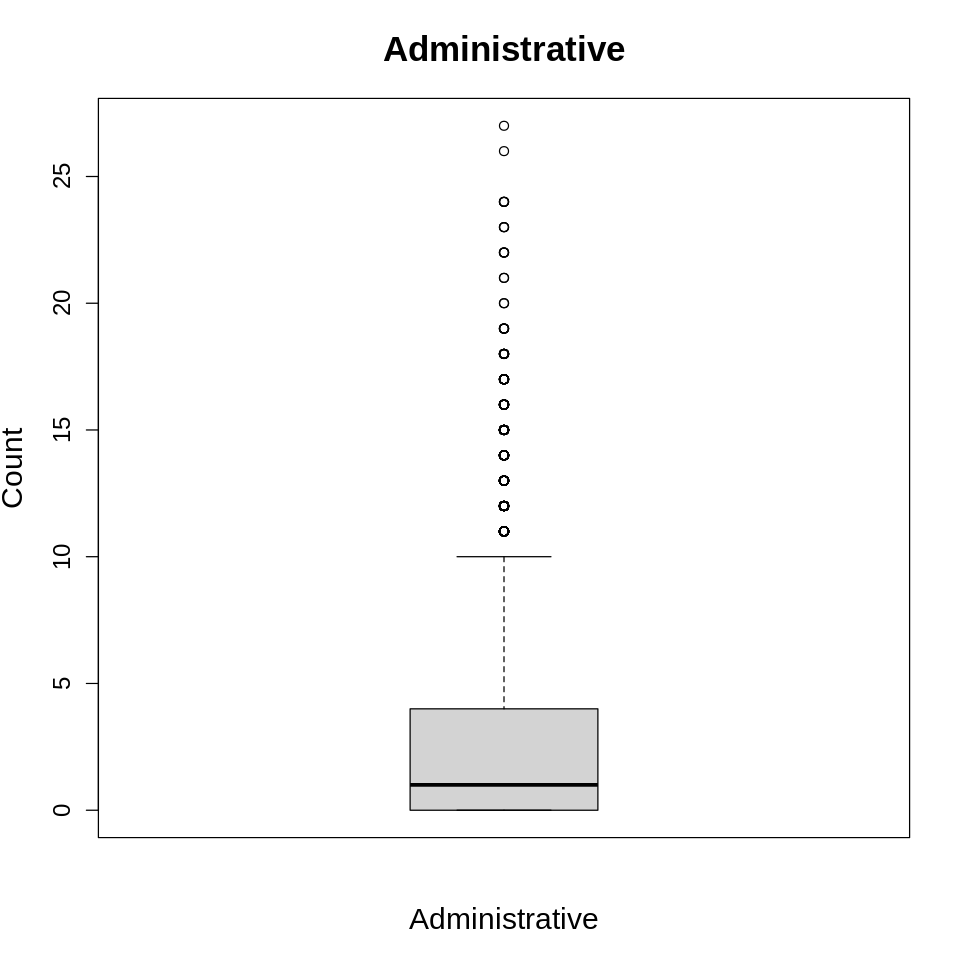

[1] 2


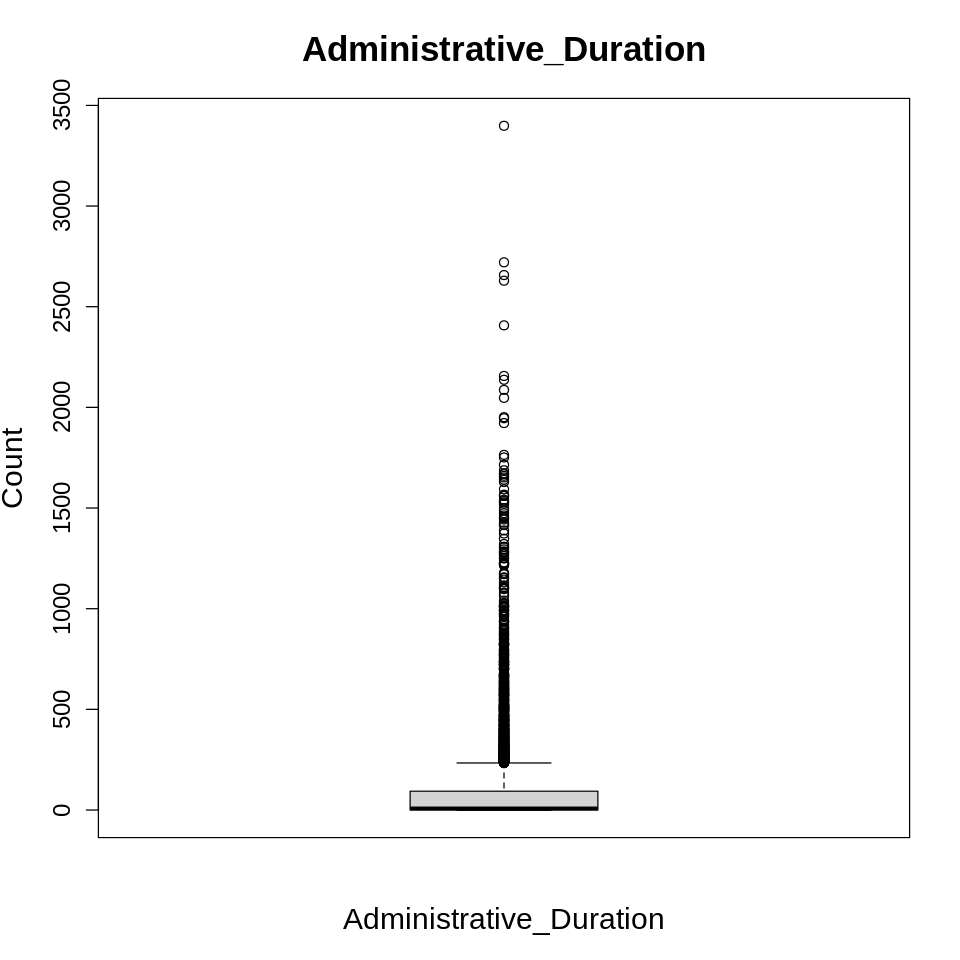

[1] 3


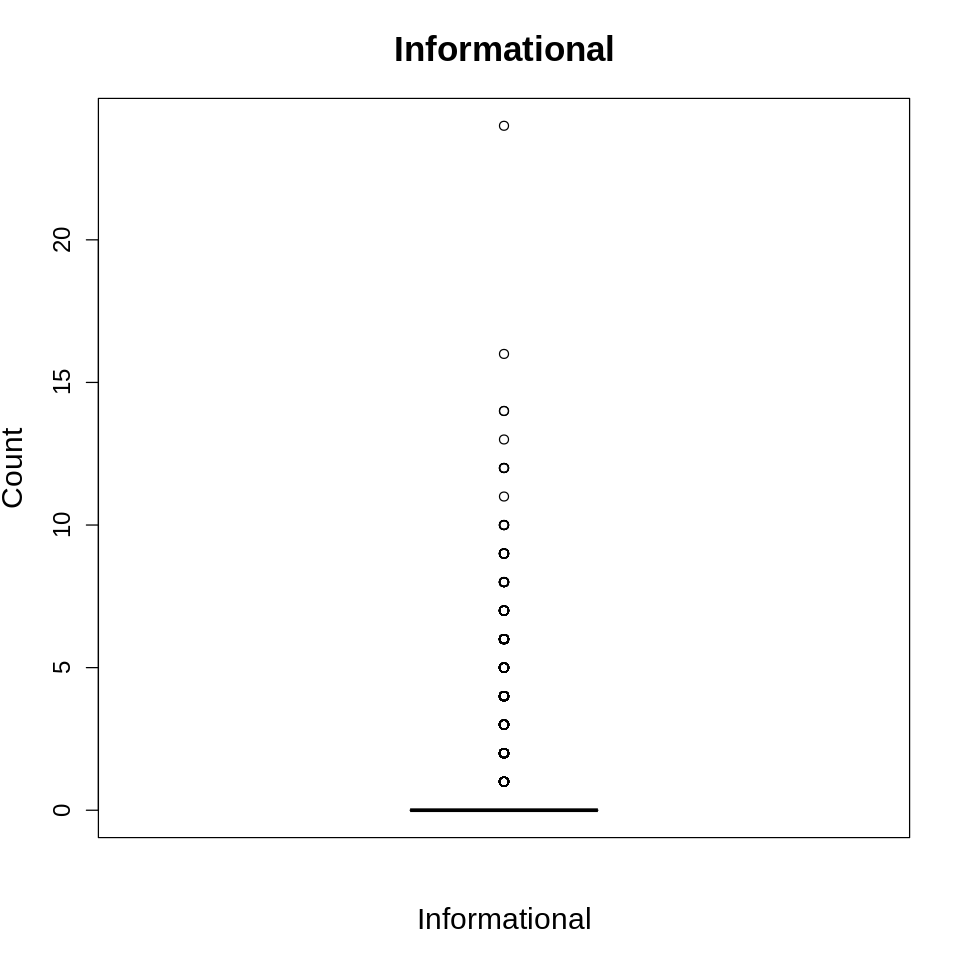

[1] 4


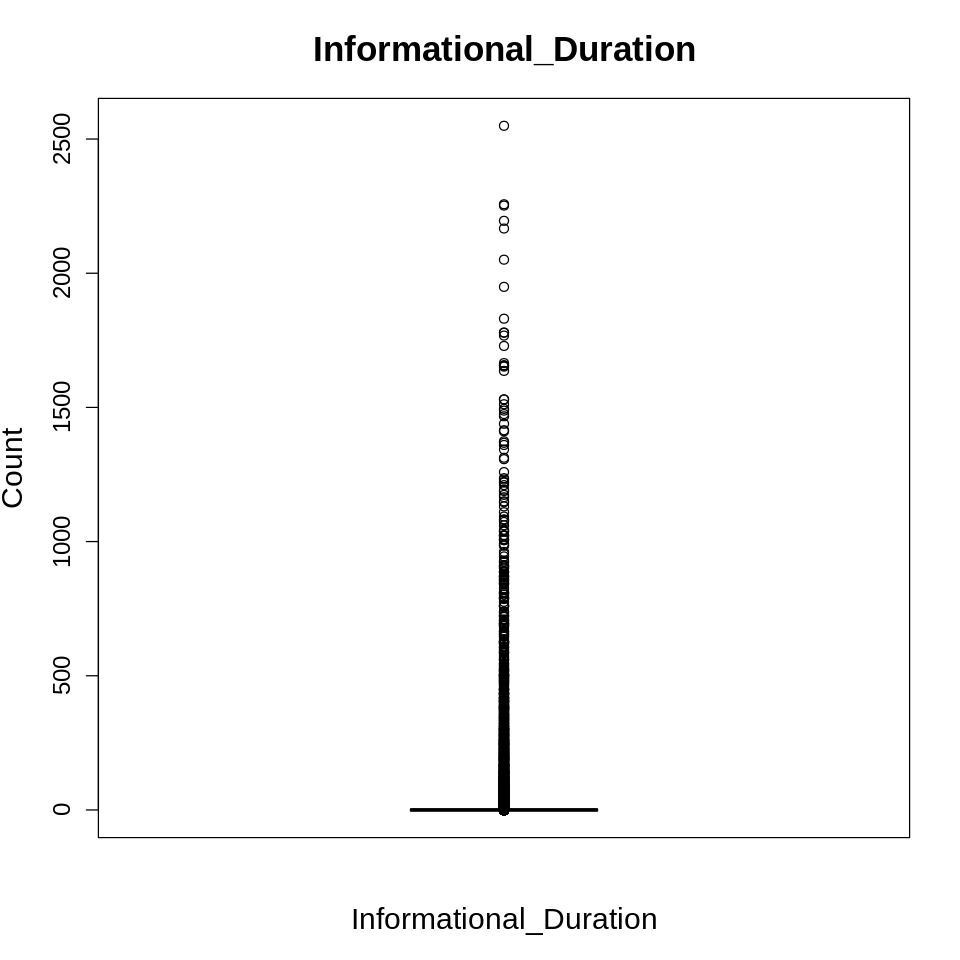

[1] 5


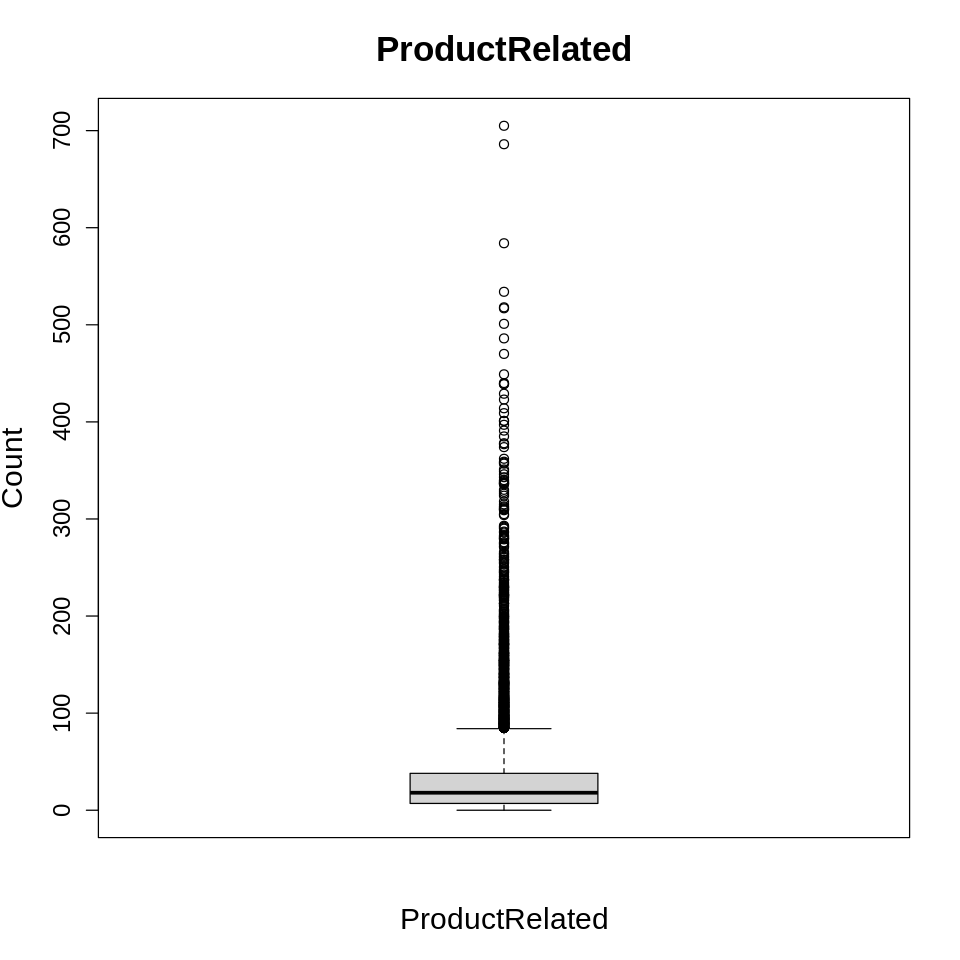

[1] 6


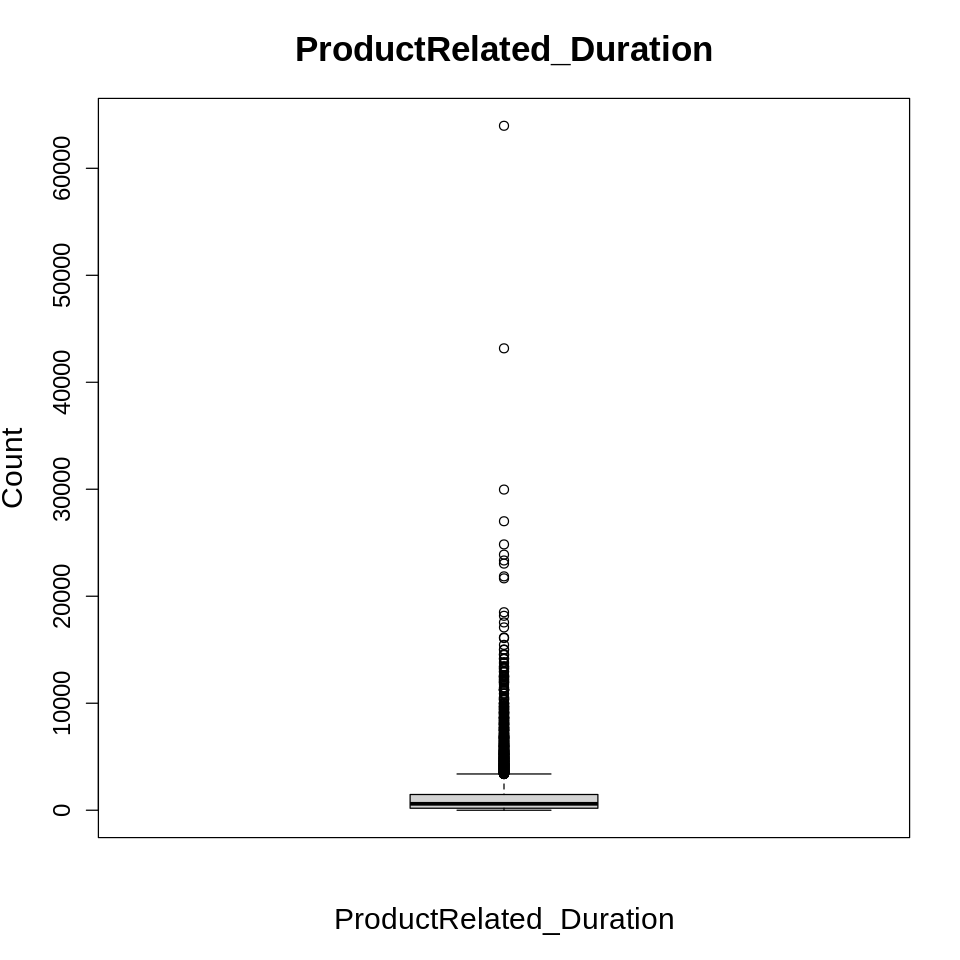

[1] 7


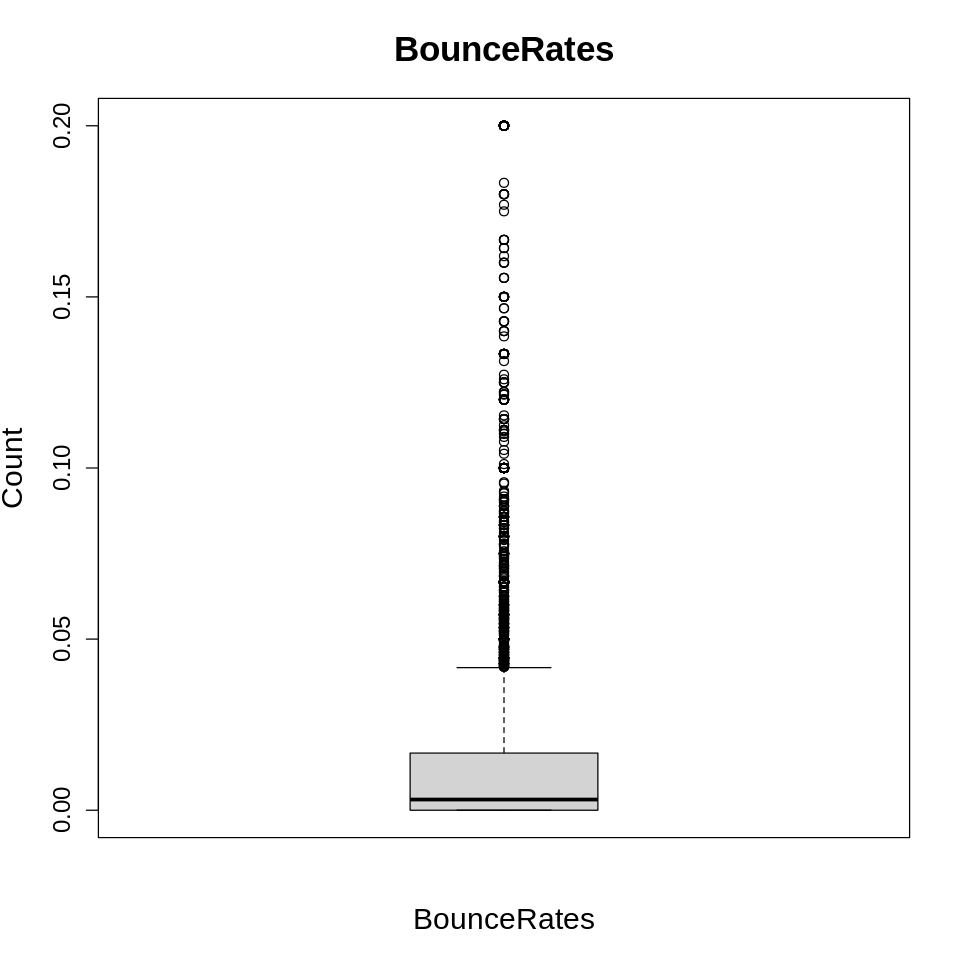

[1] 8


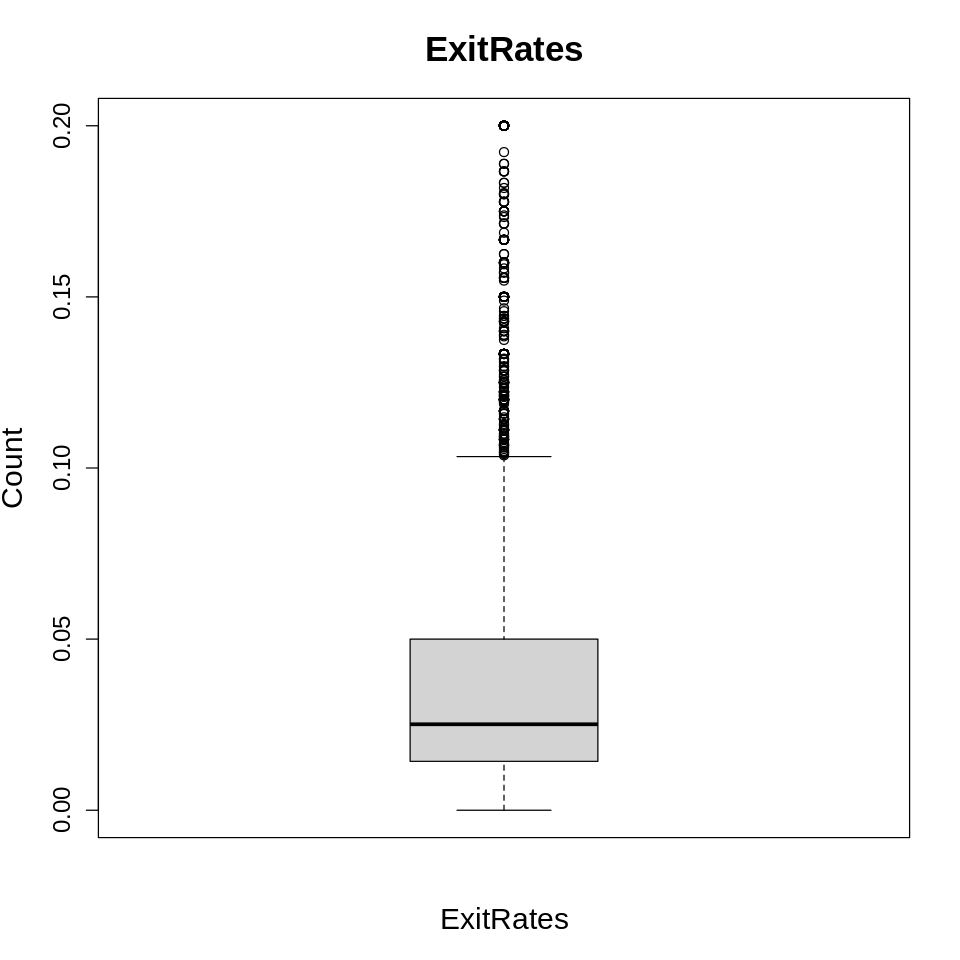

[1] 9


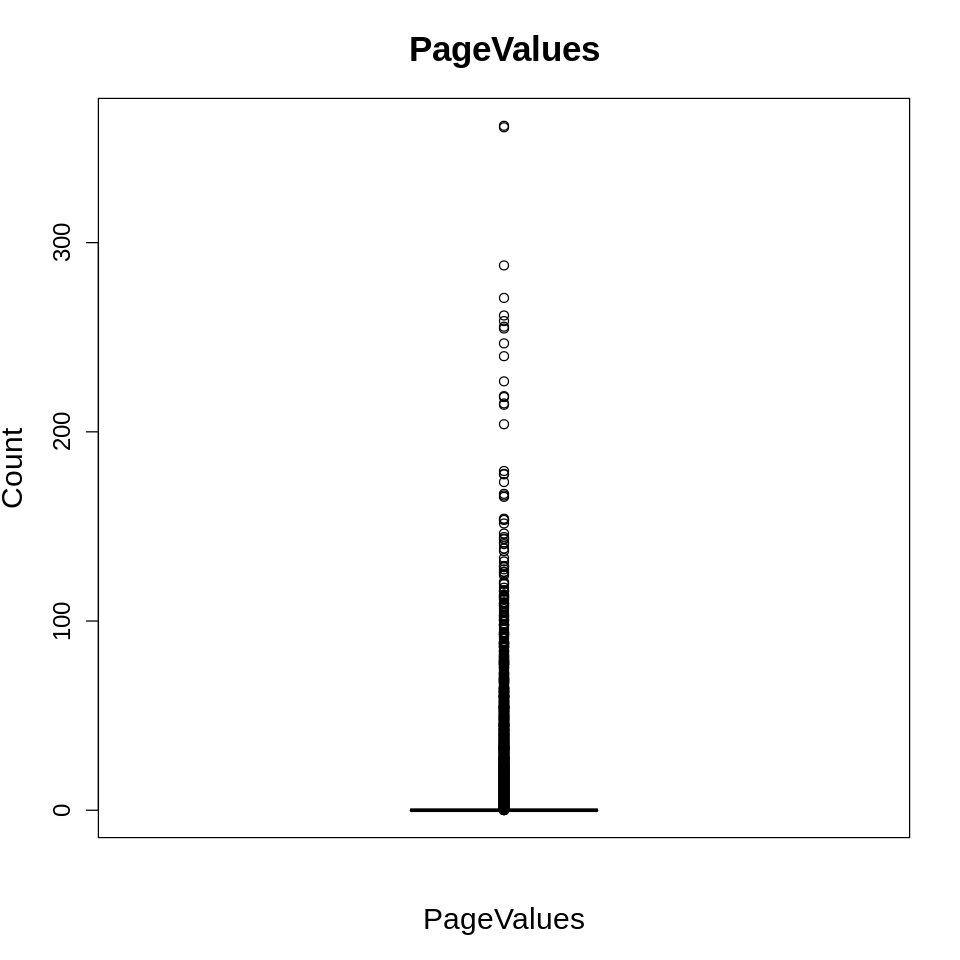

[1] 10


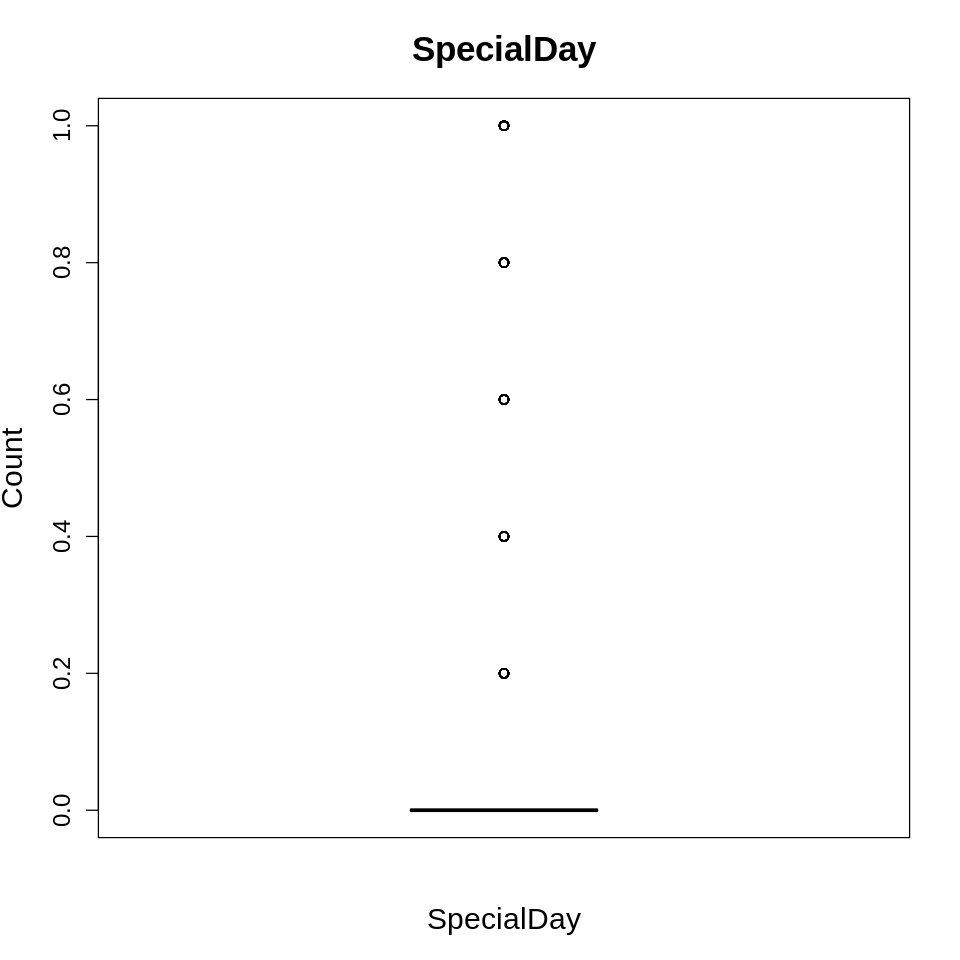

In [ ]:
# Checking for outliers in the numerical columns using boxplots

for (i in 1:length(num)) {
  options(repr.plot.width = 8, repr.plot.height = 8)
  boxplot(num[,i], main= names(num[i]), xlab = names(num[i]), ylab = "Count",
  boxwex=0.5, cex.main= 1.75, cex.lab=1.5, cex.axis=1.2)
  print(i)
}

# There were outliers in all the numerical columns but I will not remove them 
# because there is no reason to do so at the moment

In [ ]:
# Checking for null values

colSums(is.na(kira))

# The first 8 columns have 12 null values each

Administrative Administrative_Duration           Informational 
                     12                      12                      12 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     12                      12                      12 
            BounceRates               ExitRates              PageValues 
                     12                      12                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

In [ ]:
# Filling null values using the mice function

mod = mice(kira,meth='pmm',seed=500)

# Now we can get back the completed dataset using the complete() function.

df <- complete(mod,1)

# Checking if there are any null values anymore

colSums(is.na(df))

# Getting a preview of the cleaned dataset

head(df)

# There are no null values


 iter imp variable
  1   1  Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates
  1   2  Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates
  1   3  Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates
  1   4  Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates
  1   5  Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates
  2   1  Administrative  Administrative_Duration  Informational  Informational_Duration  ProductRelated  ProductRelated_Duration  BounceRates  ExitRates
  2   2  Administrative  Administrative_Duration  Informationa

Warning message:
“Number of logged events: 2”


Administrative Administrative_Duration           Informational 
                      0                       0                       0 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                      0                       0                       0 
            BounceRates               ExitRates              PageValues 
                      0                       0                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

Administrative Administrative_Duration Informational Informational_Duration
1 0               0                      0              0                    
2 0               0                      0              0                    
3 0              -1                      0             -1                    
4 0               0                      0              0                    
5 0               0                      0              0                    
6 0               0                      0              0                    
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1  1               0.000000              0.20000000  0.2000000 0         
2  2              64.000000              0.00000000  0.1000000 0         
3  1              -1.000000              0.20000000  0.2000000 0         
4  2               2.666667              0.05000000  0.1400000 0         
5 10             627.500000              0.02000000  0.0500000 0         
6 19             154.216667              0.01578947  0.0245614 0         
  SpecialDay Month OperatingSystems Browser Region TrafficType
1 0          Feb   1                1       1      1          
2 0          Feb   2                2       1      2          
3 0          Feb   4                1       9      3          
4 0          Feb   3                2       2      4          
5 0          Feb   3                3       1      4          
6 0          Feb   2                2       1      3          
  VisitorType       Weekend Revenue
1 Returning_Visitor FALSE   FALSE  
2 Returning_Visitor FALSE   FALSE  
3 Returning_Visitor FALSE   FALSE  
4 Returning_Visitor FALSE   FALSE  
5 Returning_Visitor  TRUE   FALSE  
6 Returning_Visitor FALSE   FALSE

# 6. Exploratory Data Analysis

## Univariate Analysis

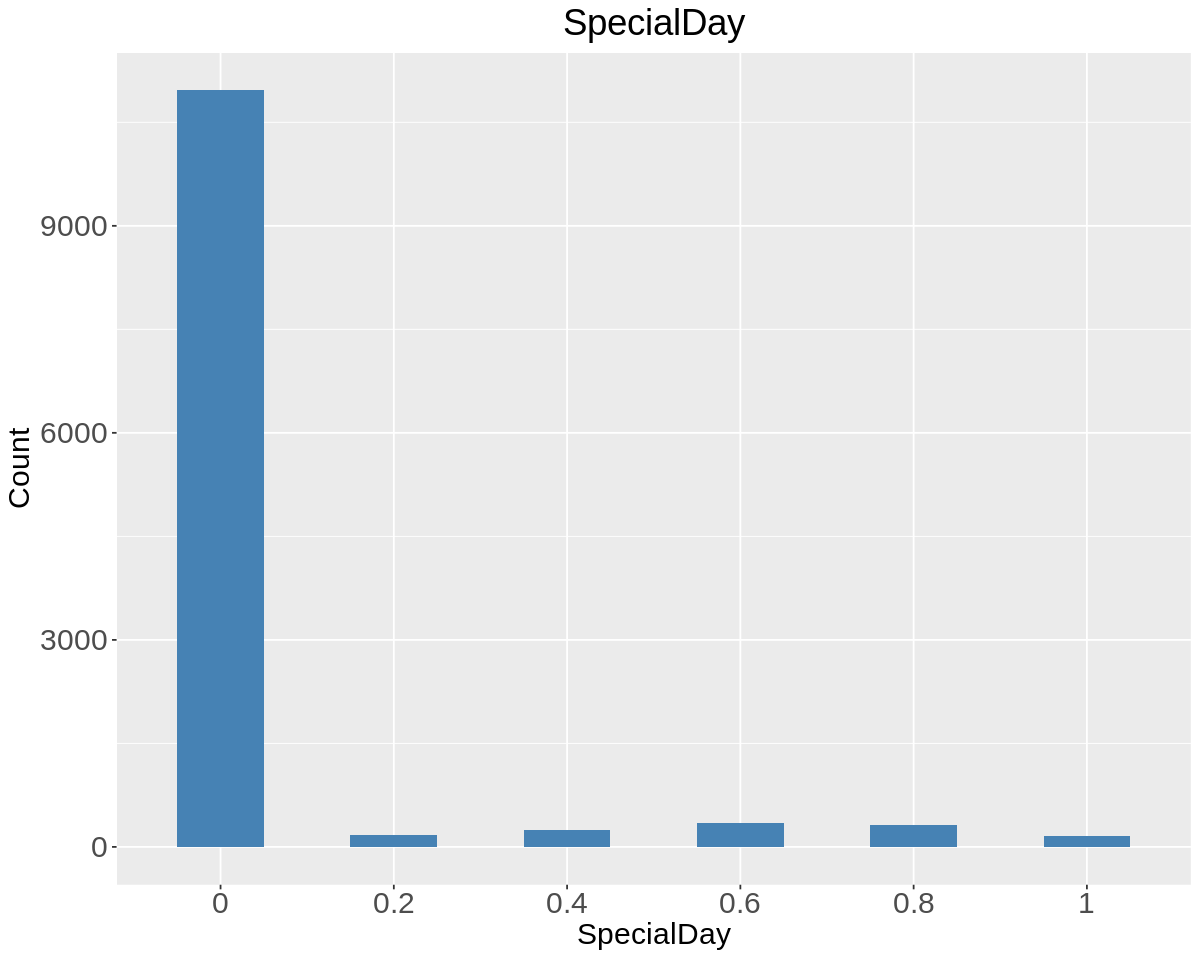

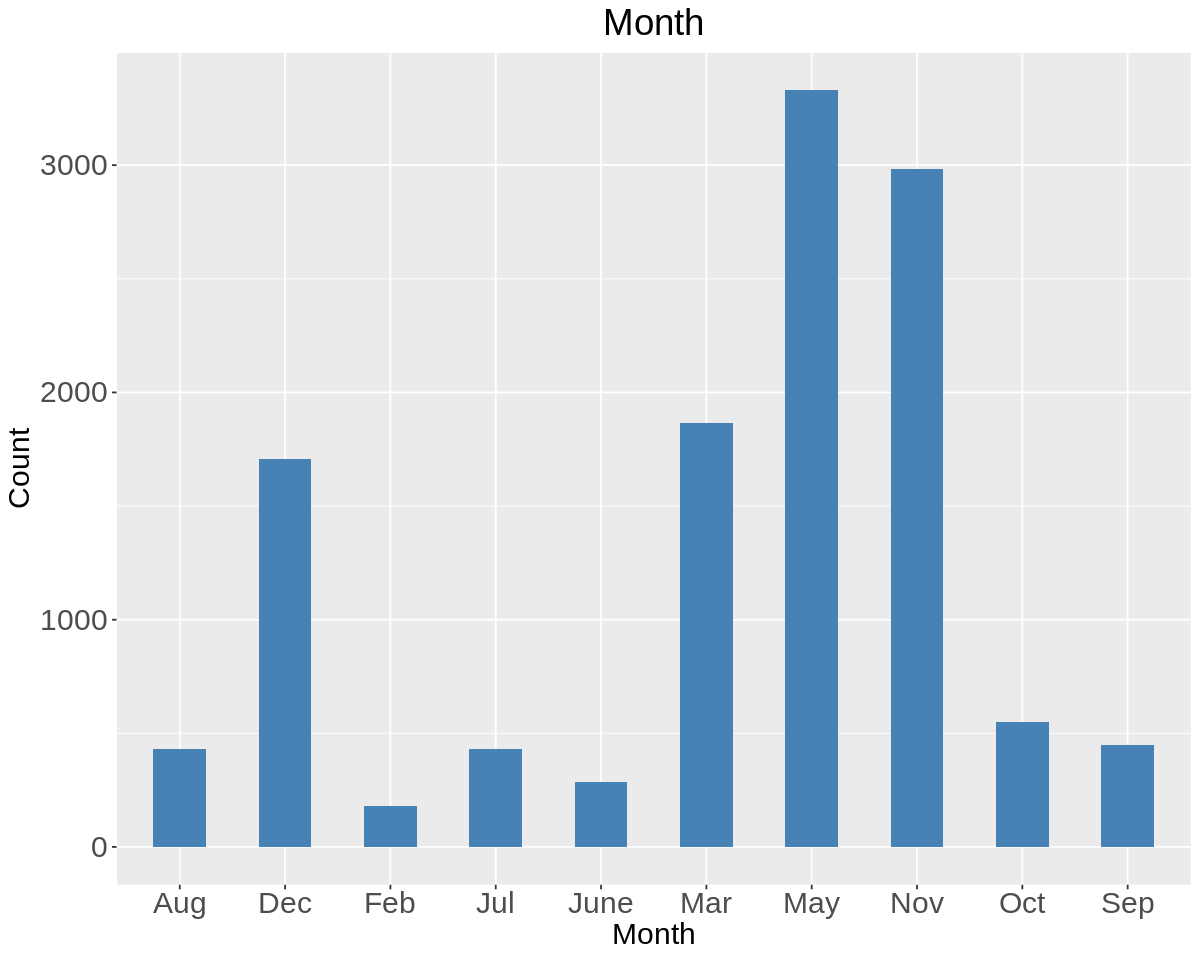

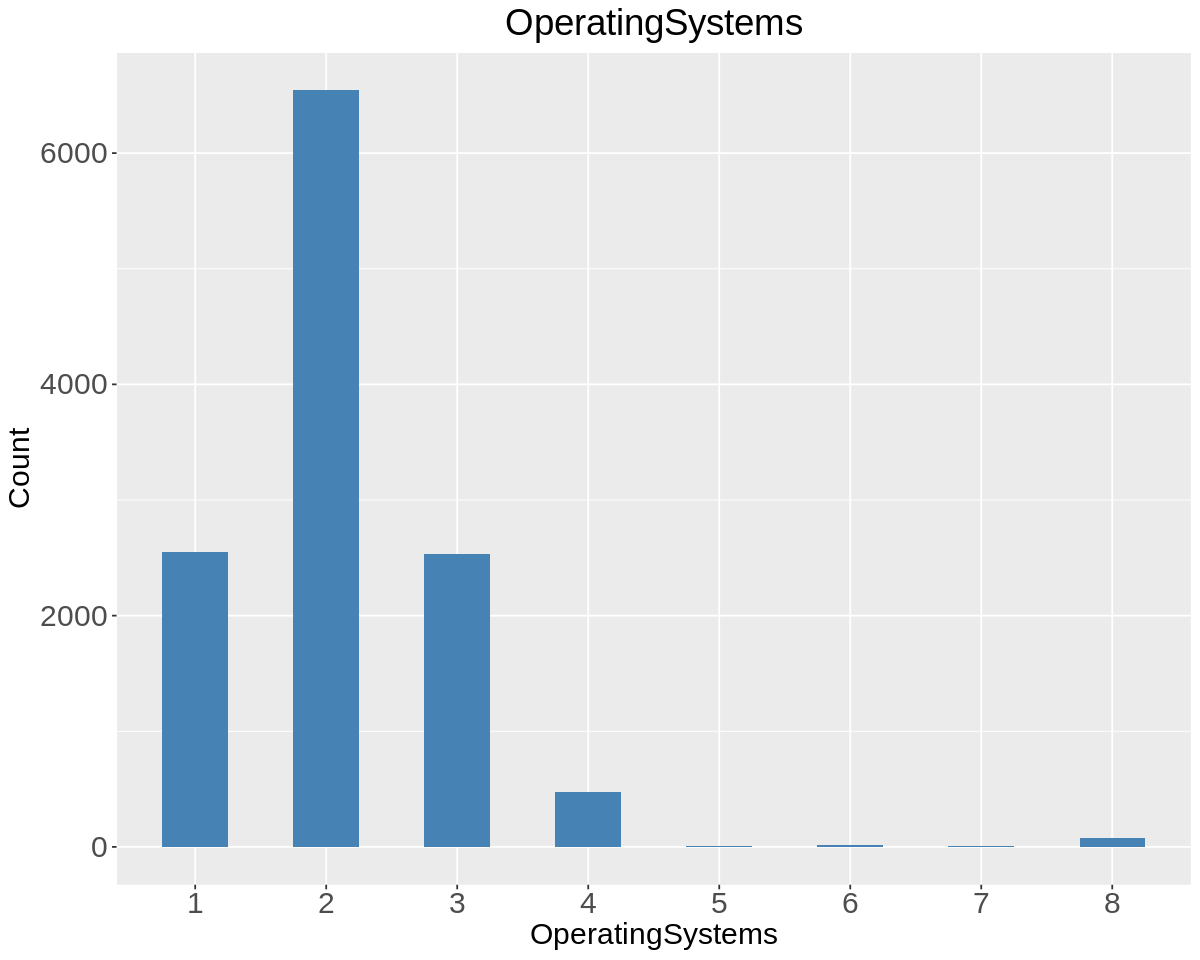

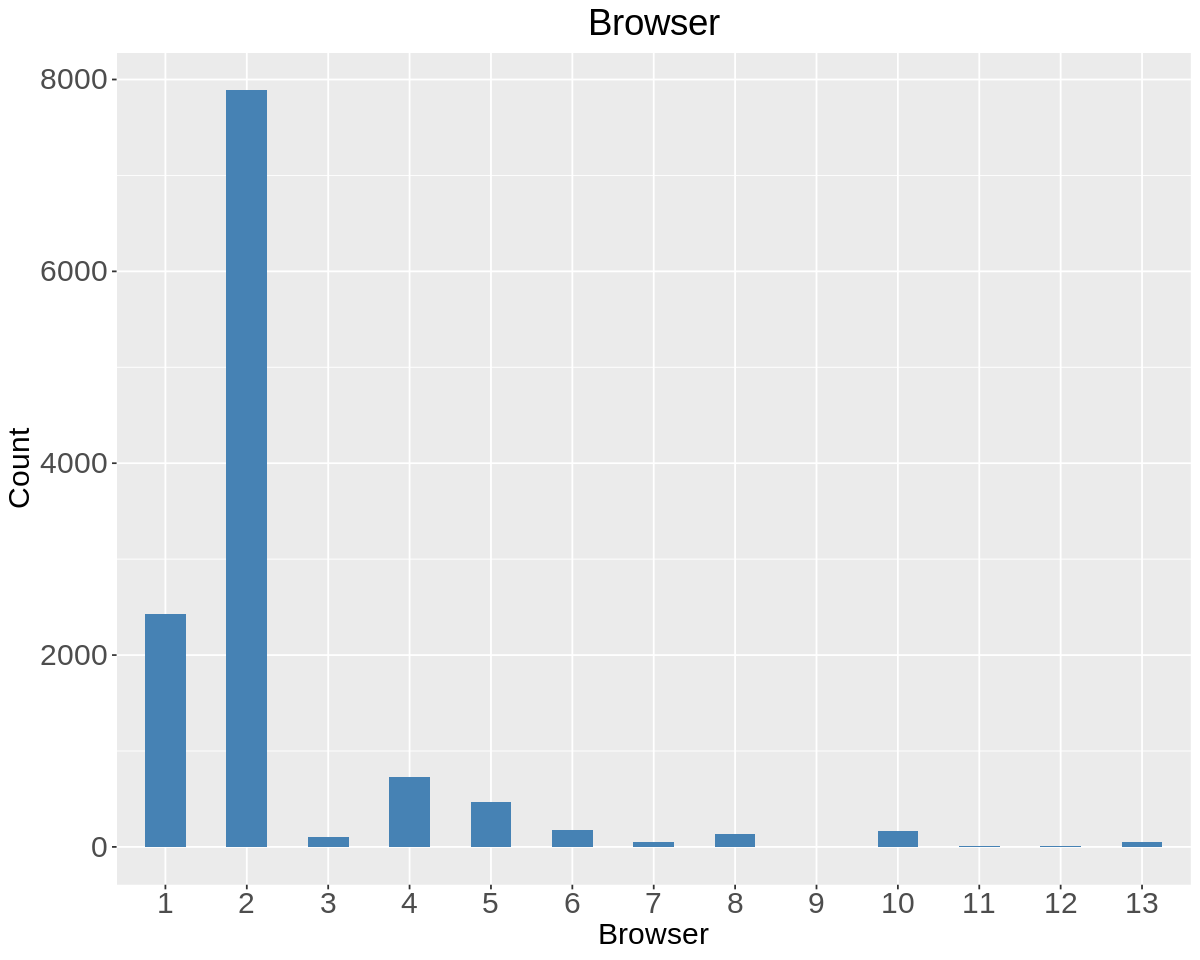

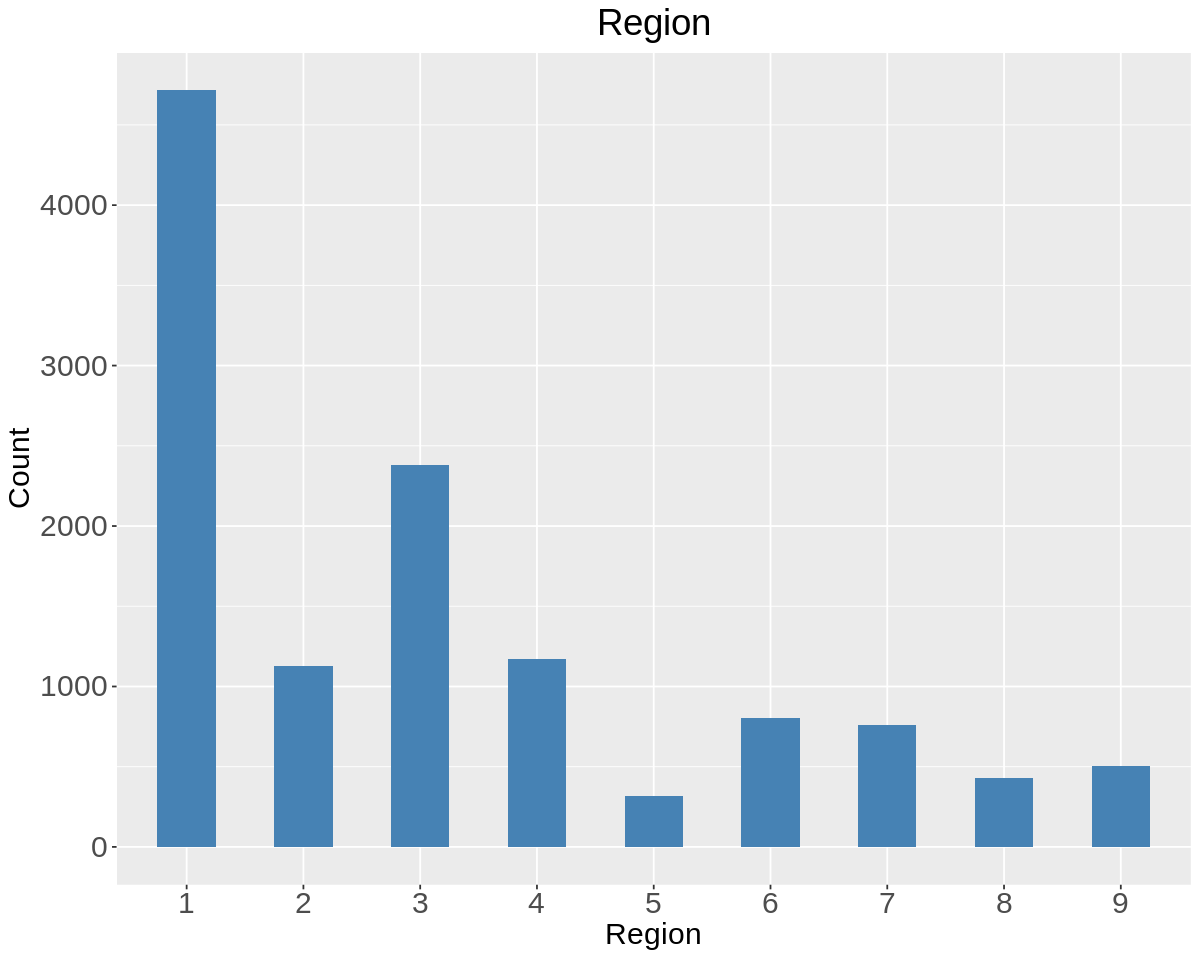

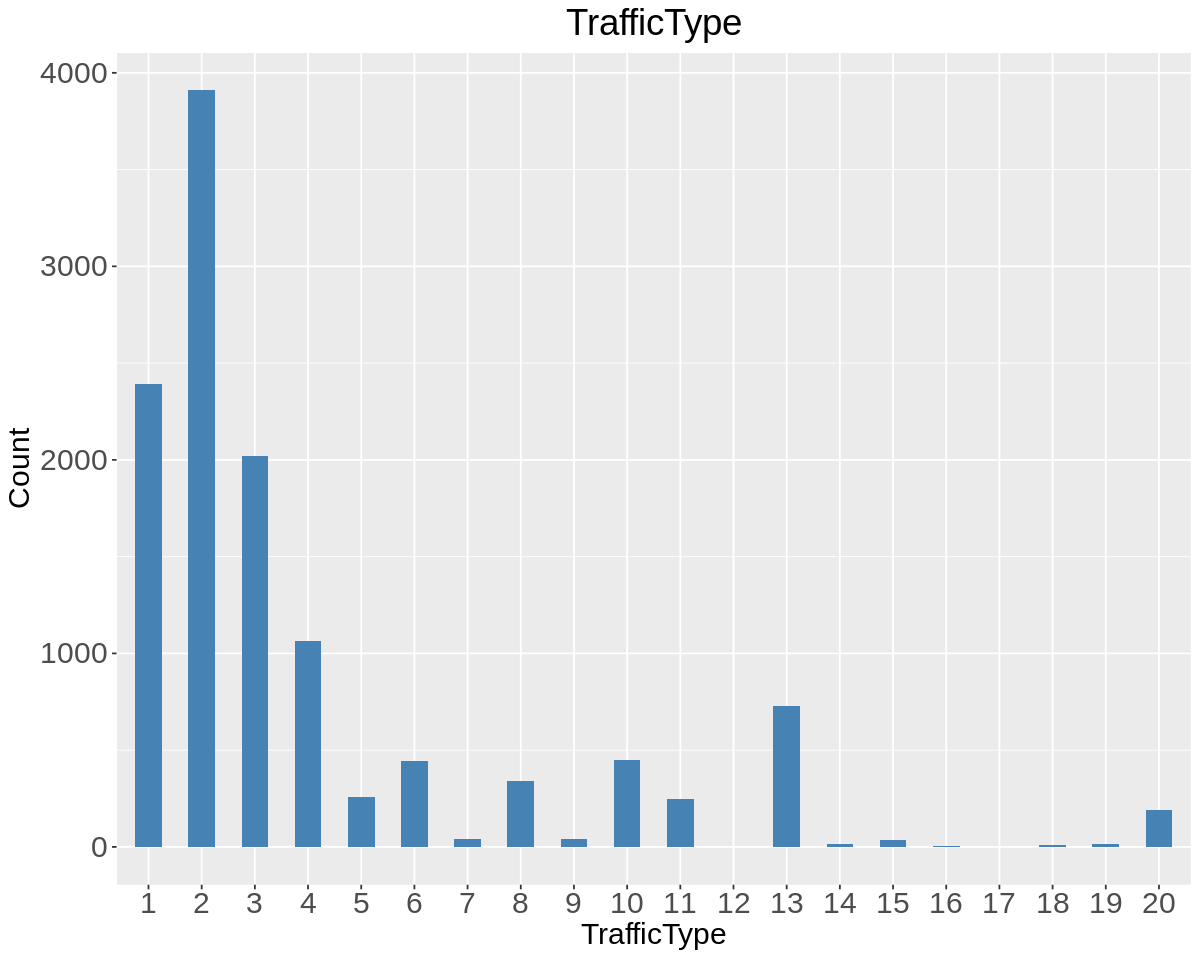

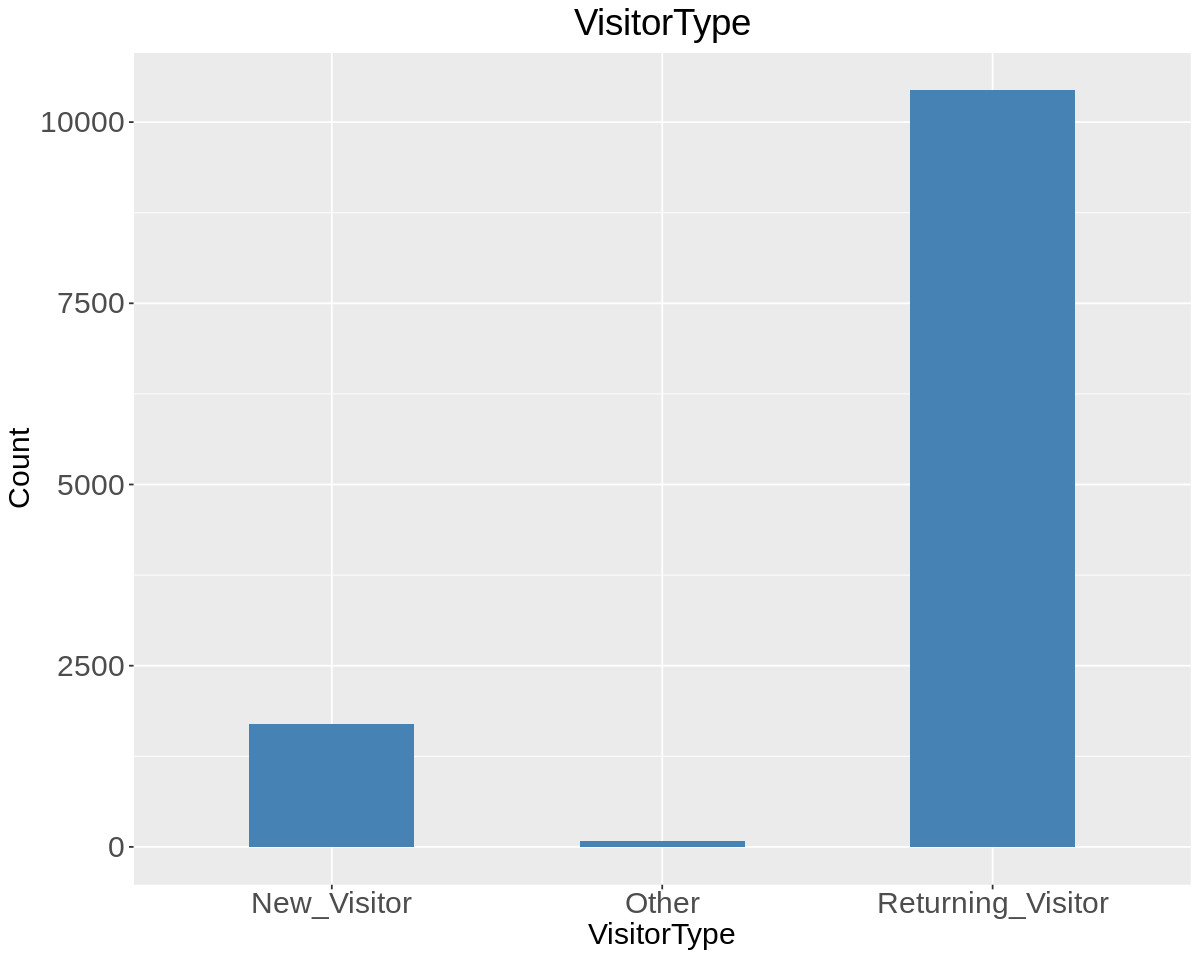

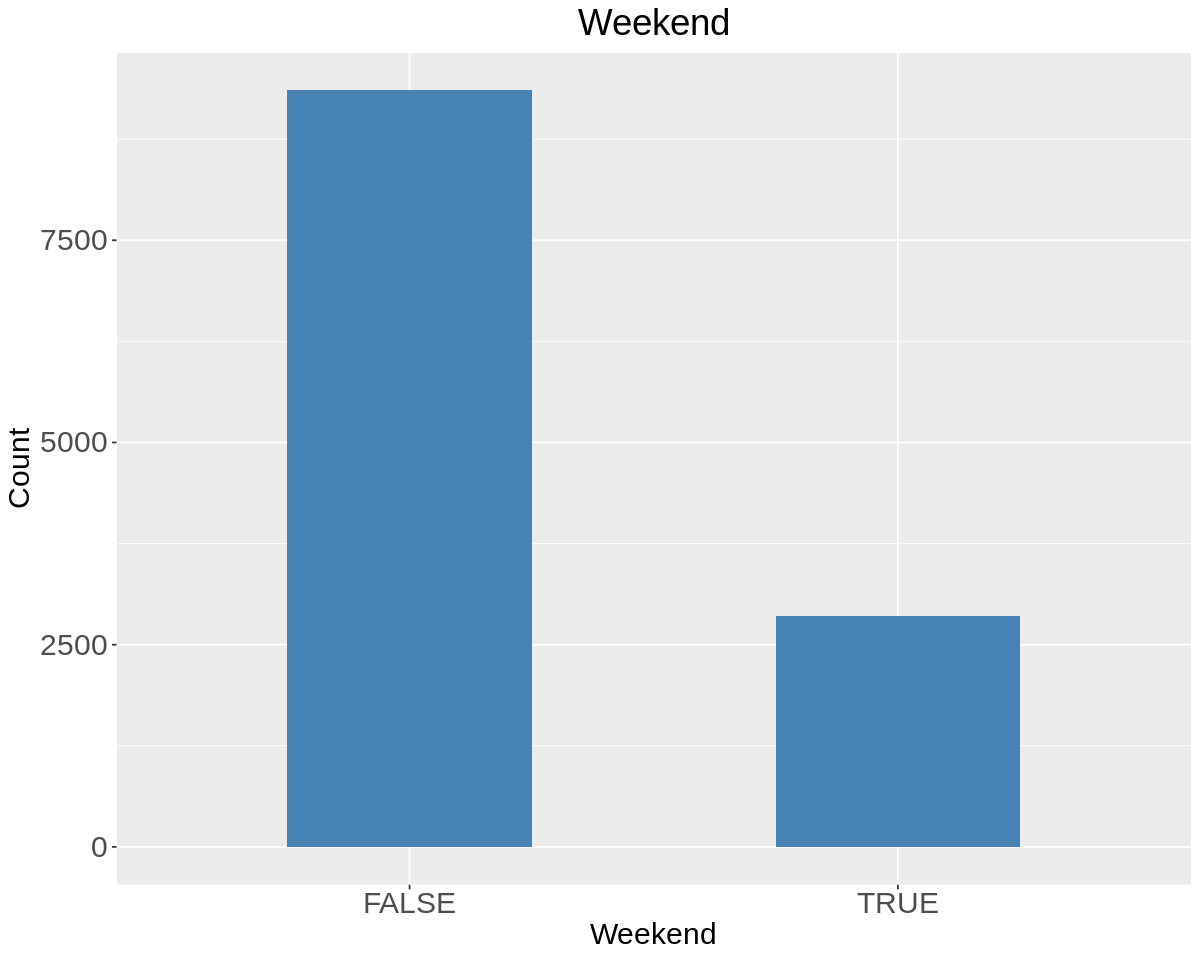

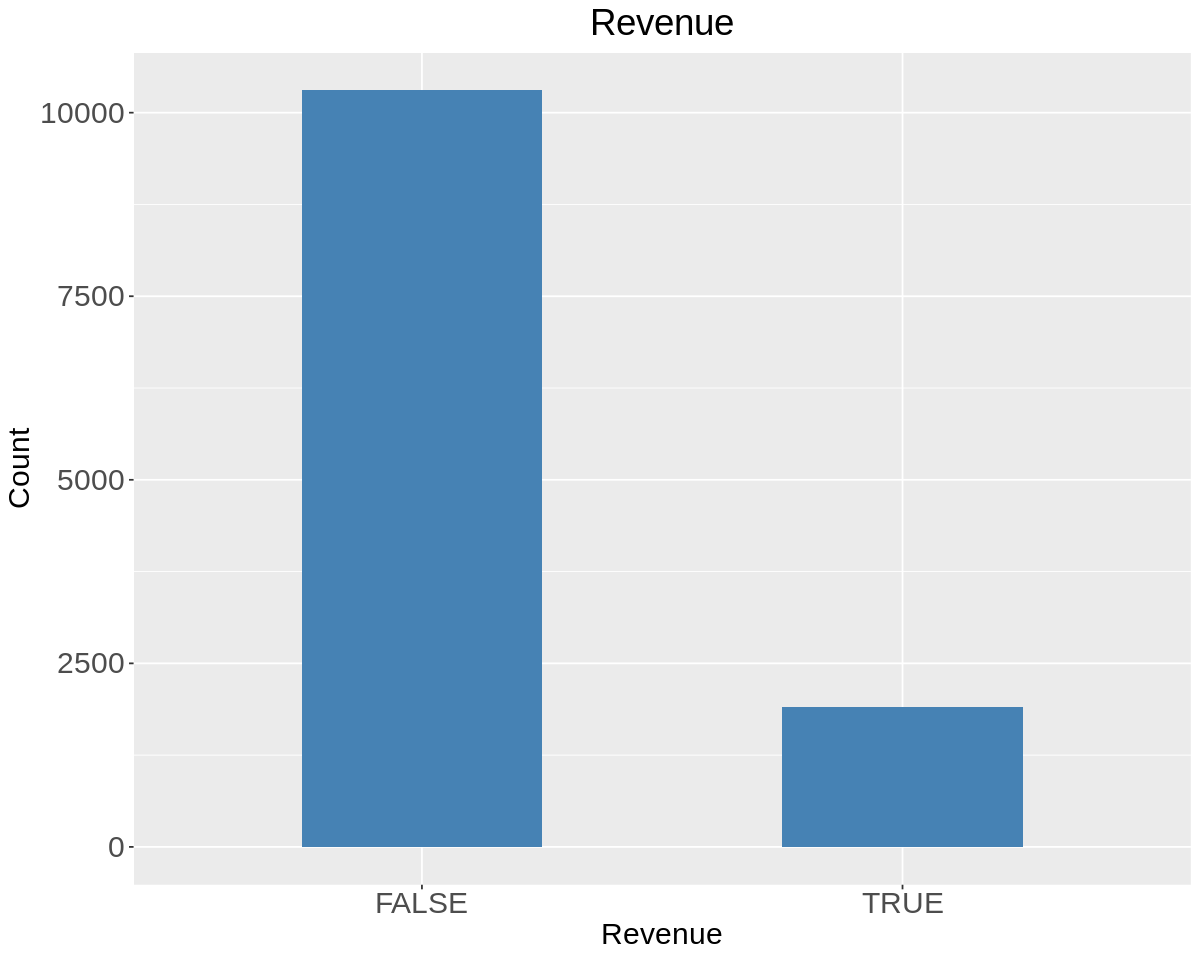

In [ ]:
# Univariate analysis for the categorical variables using countplots

cat = df[,10:18]

for (i in 1:length(cat)) {
  options(repr.plot.width = 10, repr.plot.height = 8)
  print(ggplot(cat, aes(x = factor(cat[,i]))) +
  geom_bar(fill = "steelblue", width = 0.5) +
  labs(title = names(cat[i]), x = names(cat[i]), y = "Count") +
  theme(axis.text = element_text(size=18),
        axis.title = element_text(size = 18),
        plot.title = element_text(hjust = 0.5, size = 22)))
  cat("\n", "\n")
}

- The site was visited most on weekdays.
- The site was visited most when there was no special day nearing.
- Most site visits were made in the month of May.
- Most site visits were made by customers in region 1.
- The highest traffic type was type 2.
- More than 10000 of the visitors to the site were returning visitors. There were less than 2000 new visitors.
- More than 10000 site visits did not reflect an increase in revenue.

In [ ]:
colnames(num)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"

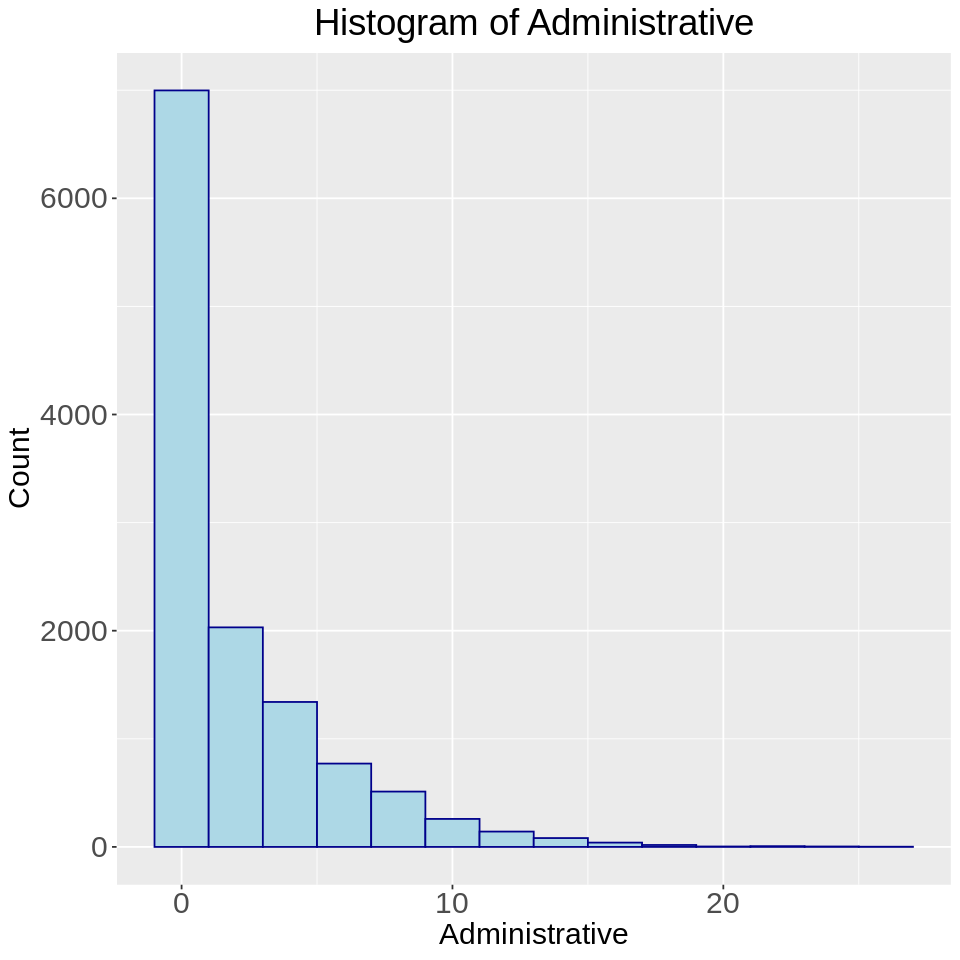

In [ ]:
# Univariate analysis for the numeric columns
# Analysis for the administrative column

options(repr.plot.width = 8, repr.plot.height = 8)
p = df %>% ggplot(aes(x = Administrative))

p + geom_histogram(color="darkblue", fill="lightblue", binwidth = 2 ) +
    labs(title = "Histogram of Administrative", x = "Administrative", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

In [ ]:
# Measures of dispersion

cat("Skewness:", skewness(df$Administrative), "\n")
cat("Kurtosis", kurtosis(df$Administrative), "\n")
cat("Standard Deviation:", sd(df$Administrative), "\n")
cat("Coefficient of variation:", sd(df$Administrative)/ mean(df$Administrative))
cat("\n", "\n")

# Measures of central tendancy

summary(df$Administrative)

# The data is skewed to the right and is leptokurtic. There is also high variance between values
# Minimum value is 0 and maximum value is 27
# The mean is 2.34

Skewness: 1.945791 
Kurtosis 7.63349 
Standard Deviation: 3.33062 
Coefficient of variation: 1.423379
 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    0.00    1.00    2.34    4.00   27.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



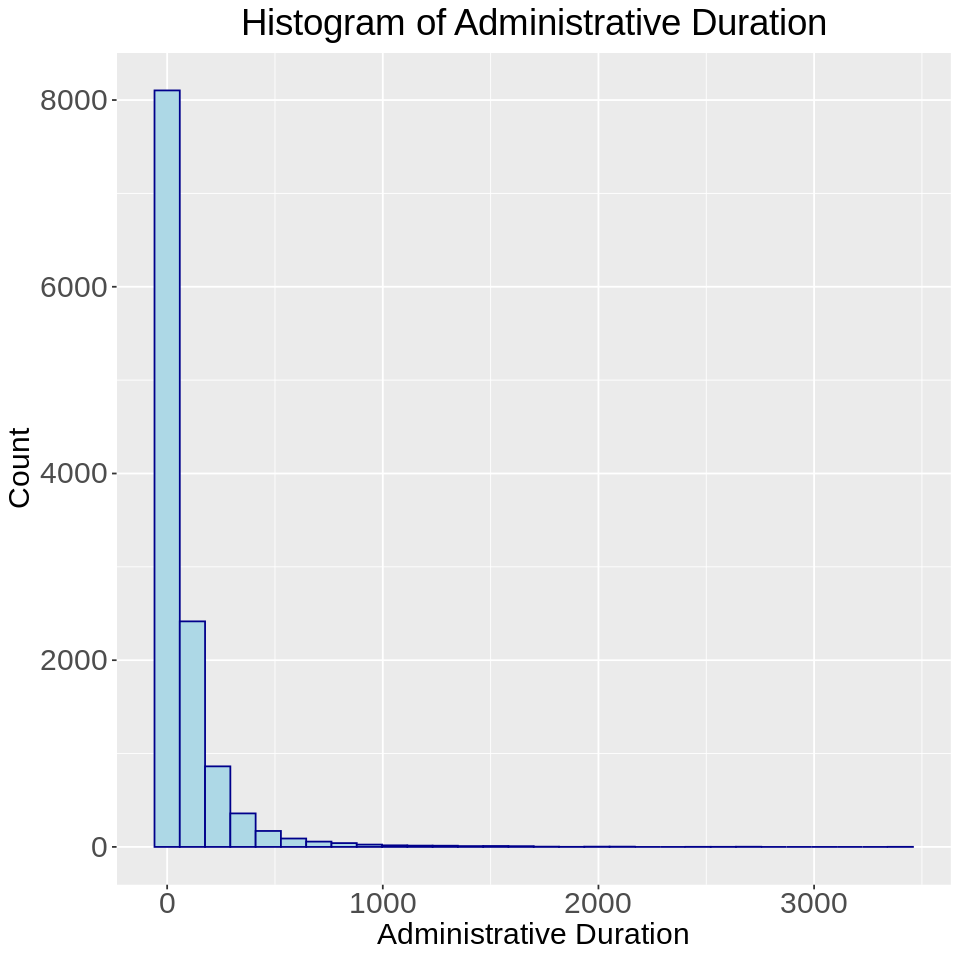

In [ ]:
# Analysis for the administrative duration column

options(repr.plot.width = 8, repr.plot.height = 8)
p = df %>% ggplot(aes(x = Administrative_Duration))

p + geom_histogram(color="darkblue", fill="lightblue" ) +
    labs(title = "Histogram of Administrative Duration", x = "Administrative Duration", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

In [ ]:
# Measures of dispersion

cat("Skewness:", skewness(df$Administrative_Duration), "\n")
cat("Kurtosis", kurtosis(df$Administrative_Duration), "\n")
cat("Standard Deviation:", sd(df$Administrative_Duration), "\n")
cat("Coefficient of variation:", sd(df$Administrative_Duration)/ mean(df$Administrative_Duration))
cat("\n", "\n")

# Measures of central tendancy

summary(df$Administrative_Duration)

# The data is skewed to the right and is leptokurtic. There is also high variance between values
# Minimum value is -1 and maximum value is 3398.75
# The mean is 81.66

Skewness: 5.591655 
Kurtosis 53.12707 
Standard Deviation: 177.4595 
Coefficient of variation: 2.173211
 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -1.00    0.00    9.00   81.66   94.75 3398.75 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



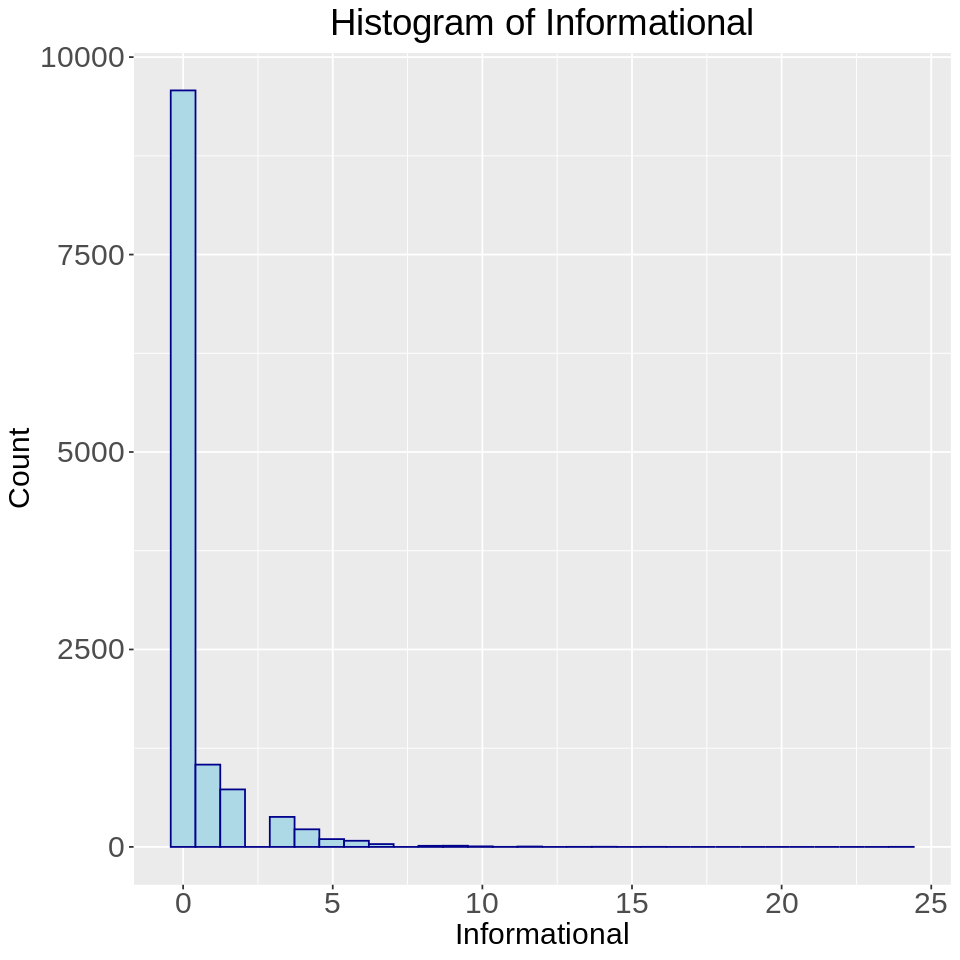

In [ ]:
# Analysis for the Informational column

options(repr.plot.width = 8, repr.plot.height = 8)
p = df %>% ggplot(aes(x = Informational))

p + geom_histogram(color="darkblue", fill="lightblue" ) +
    labs(title = "Histogram of Informational", x = "Informational", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

In [ ]:
# Measures of dispersion

cat("Skewness:", skewness(df$Informational), "\n")
cat("Kurtosis", kurtosis(df$Informational), "\n")
cat("Standard Deviation:", sd(df$Informational), "\n")
cat("Coefficient of variation:", sd(df$Informational)/ mean(df$Informational))
cat("\n", "\n")

# Measures of central tendancy

summary(df$Informational)

# The data is skewed to the right and is leptokurtic. There is also high variance between values
# Minimum value is 0 and maximum value is 24
# The mean is 0.5089

Skewness: 4.011874 
Kurtosis 29.62485 
Standard Deviation: 1.275735 
Coefficient of variation: 2.506921
 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  0.0000  0.5089  0.0000 24.0000 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



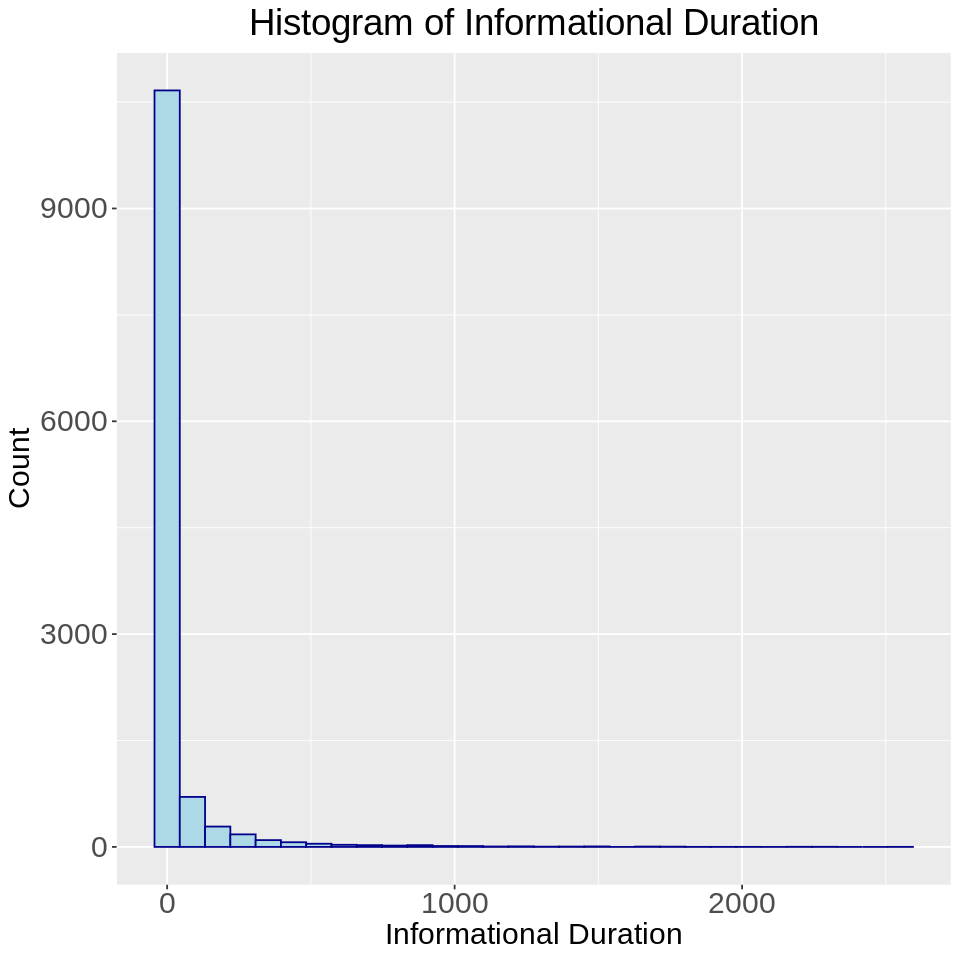

In [ ]:
# Analysis for the Informational duration column

options(repr.plot.width = 8, repr.plot.height = 8)
p = df %>% ggplot(aes(x = Informational_Duration))

p + geom_histogram(color="darkblue", fill="lightblue" ) +
    labs(title = "Histogram of Informational Duration", x = "Informational Duration", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

In [ ]:
# Measures of dispersion

cat("Skewness:", skewness(df$Informational_Duration), "\n")
cat("Kurtosis", kurtosis(df$Informational_Duration), "\n")
cat("Standard Deviation:", sd(df$Informational_Duration), "\n")
cat("Coefficient of variation:", sd(df$Informational_Duration)/ mean(df$Informational_Duration))
cat("\n", "\n")

# Measures of central tendancy

summary(df$Informational_Duration)

# The data is skewed to the right and is extremely leptokurtic. There is also very high variance between values
# Minimum value is -1 and maximum value is 2549.38
# The mean is 34.84

Skewness: 7.538452 
Kurtosis 78.4996 
Standard Deviation: 141.4082 
Coefficient of variation: 4.059341
 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  -1.00    0.00    0.00   34.84    0.00 2549.38 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



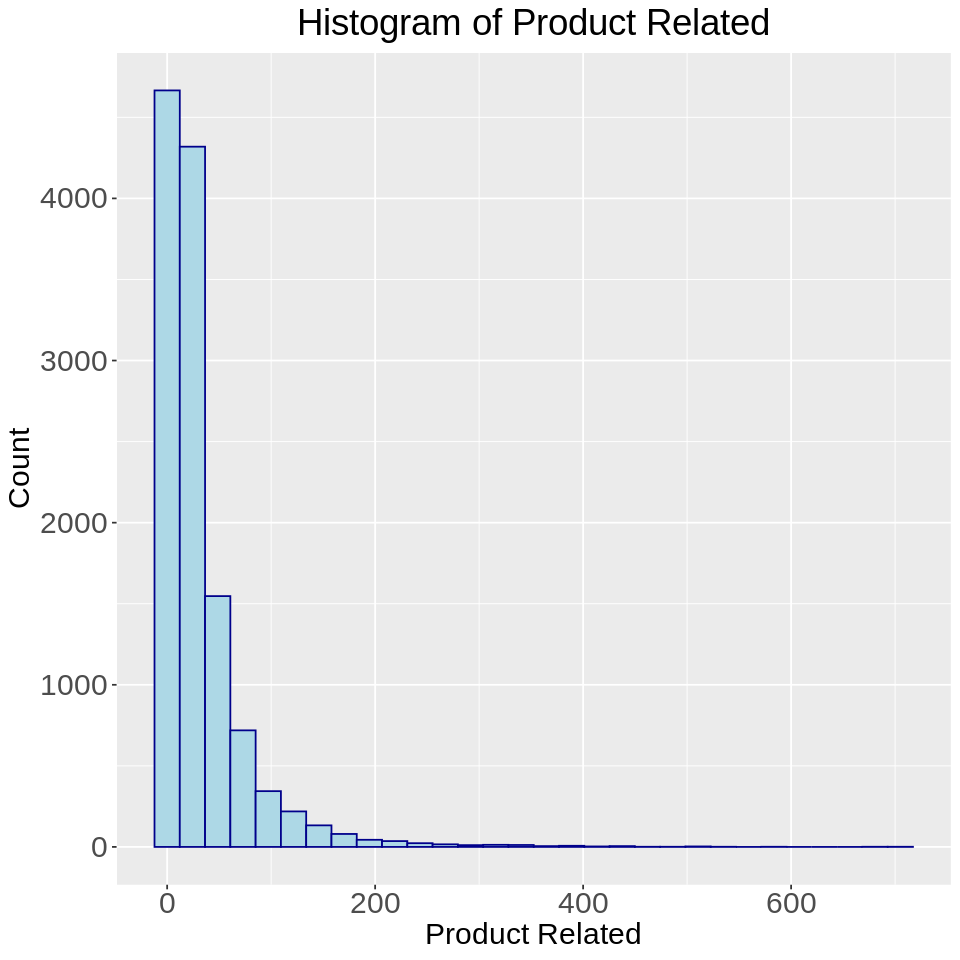

In [ ]:
# Analysis for the Product Related column

options(repr.plot.width = 8, repr.plot.height = 8)
p = df %>% ggplot(aes(x = ProductRelated))

p + geom_histogram(color="darkblue", fill="lightblue" ) +
    labs(title = "Histogram of Product Related", x = "Product Related", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

In [ ]:
# Measures of dispersion

cat("Skewness:", skewness(df$ProductRelated), "\n")
cat("Kurtosis", kurtosis(df$ProductRelated), "\n")
cat("Standard Deviation:", sd(df$ProductRelated), "\n")
cat("Coefficient of variation:", sd(df$ProductRelated)/ mean(df$ProductRelated))
cat("\n", "\n")

# Measures of central tendancy

summary(df$ProductRelated)

# The data is skewed to the right and is extremely leptokurtic. There is also very high variance between values
# Minimum value is 0 and maximum value is 705
# The mean is 32.06

Skewness: 4.330569 
Kurtosis 34.03328 
Standard Deviation: 44.59614 
Coefficient of variation: 1.391034
 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   0.00    8.00   18.00   32.06   38.00  705.00 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



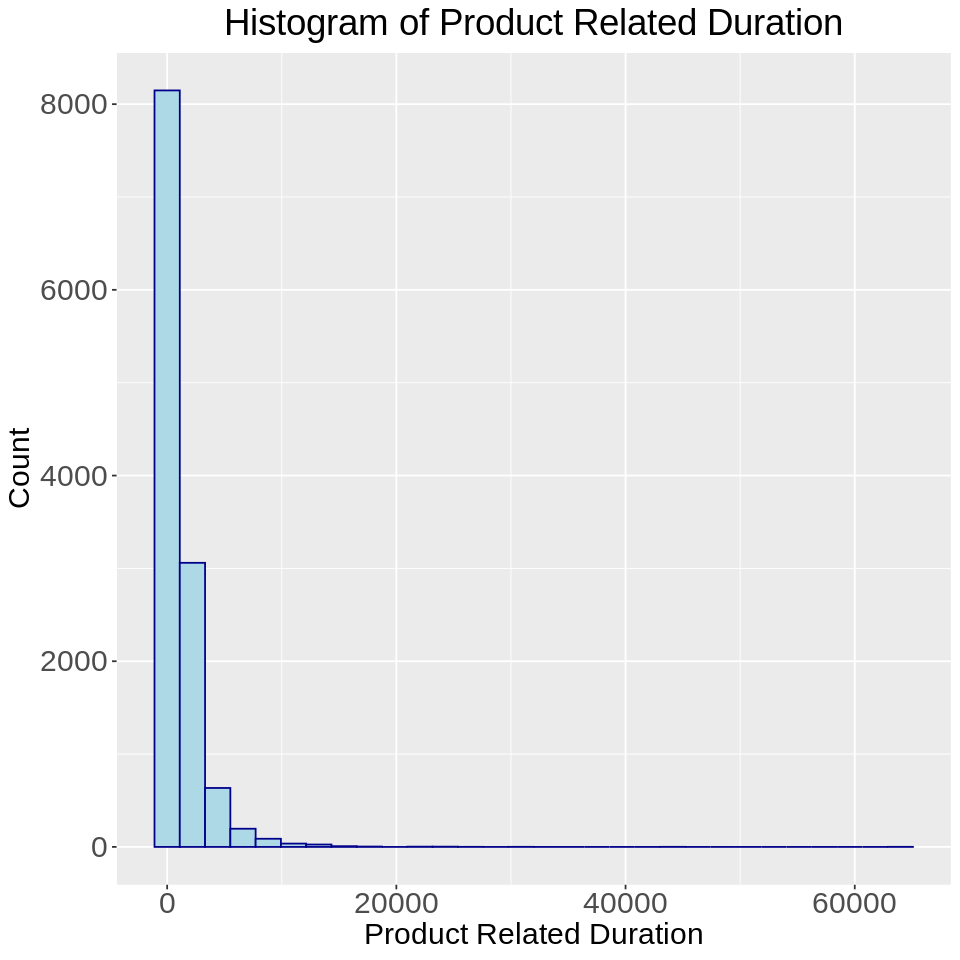

In [ ]:
# Analysis for the Product Related Duration column

options(repr.plot.width = 8, repr.plot.height = 8)
p = df %>% ggplot(aes(x = ProductRelated_Duration))

p + geom_histogram(color="darkblue", fill="lightblue" ) +
    labs(title = "Histogram of Product Related Duration", x = "Product Related Duration", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

In [ ]:
# Measures of dispersion

cat("Skewness:", skewness(df$ProductRelated_Duration), "\n")
cat("Kurtosis", kurtosis(df$ProductRelated_Duration), "\n")
cat("Standard Deviation:", sd(df$ProductRelated_Duration), "\n")
cat("Coefficient of variation:", sd(df$ProductRelated_Duration)/ mean(df$ProductRelated_Duration))
cat("\n", "\n")

# Measures of central tendancy

summary(df$ProductRelated_Duration)

# The data is skewed to the right and is extremely leptokurtic. There is also very high variance between values
# Minimum value is -1 and maximum value is 639373
# The mean is 1207.7

Skewness: 7.246258 
Kurtosis 139.4683 
Standard Deviation: 1919.882 
Coefficient of variation: 1.589708
 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   -1.0   193.7   609.5  1207.7  1477.6 63973.5 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



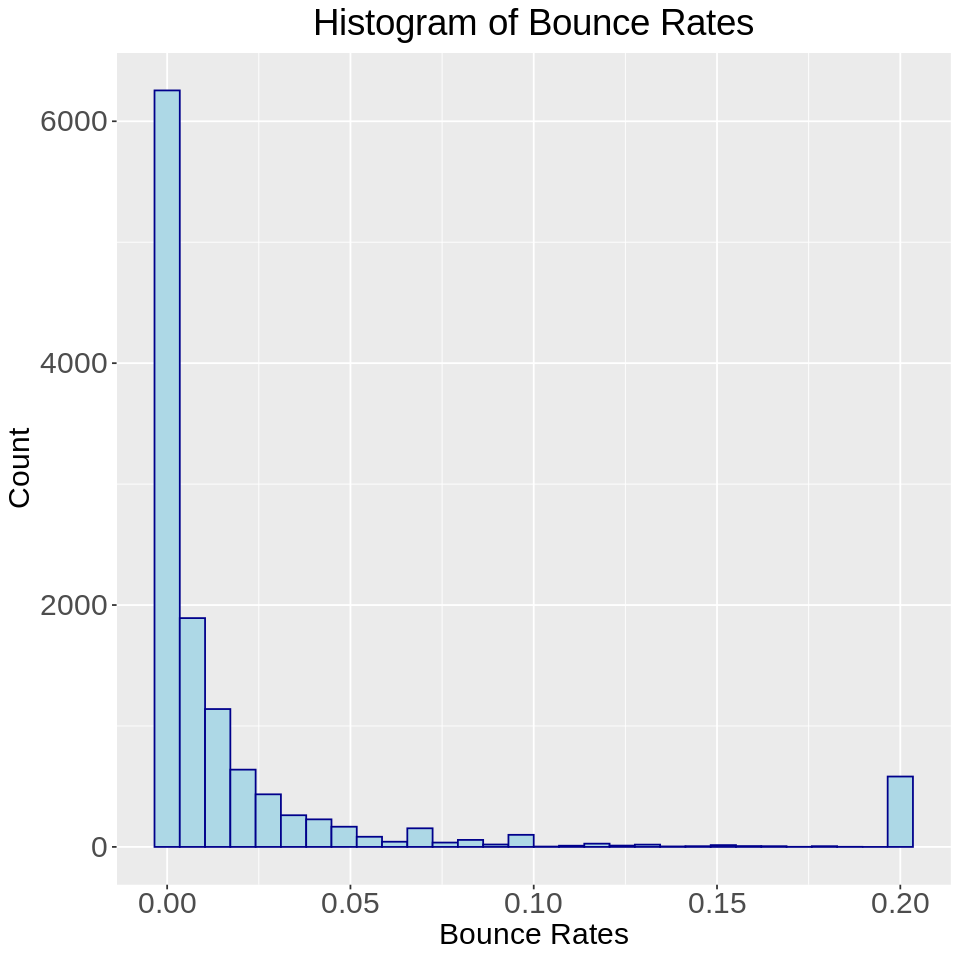

In [ ]:
# Analysis for the Bounce Rates column

options(repr.plot.width = 8, repr.plot.height = 8)
p = df %>% ggplot(aes(x = BounceRates))

p + geom_histogram(color="darkblue", fill="lightblue" ) +
    labs(title = "Histogram of Bounce Rates", x = "Bounce Rates", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

In [ ]:
# Measures of dispersion

cat("Skewness:", skewness(df$BounceRates), "\n")
cat("Kurtosis", kurtosis(df$BounceRates), "\n")
cat("Standard Deviation:", sd(df$BounceRates), "\n")
cat("Coefficient of variation:", sd(df$BounceRates)/ mean(df$BounceRates))
cat("\n", "\n")

# Measures of central tendancy

summary(df$BounceRates)

# The data is skewed to the right and is leptokurtic.
# Minimum value is 0 and maximum value is .2
# The mean is 0.0205

Skewness: 3.150776 
Kurtosis 12.23704 
Standard Deviation: 0.04544155 
Coefficient of variation: 2.220904
 


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max. 
0.000000 0.000000 0.002924 0.020461 0.016667 0.200000 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



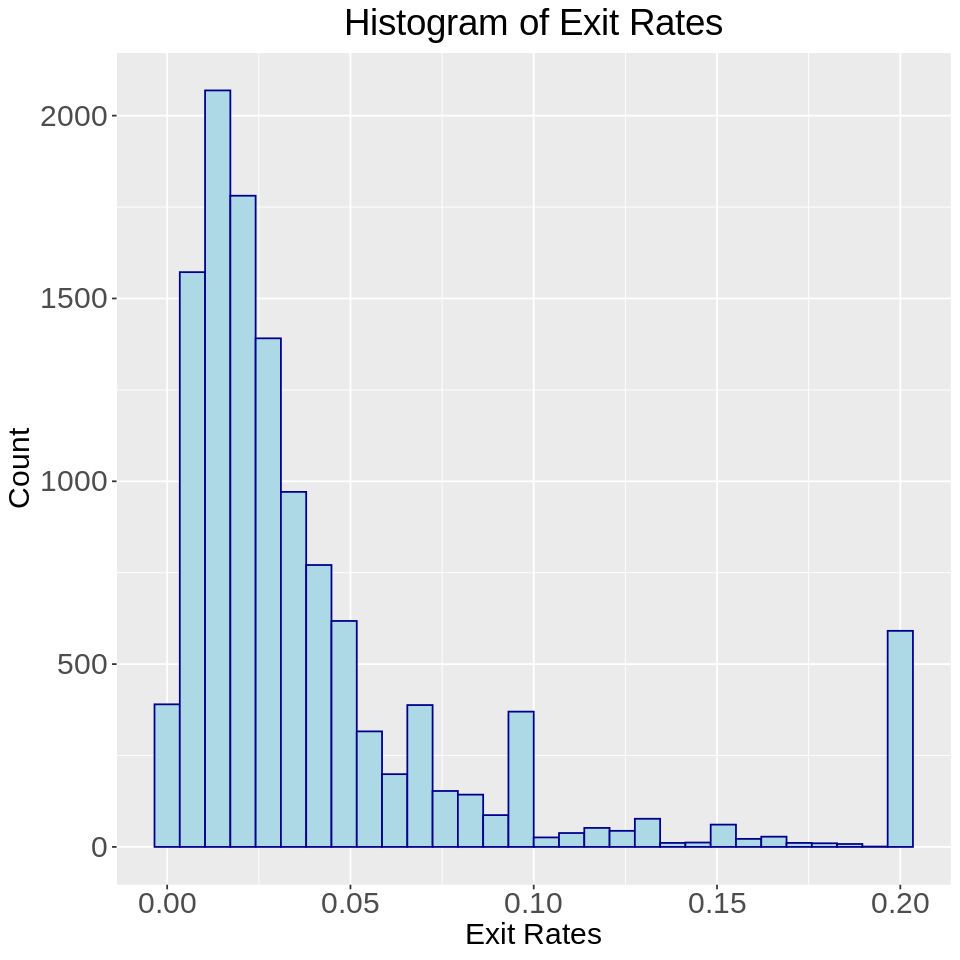

In [ ]:
# Analysis for the Exit Rates column

options(repr.plot.width = 8, repr.plot.height = 8)
p = df %>% ggplot(aes(x = ExitRates))

p + geom_histogram(color="darkblue", fill="lightblue" ) +
    labs(title = "Histogram of Exit Rates", x = "Exit Rates", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

In [ ]:
# Measures of dispersion

cat("Skewness:", skewness(df$ExitRates), "\n")
cat("Kurtosis", kurtosis(df$ExitRates), "\n")
cat("Standard Deviation:", sd(df$ExitRates), "\n")
cat("Coefficient of variation:", sd(df$ExitRates)/ mean(df$ExitRates))
cat("\n", "\n")

# Measures of central tendancy

summary(df$ExitRates)

# The data is skewed to the right and is leptokurtic.
# Minimum value is 0 and maximum value is .2
# The mean is 0.0415

Skewness: 2.23236 
Kurtosis 7.61752 
Standard Deviation: 0.04627584 
Coefficient of variation: 1.114723
 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
0.00000 0.01423 0.02500 0.04151 0.04848 0.20000 

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.



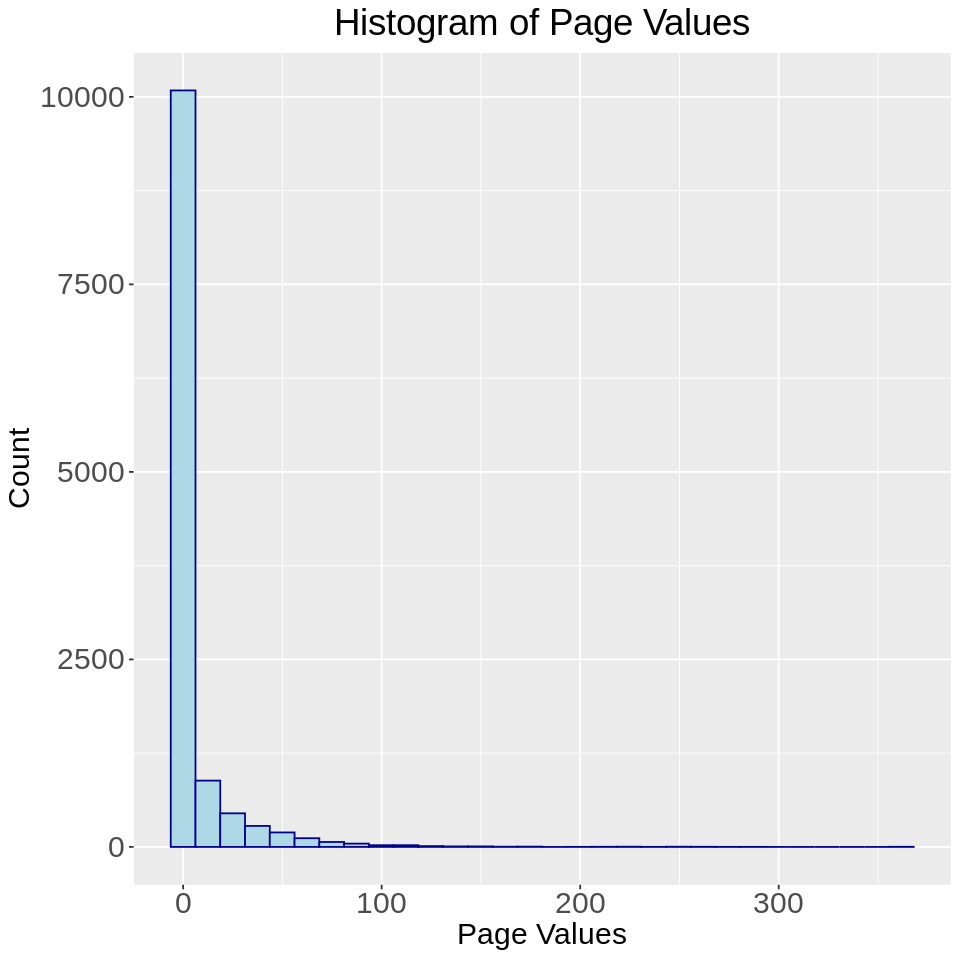

In [ ]:
# Analysis for the Page Values column

options(repr.plot.width = 8, repr.plot.height = 8)
p = df %>% ggplot(aes(x = PageValues))

p + geom_histogram(color="darkblue", fill="lightblue" ) +
    labs(title = "Histogram of Page Values", x = "Page Values", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22))

In [ ]:
# Measures of dispersion

cat("Skewness:", skewness(df$PageValues), "\n")
cat("Kurtosis", kurtosis(df$PageValues), "\n")
cat("Standard Deviation:", sd(df$PageValues), "\n")
cat("Coefficient of variation:", sd(df$PageValues)/ mean(df$PageValues))
cat("\n", "\n")

# Measures of central tendancy

summary(df$PageValues)

# The data is skewed to the right and is leptokurtic. There is also high variation
# Minimum value is 0 and maximum value is 361.764
# The mean is 5.947

Skewness: 6.351741 
Kurtosis 68.00151 
Standard Deviation: 18.64955 
Coefficient of variation: 3.136144
 


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  0.000   0.000   0.000   5.947   0.000 361.764 

## Bivariate Analysis

In [ ]:
# Conveting the categorical columns to factors

df[, 11:18] <- lapply(df[, 11:18], as.factor)

# Checking the structure of the dataset

str(df)

'data.frame':	12211 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : Factor w/ 8 levels "1","2","3","4",..: 1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : Factor w/ 13 levels "1","2","3","4",..: 1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : Factor w/ 9 levels "1","2","3","4",..: 1 1 9 2 1 1 3 1 2 1 ...
 $ T

In [ ]:
# Installing GGally package in order to plot the pairplot

install.packages("GGally")
library("GGally")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘reshape’


Registered S3 method overwritten by 'GGally':
  method from   
  +.gg   ggplot2



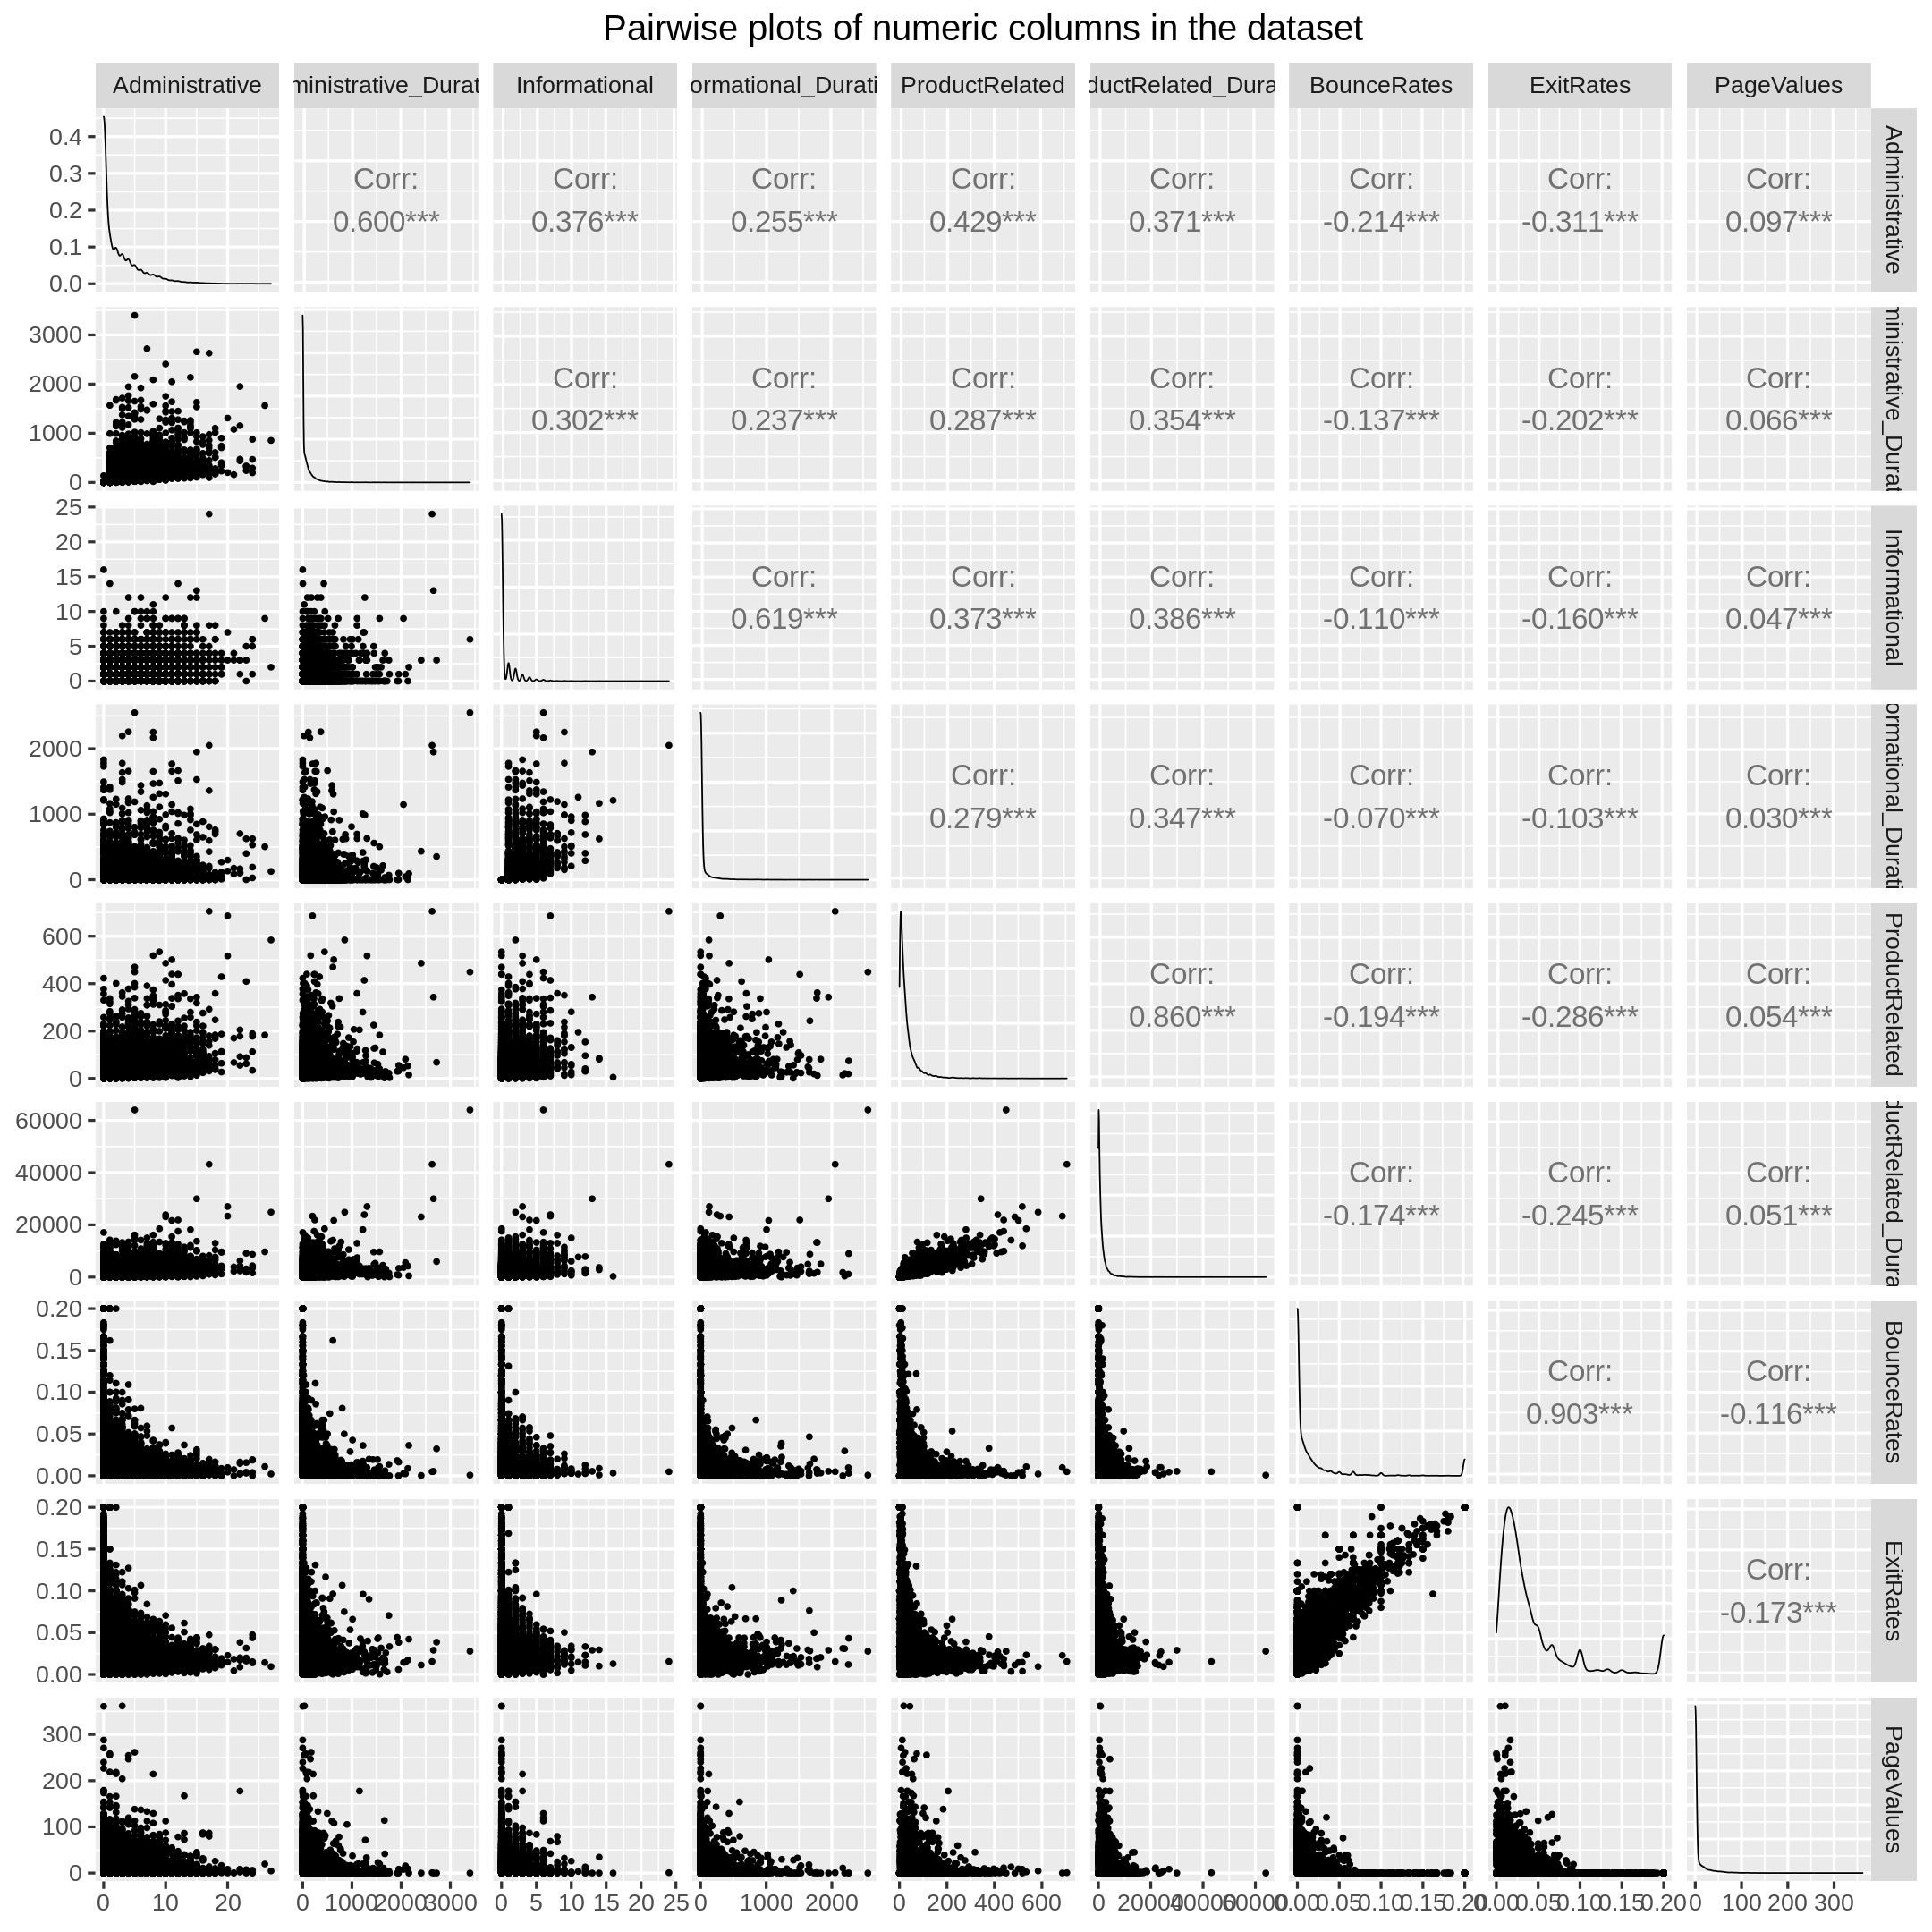

In [ ]:
# Plotting pair plots for numeric columns

options(repr.plot.width = 18, repr.plot.height = 18)
ggpairs(df[, 1:9], upper = list(continuous = wrap("cor", size = 7))) + 
labs(title = "Pairwise plots of numeric columns in the dataset") +
    theme_grey(base_size = 20) +
    theme(plot.title = element_text(hjust = 0.5))

- There is a strong positive correlation between Bounce Rates and Exit Rates (r = 0.903)
- There is also a stong positive correlation between Product Related and Product Related Duration(r = 0.86), Administrative and Administrative Duration (r = 0.6) and Informational and Informational Duration (r = 0.619)

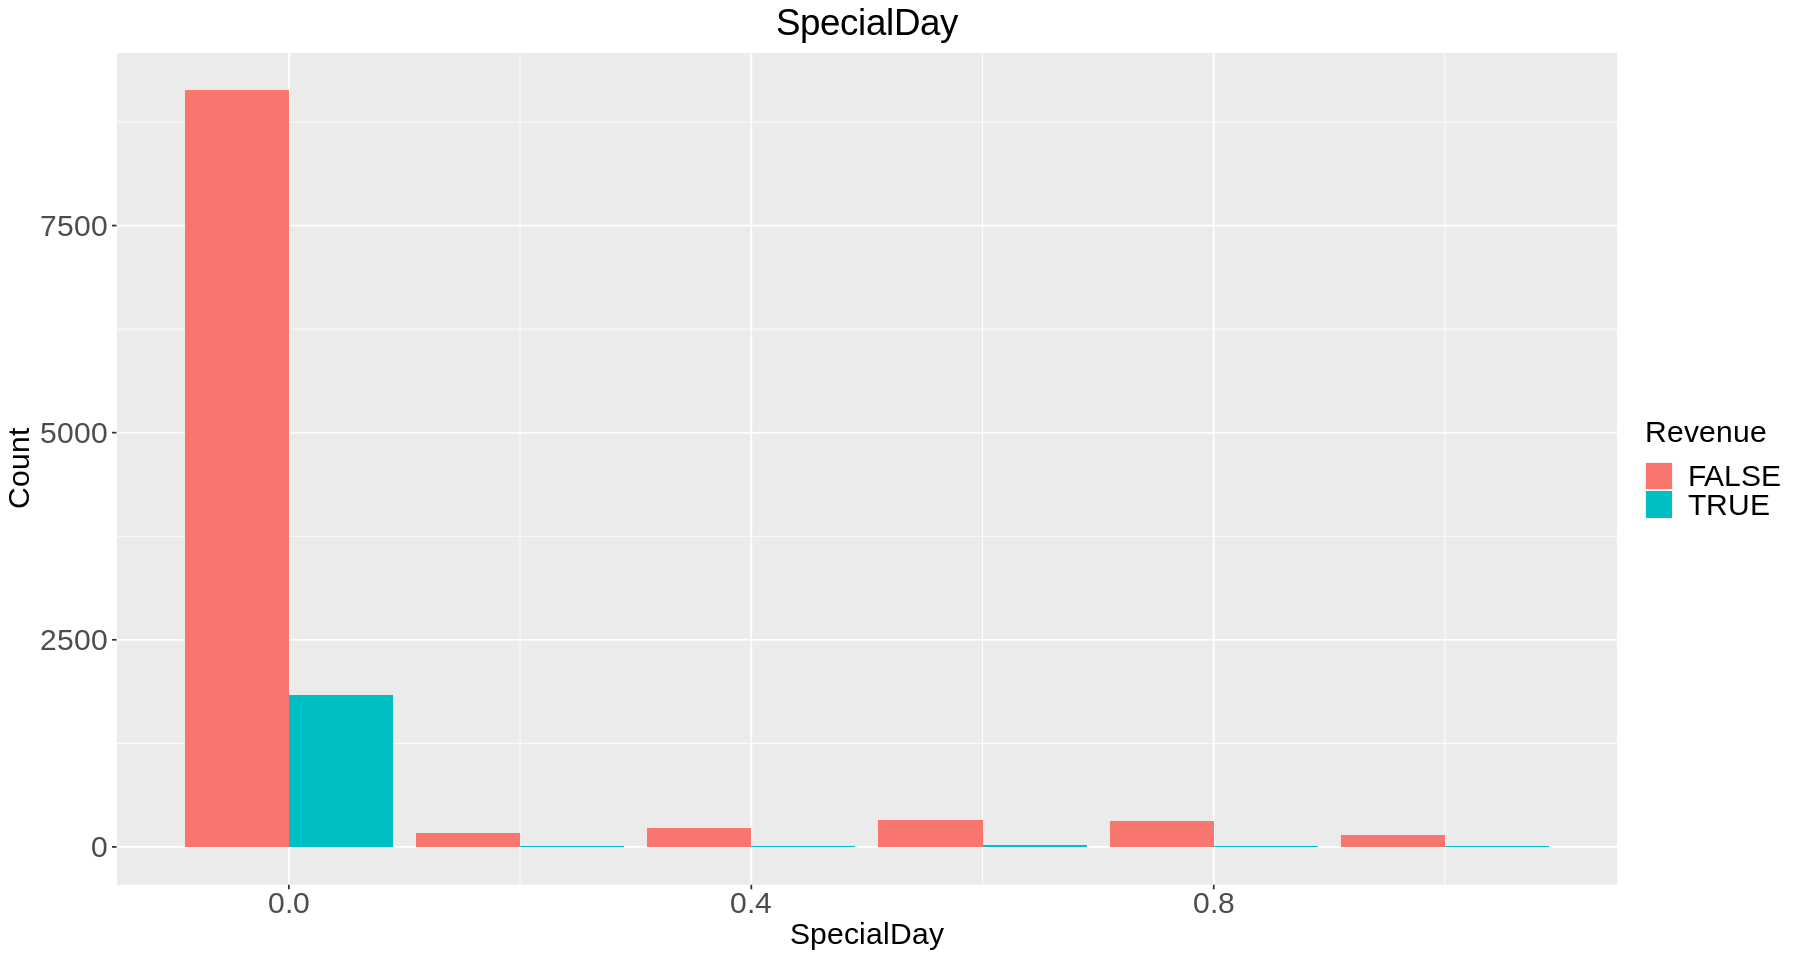

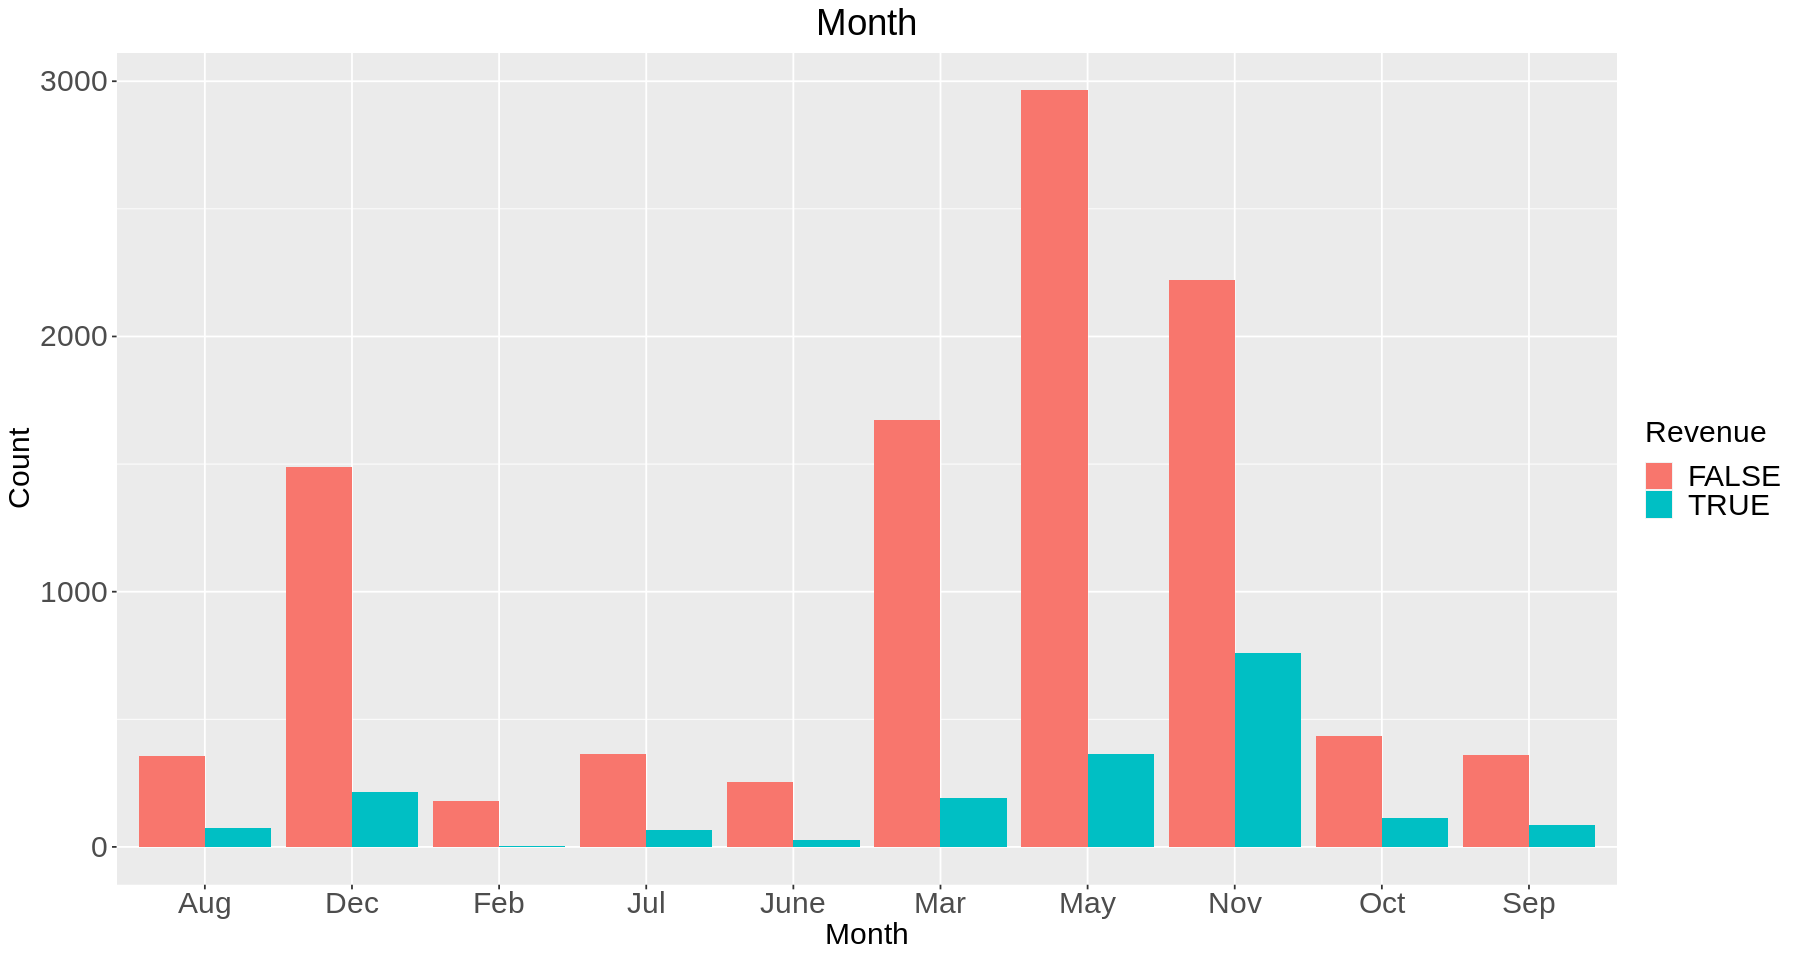

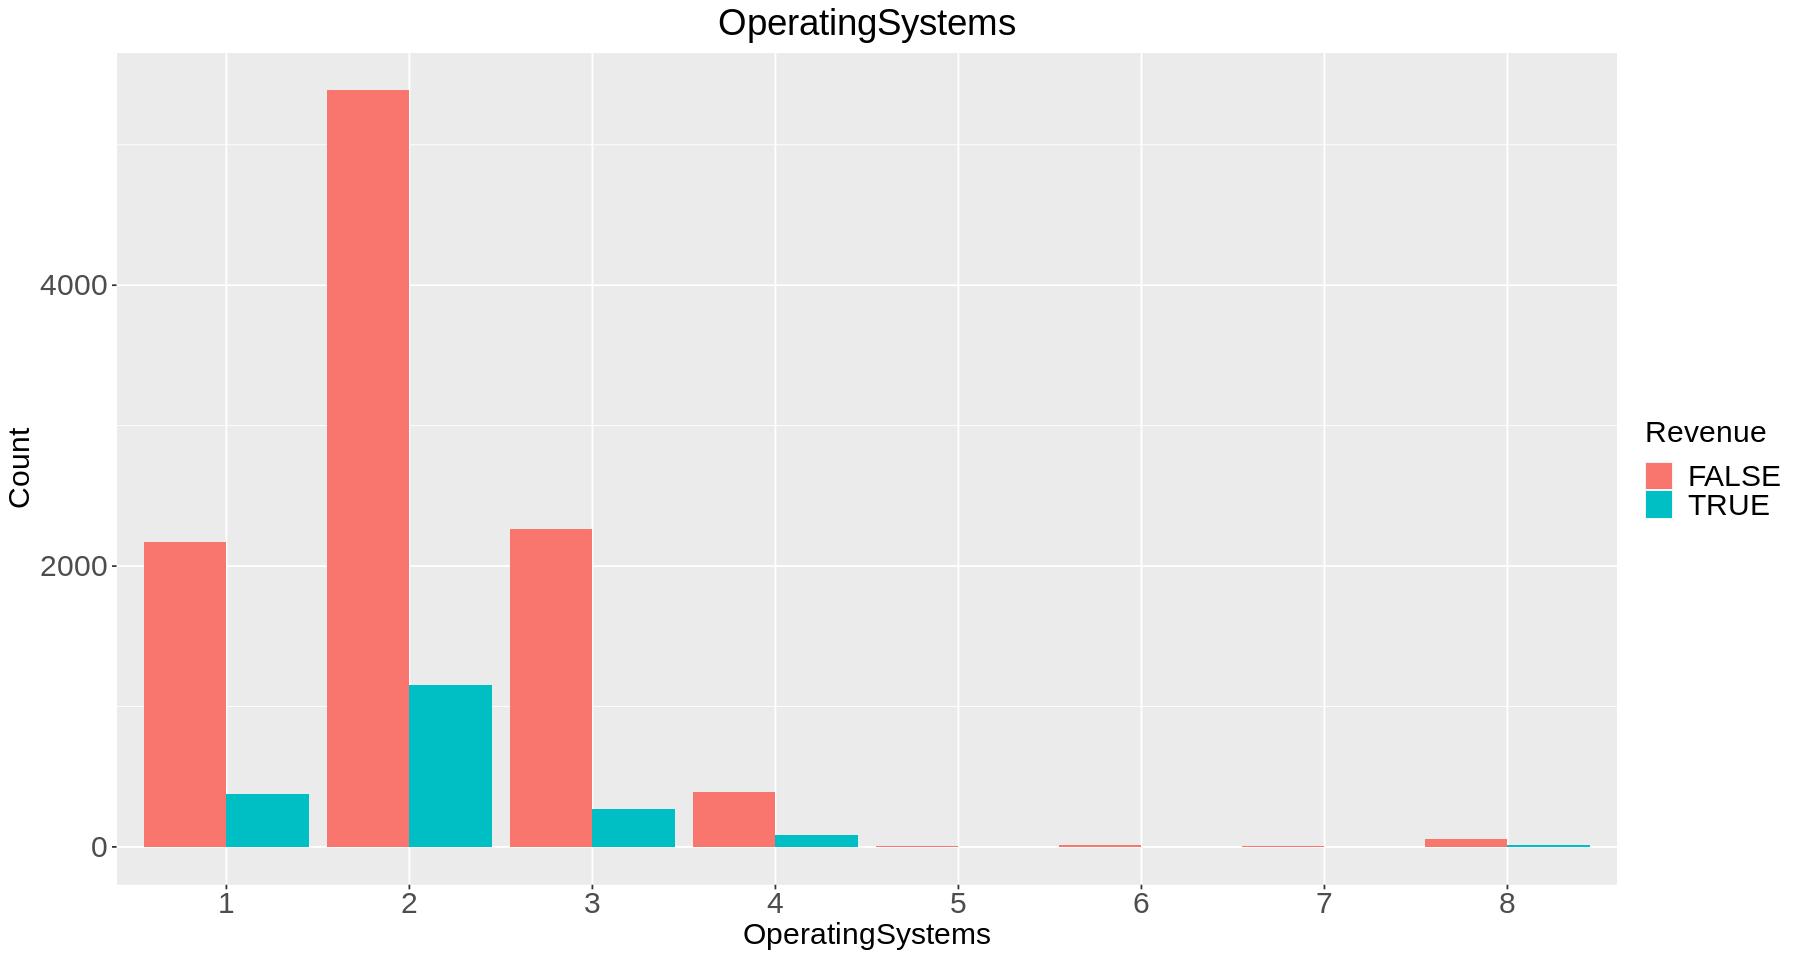

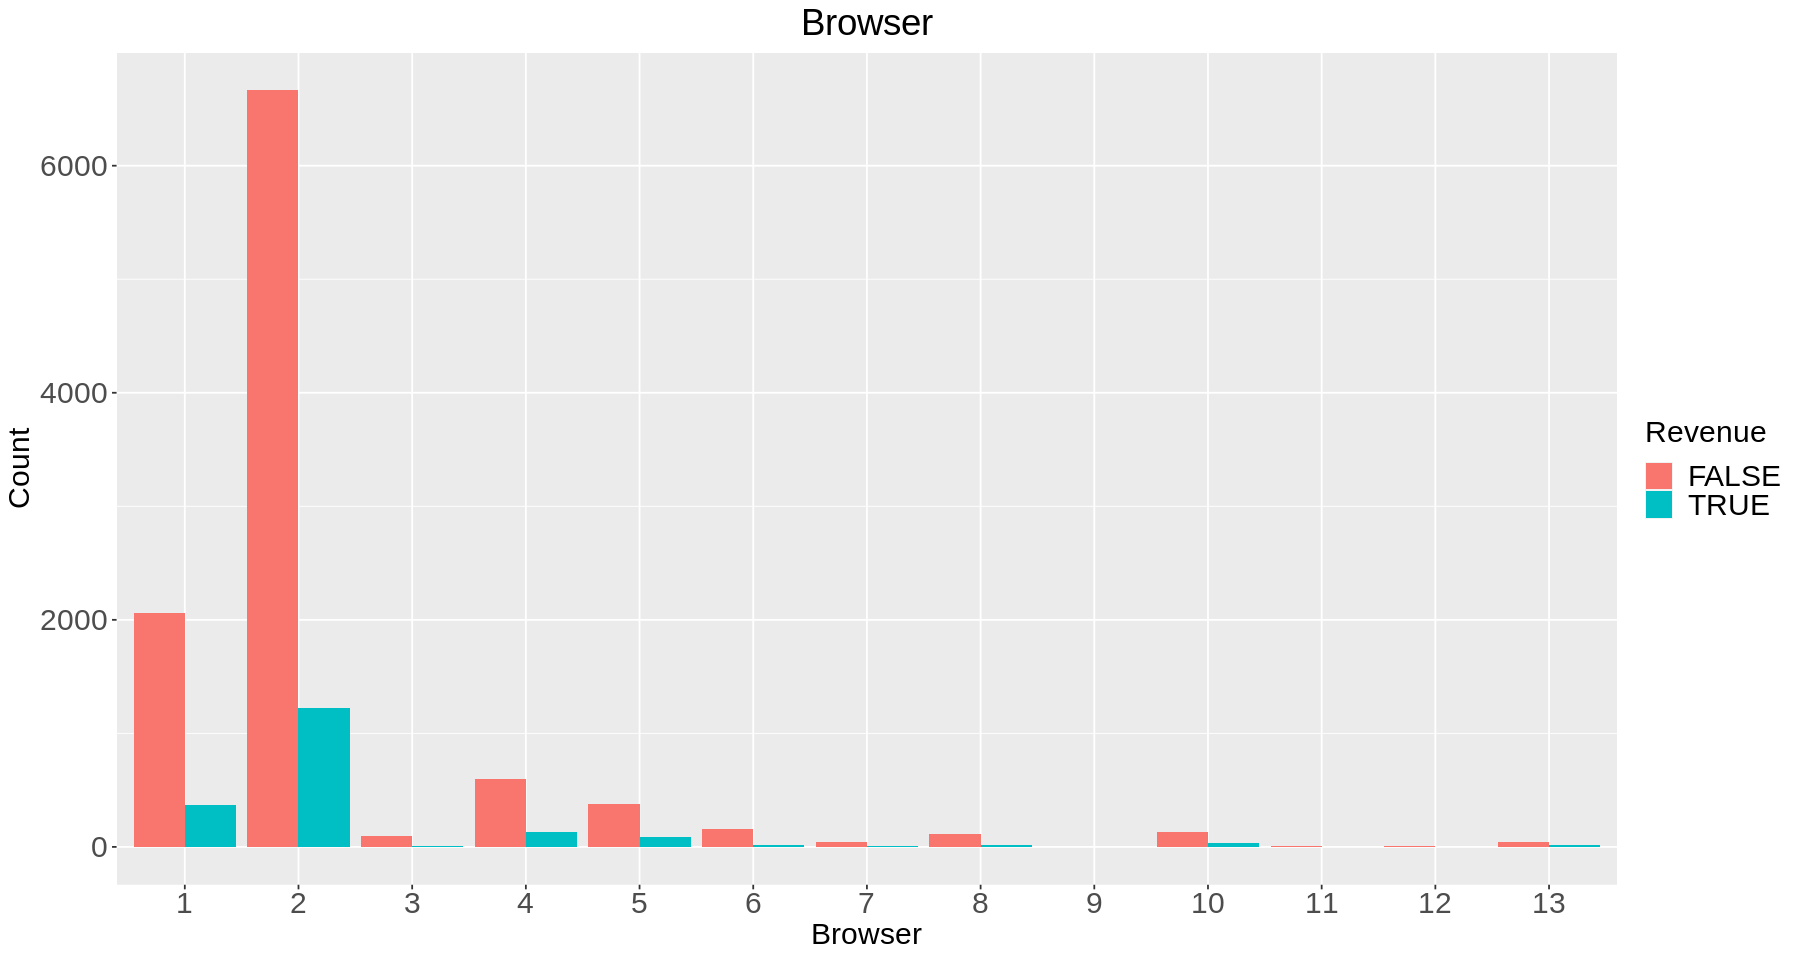

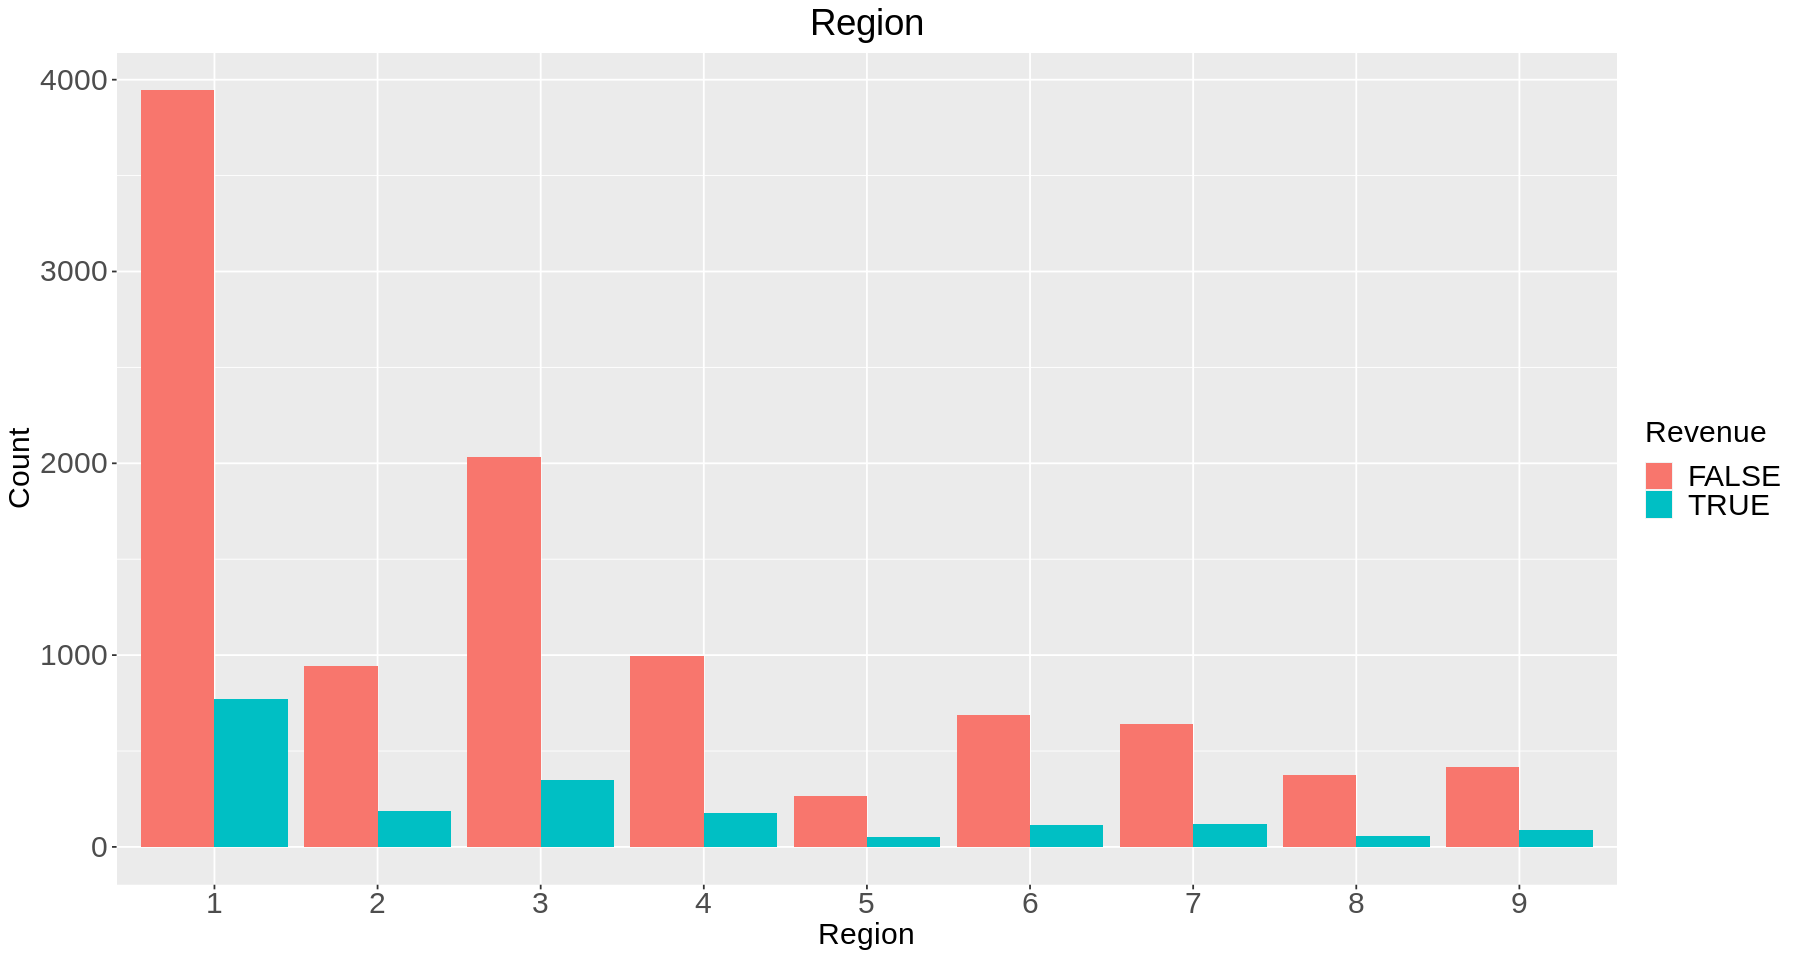

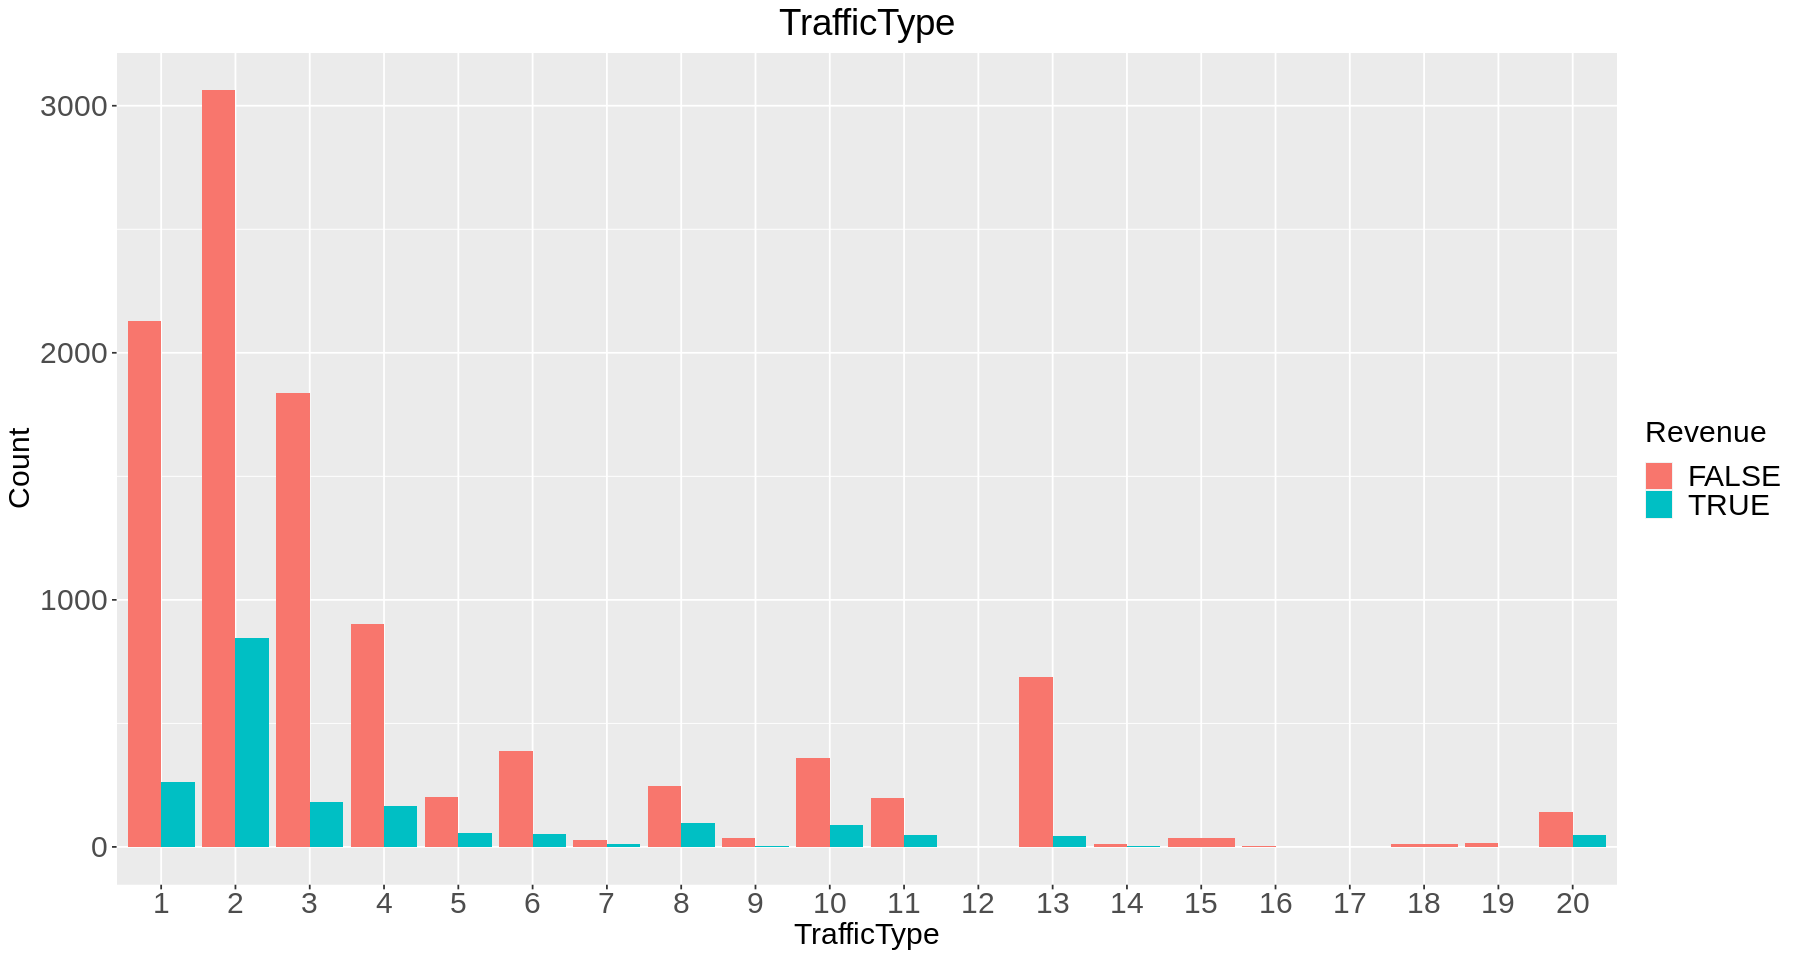

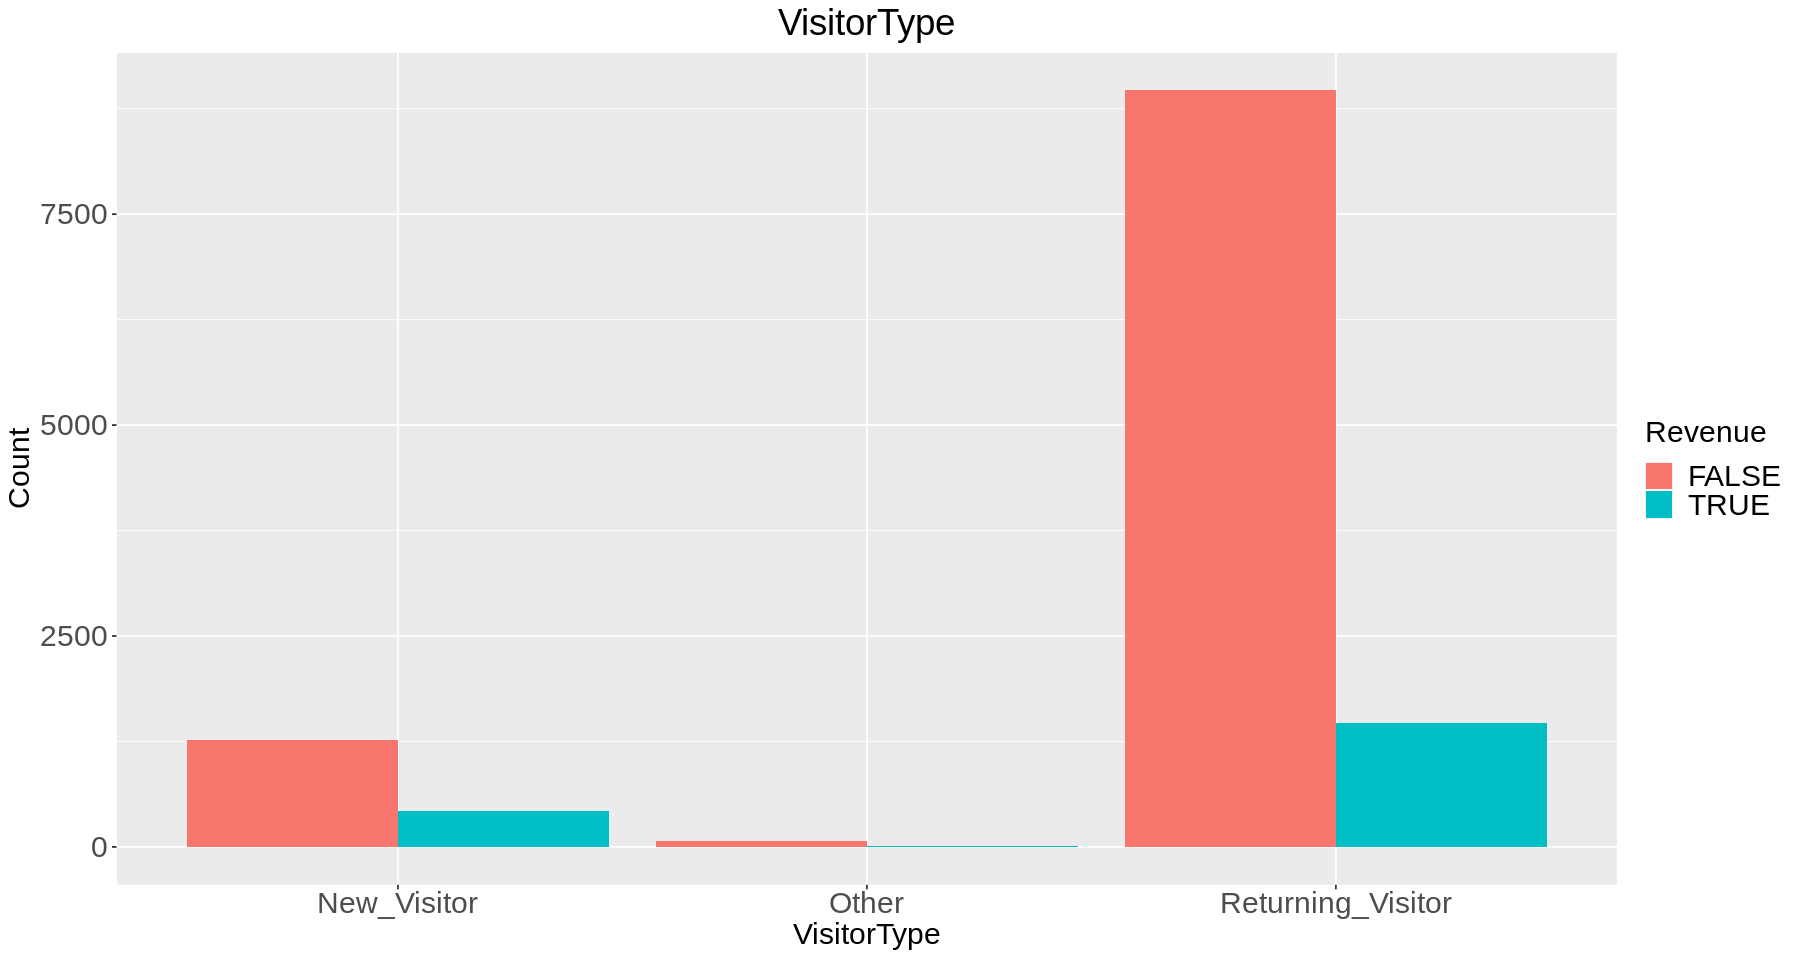

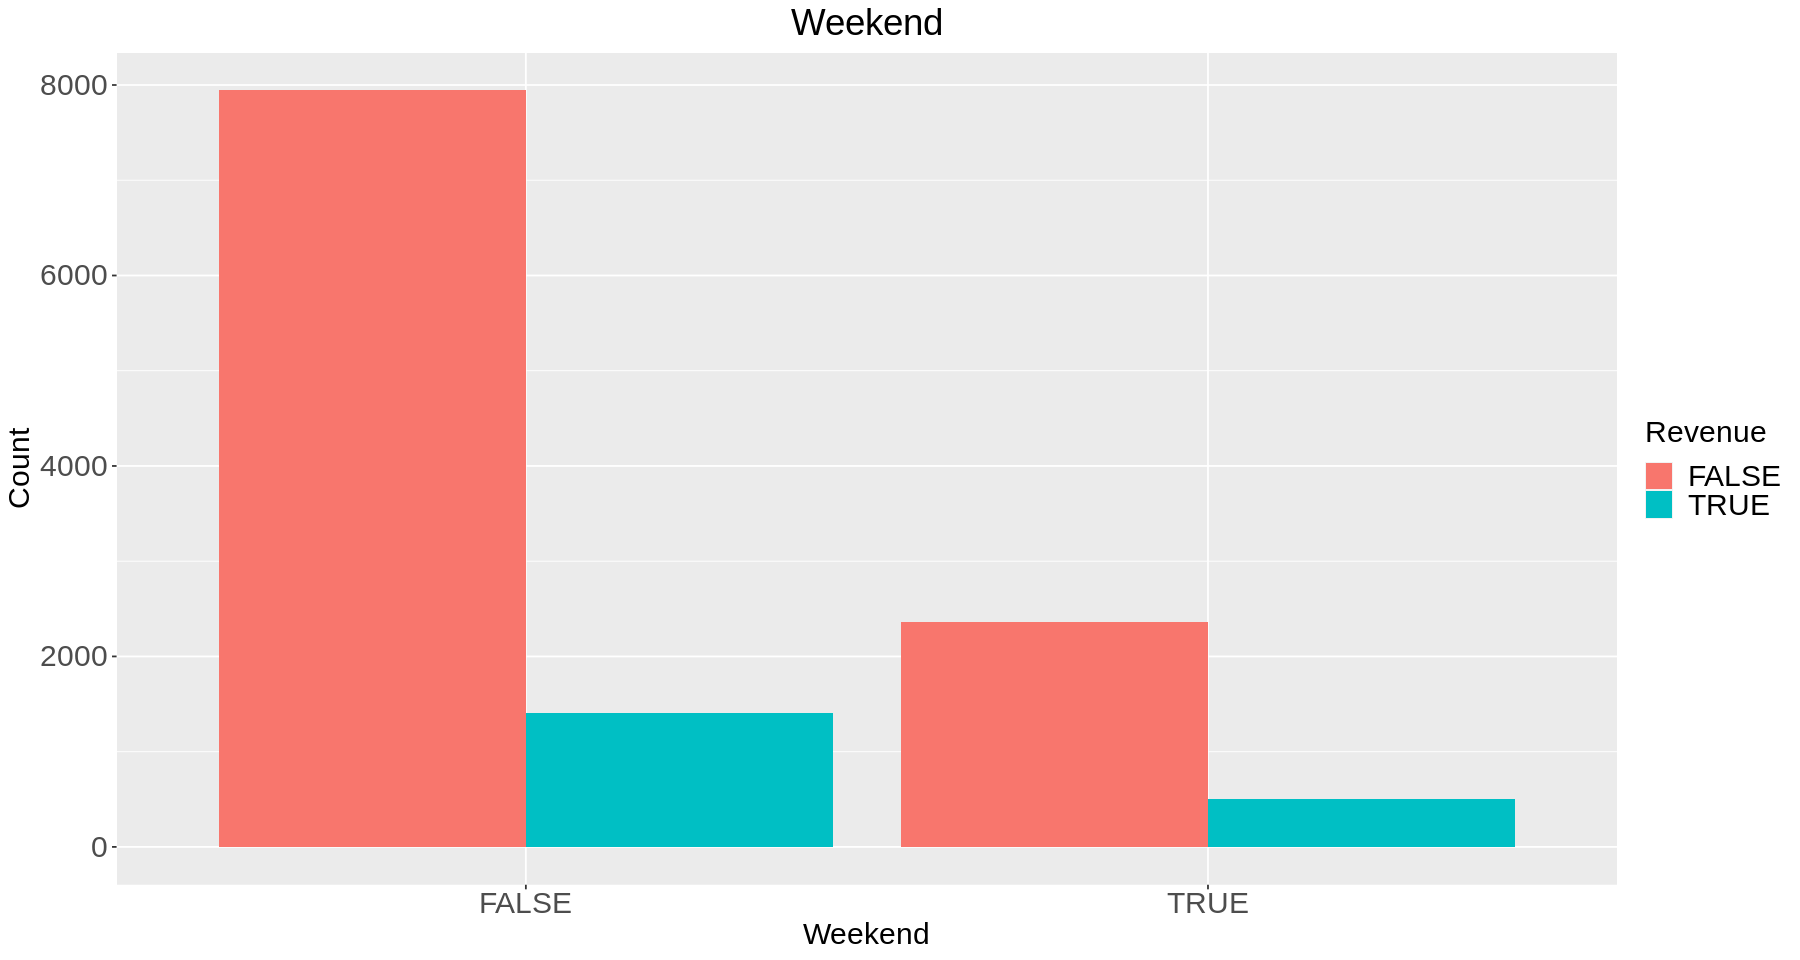

In [ ]:
# Relationshp between Revenue and the other categorical columns

cat1 = df[,10:17]

for (i in 1:length(cat1)) {
  options(repr.plot.width = 15, repr.plot.height = 8)
  print(ggplot(df, aes(x = cat1[,i], fill = Revenue)) + 
    geom_bar(position = "dodge") + 
    labs(title = names(cat1[i]), x = names(cat1[i]), y = "Count") +
      theme(axis.text = element_text(size=18),
            axis.title = element_text(size = 18),
            plot.title = element_text(hjust = 0.5, size = 22),
            legend.title = element_text(size=18),
            legend.text = element_text(size=18)))
  cat("\n", "\n")
}

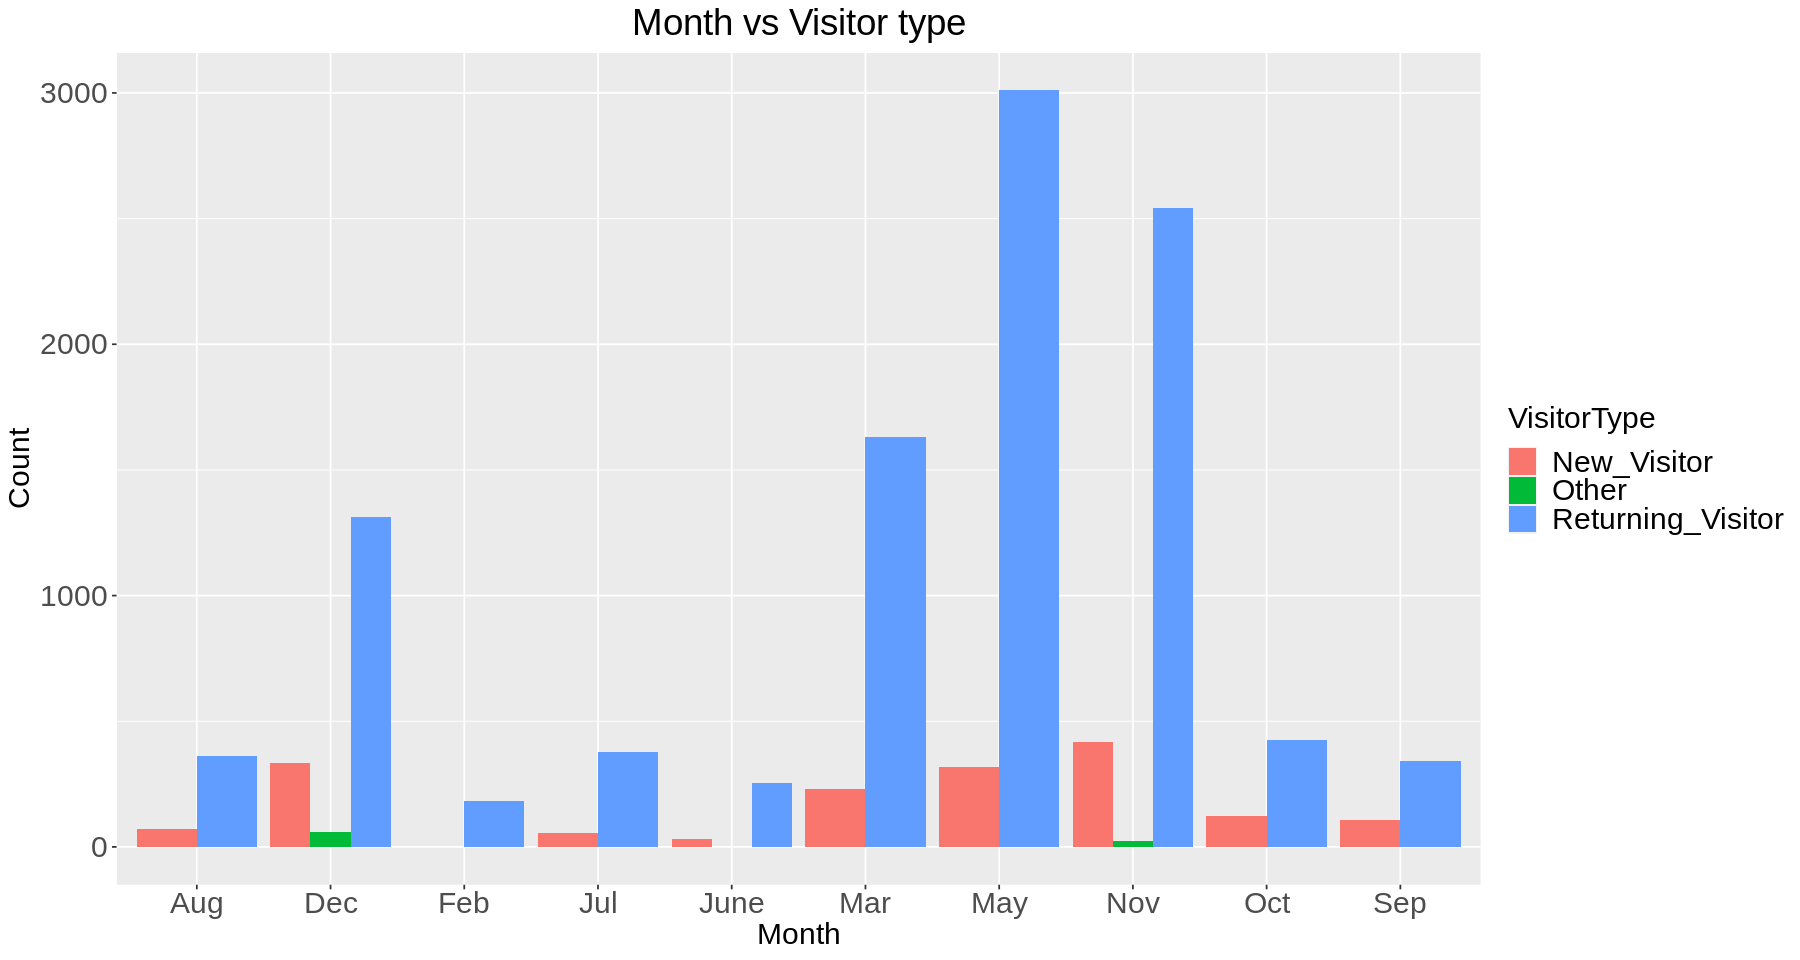

In [ ]:
# Relationship between the visitor type and the month

options(repr.plot.width = 15, repr.plot.height = 8)
ggplot(df, aes(x = Month, fill = VisitorType)) + 
  geom_bar(position = "dodge") + 
  labs(title = "Month vs Visitor type", x = "Month", y = "Count") +
    theme(axis.text = element_text(size=18),
          axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22),
          legend.title = element_text(size=18),
          legend.text = element_text(size=18))

- The company makes the most revenue when it is not a special day.
- The most revenue is made in November and the least revenue is made in February.
- The company makes most money from region 1 than all the other 8 regions.
- More revenue is made from returning visitors than new visitors.
- More revenue is made on weekdays than on weekends.
- New visitors are recorded to be the most in November and returning visitors. are seen to be the most in May.

## Multivariate Analysis

In [ ]:
# Installing and loading package ggcorrplot

install.packages("ggcorrplot")
library(ggcorrplot)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



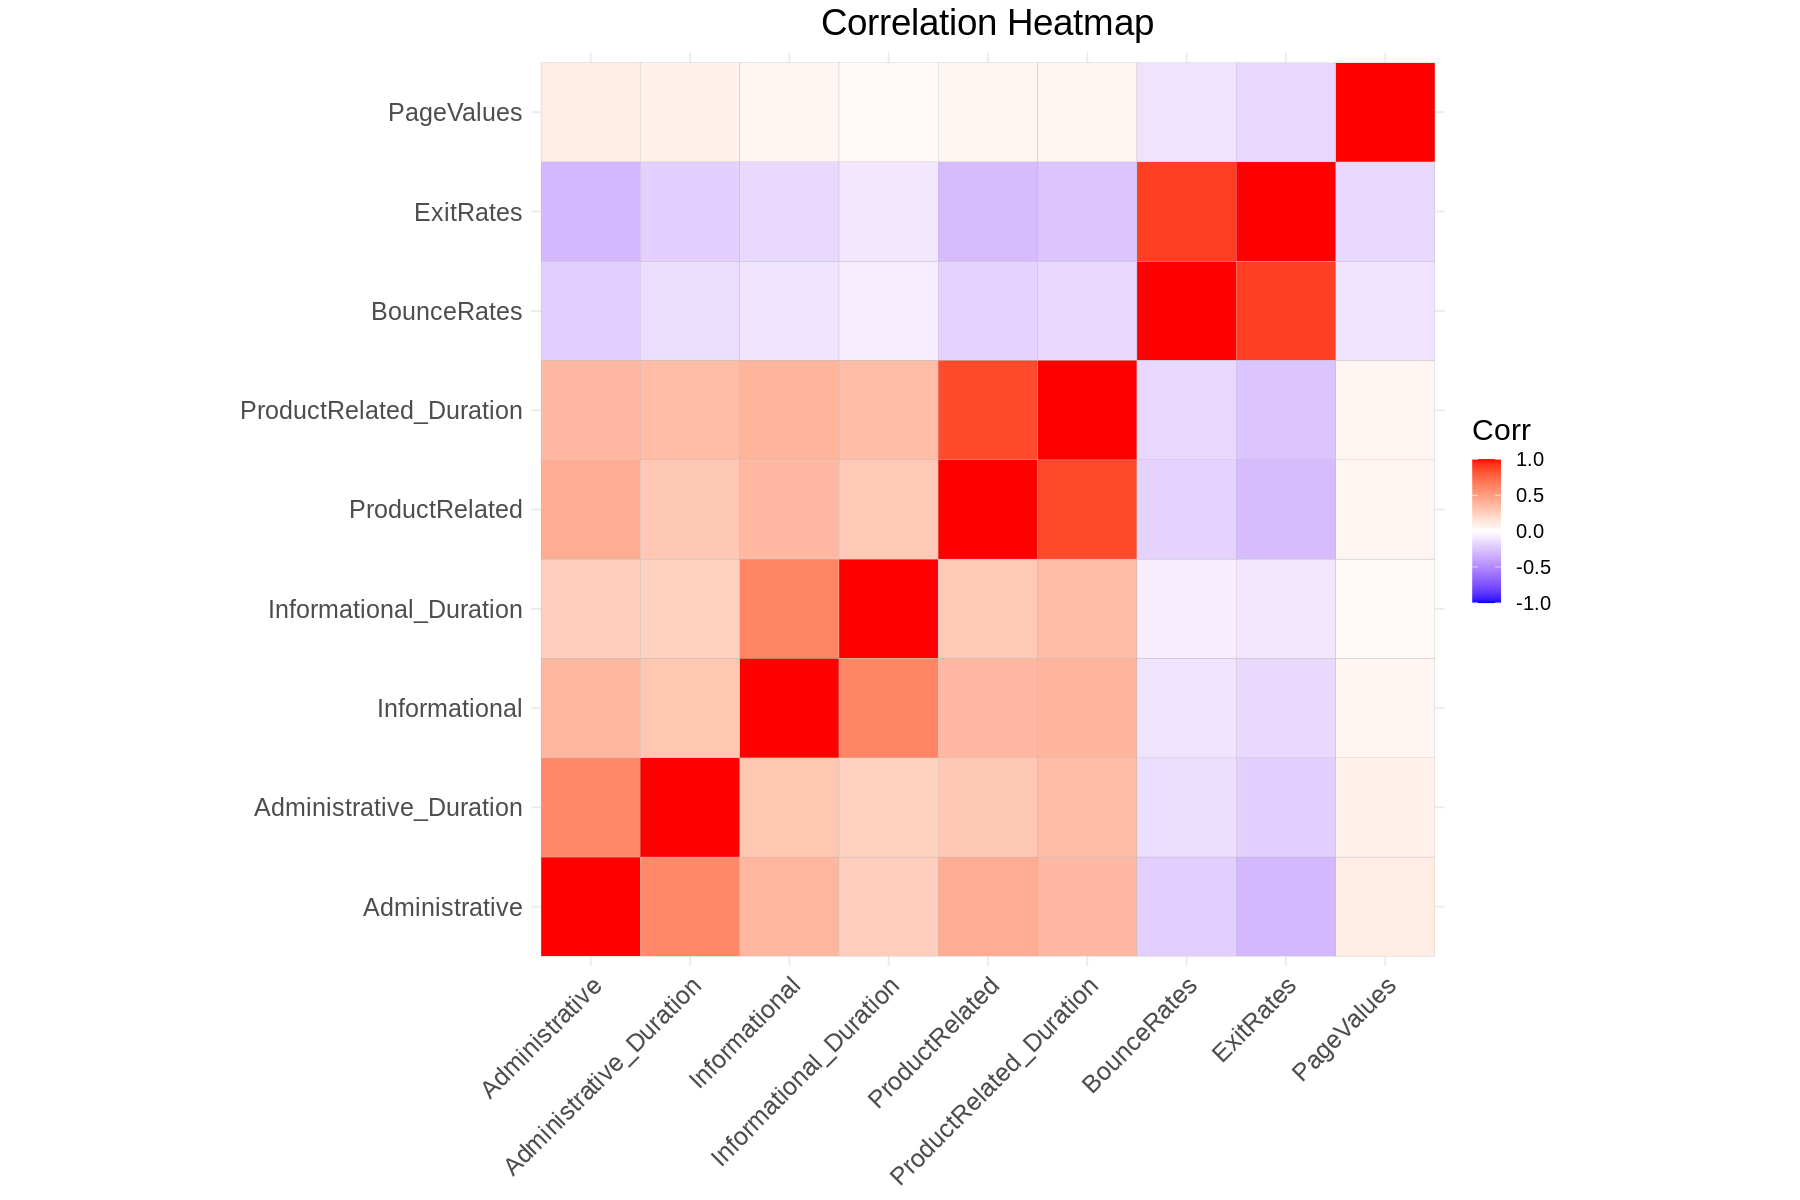

In [ ]:
# Creating the correlation heatmap

options(repr.plot.width = 15, repr.plot.height = 10)
ggcorrplot(cor(df[, 1:9]), tl.cex = 15) + 
  labs(title = "Correlation Heatmap") +
    theme(axis.title = element_text(size = 18),
          plot.title = element_text(hjust = 0.5, size = 22),
          legend.title = element_text(size=18),
          legend.text = element_text(size=12))

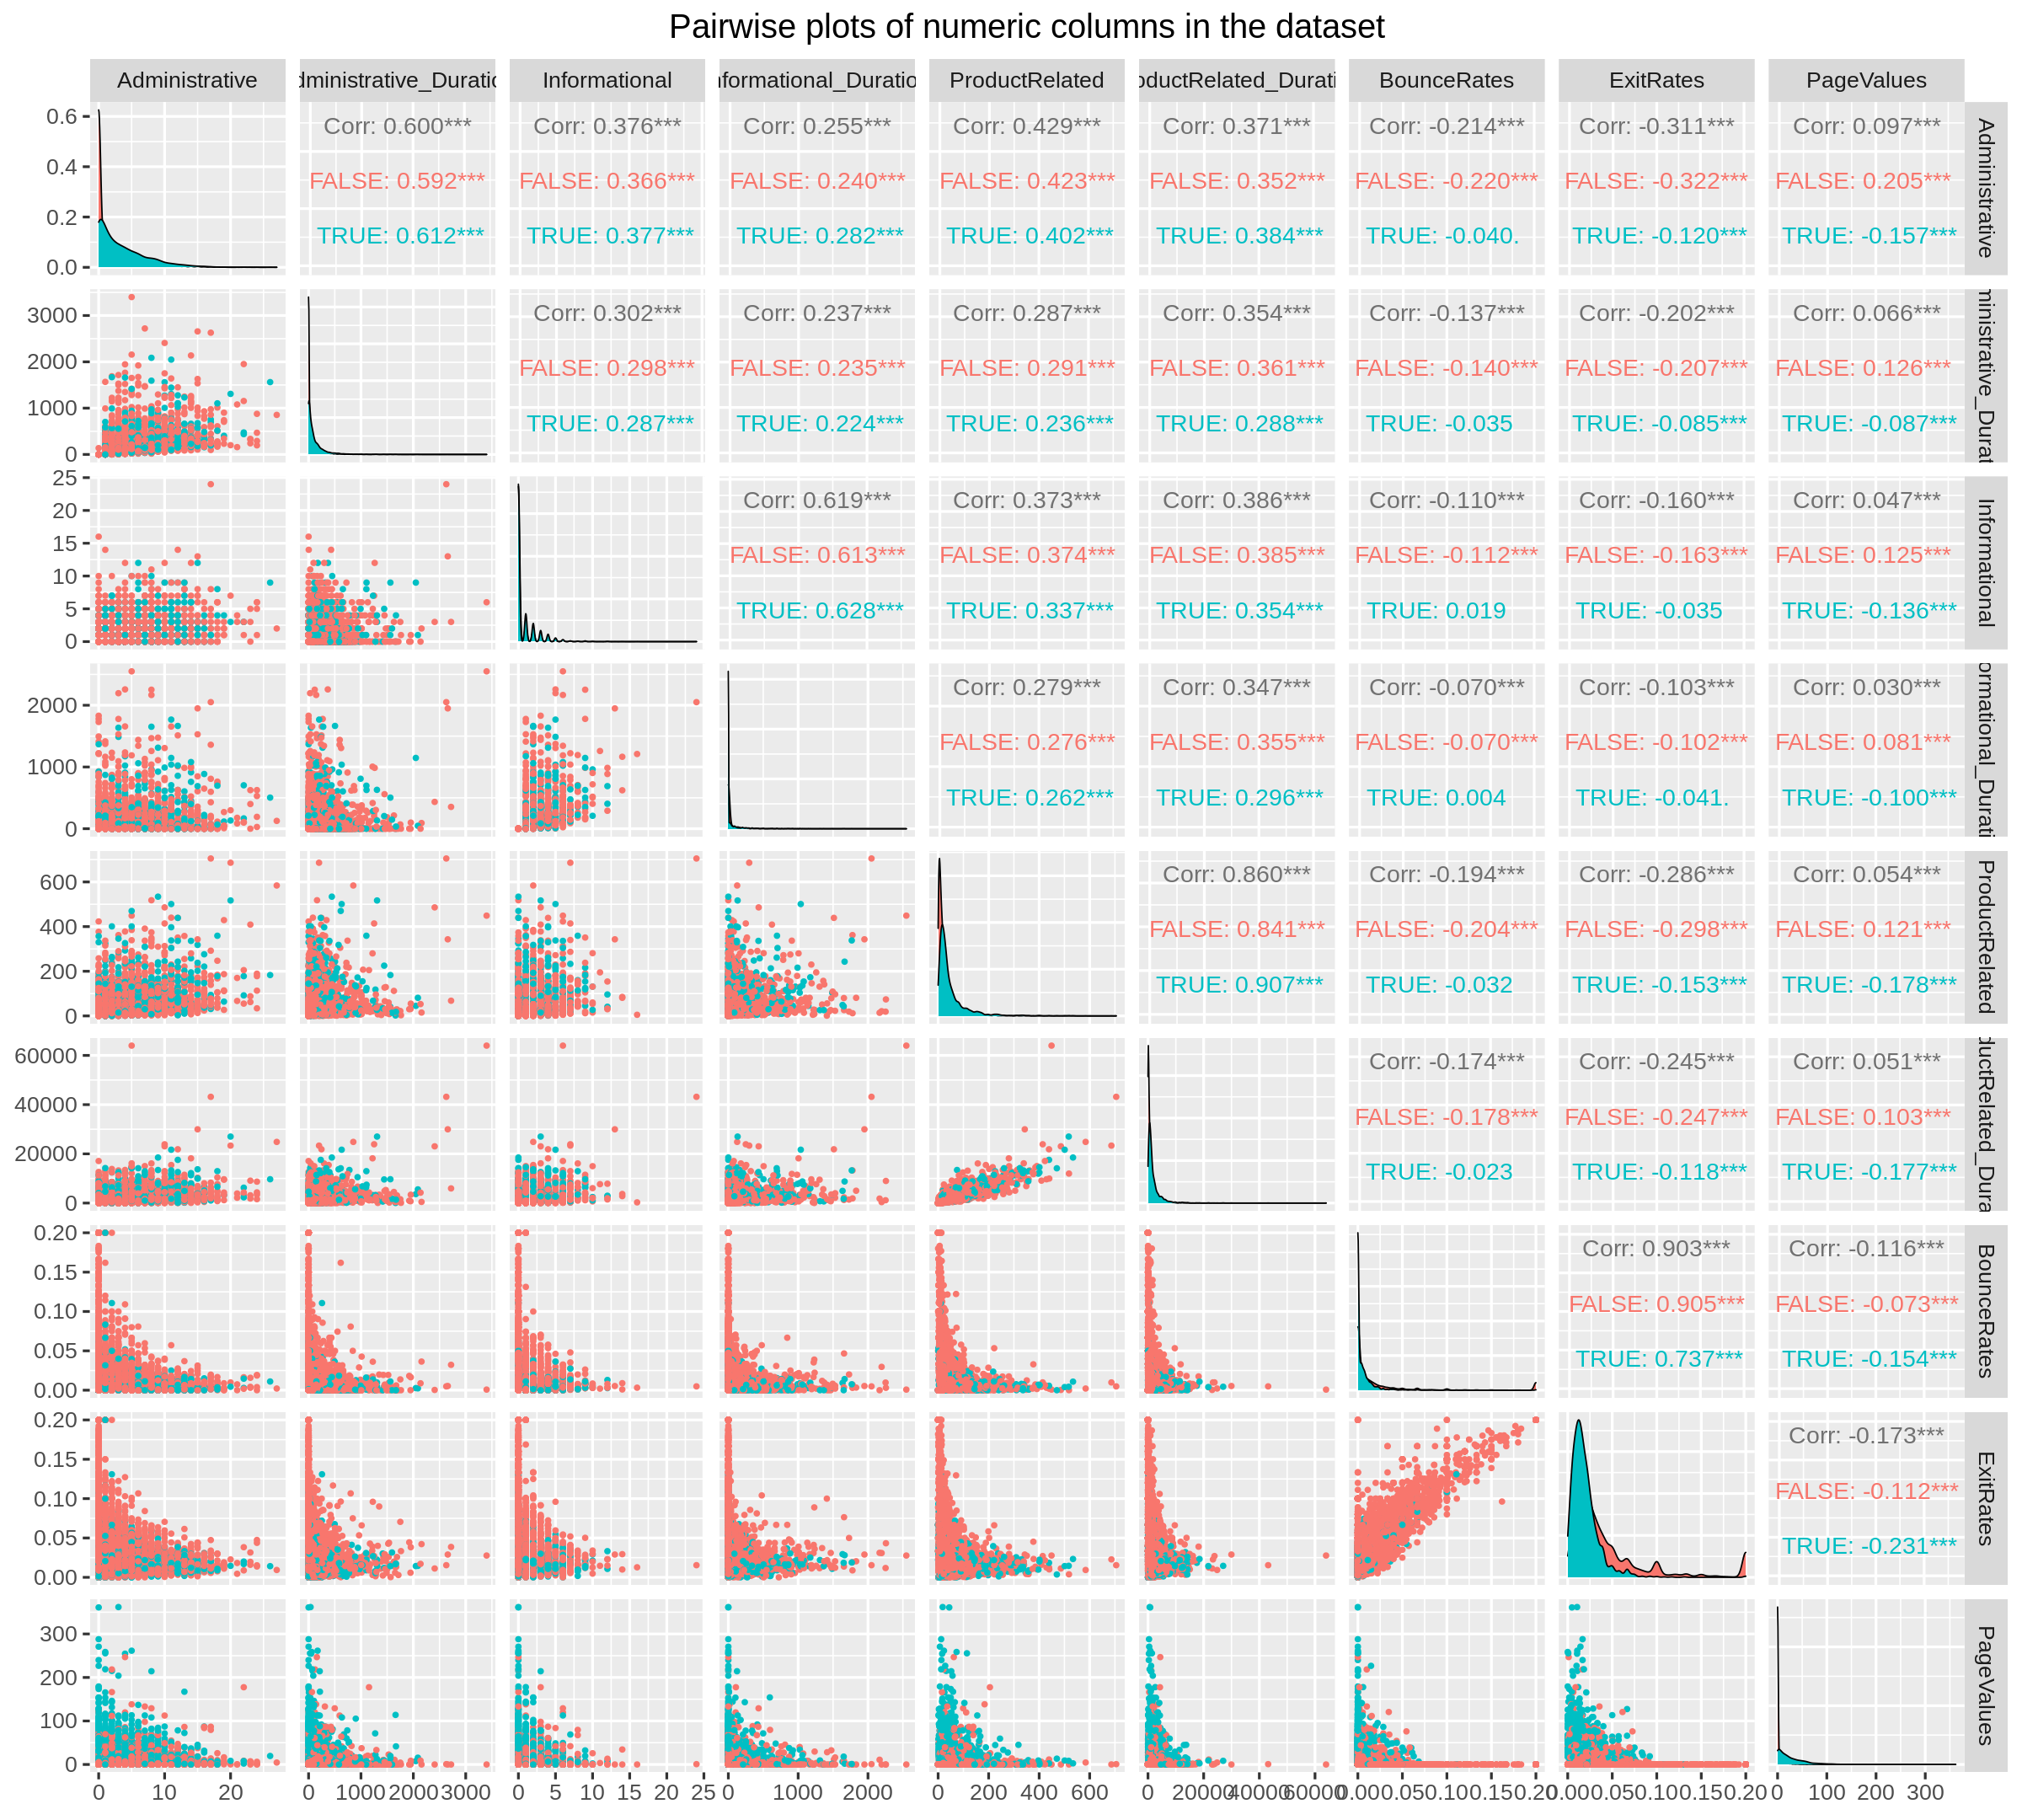

In [ ]:
# Relationship between numerical variables and Revenue column

options(repr.plot.width = 20, repr.plot.height = 18)
ggpairs(df[, 1:9], aes(color = df$Revenue), upper = list(continuous = wrap("cor", size = 6))) + 
labs(title = "Pairwise plots of numeric columns in the dataset") +
    theme_grey(base_size = 20) +
    theme(plot.title = element_text(hjust = 0.5))

# 7. Implement the solution

## K means Clustering

In [ ]:
# Dropping the Revenue column since it is considered the class label

df = select(df, -Revenue)
colnames(df)

[1] "Administrative"          "Administrative_Duration"
 [3] "Informational"           "Informational_Duration" 
 [5] "ProductRelated"          "ProductRelated_Duration"
 [7] "BounceRates"             "ExitRates"              
 [9] "PageValues"              "SpecialDay"             
[11] "Month"                   "OperatingSystems"       
[13] "Browser"                 "Region"                 
[15] "TrafficType"             "VisitorType"            
[17] "Weekend"

In [ ]:
# Checking the structure of the columns

str(df)

'data.frame':	12211 obs. of  17 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : Factor w/ 10 levels "Aug","Dec","Feb",..: 3 3 3 3 3 3 3 3 3 3 ...
 $ OperatingSystems       : Factor w/ 8 levels "1","2","3","4",..: 1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : Factor w/ 13 levels "1","2","3","4",..: 1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : Factor w/ 9 levels "1","2","3","4",..: 1 1 9 2 1 1 3 1 2 1 ...
 $ T

In [ ]:
# Encoding the Visitor Type and Weekend columns

df$VisitorType = ifelse(df$VisitorType == "New_Visitor", 0,
                  ifelse(df$VisitorType == "Returning_Visitor", 1,2))

df$Weekend = ifelse(df$Weekend == "False", 0, 1)

head(df)

Administrative Administrative_Duration Informational Informational_Duration
1 0               0                      0              0                    
2 0               0                      0              0                    
3 0              -1                      0             -1                    
4 0               0                      0              0                    
5 0               0                      0              0                    
6 0               0                      0              0                    
  ProductRelated ProductRelated_Duration BounceRates ExitRates PageValues
1  1               0.000000              0.20000000  0.2000000 0         
2  2              64.000000              0.00000000  0.1000000 0         
3  1              -1.000000              0.20000000  0.2000000 0         
4  2               2.666667              0.05000000  0.1400000 0         
5 10             627.500000              0.02000000  0.0500000 0         
6 19             154.216667              0.01578947  0.0245614 0         
  SpecialDay Month OperatingSystems Browser Region TrafficType VisitorType
1 0          Feb   1                1       1      1           1          
2 0          Feb   2                2       1      2           1          
3 0          Feb   4                1       9      3           1          
4 0          Feb   3                2       2      4           1          
5 0          Feb   3                3       1      4           1          
6 0          Feb   2                2       1      3           1          
  Weekend
1 1      
2 1      
3 1      
4 1      
5 1      
6 1

In [ ]:
# Encoding the month column as well

df$Month = ifelse(df$Month == "Aug", 0,
            ifelse(df$Month == "Dec", 1,
            ifelse(df$Month == "Feb", 2,
            ifelse(df$Month == "Jul", 3,
            ifelse(df$Month == "June", 4,
            ifelse(df$Month == "Mar", 5,
            ifelse(df$Month == "May", 6,
            ifelse(df$Month == "Nov", 7,
            ifelse(df$Month == "Oct", 8, 9)))))))))

In [ ]:
# Checking the structure of columns again

str(df)

'data.frame':	12211 obs. of  17 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : num  2 2 2 2 2 2 2 2 2 2 ...
 $ OperatingSystems       : Factor w/ 8 levels "1","2","3","4",..: 1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : Factor w/ 13 levels "1","2","3","4",..: 1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : Factor w/ 9 levels "1","2","3","4",..: 1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : Factor w/ 20 

In [ ]:
# Changing columns 12 to 15 to integer

df[, 12:15] <- lapply(df[, 12:15], as.integer)

# Checking the structure of the dataset

str(df)

'data.frame':	12211 obs. of  17 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : num  2 2 2 2 2 2 2 2 2 2 ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : num  1 1 1 1 1 1 1 1 1 1 ...
 $ Weekend                : nu

### Feature Selection

In [ ]:
# Installing and loading the caret and mlbench packages

install.packages(c("caret", "mlbench"))
library(caret)
library(mlbench)

Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘iterators’, ‘gower’, ‘ipred’, ‘timeDate’, ‘foreach’, ‘ModelMetrics’, ‘recipes’, ‘pROC’



Attaching package: ‘caret’


The following object is masked from ‘package:survival’:

    cluster


The following object is masked from ‘package:purrr’:

    lift




In [ ]:
# Determining the correlated features

set.seed(5)

# calculate correlation matrix
correlationMatrix <- cor(df[, 1:9])

# find attributes that are highly corrected (ideally >0.75)
highlyCorrelated <- findCorrelation(correlationMatrix, cutoff=0.6)

# print indexes of highly correlated attributes
print(highlyCorrelated)

# The 6th, 1st, 8th and 3rd columns are highly correlated i.e
# Product Related Duration, Administrative, Exit Rates and Informational columns respectively

[1] 6 1 8 3


In [ ]:
# Dropping the columns mentioned above

df = select(df, -c(ProductRelated_Duration, Administrative, ExitRates, Informational))

head(df)

Administrative_Duration Informational_Duration ProductRelated BounceRates
1  0                       0                      1             0.20000000 
2  0                       0                      2             0.00000000 
3 -1                      -1                      1             0.20000000 
4  0                       0                      2             0.05000000 
5  0                       0                     10             0.02000000 
6  0                       0                     19             0.01578947 
  PageValues SpecialDay Month OperatingSystems Browser Region TrafficType
1 0          0          2     1                1       1      1          
2 0          0          2     2                2       1      2          
3 0          0          2     4                1       9      3          
4 0          0          2     3                2       2      4          
5 0          0          2     3                3       1      4          
6 0          0          2     2                2       1      3          
  VisitorType Weekend
1 1           1      
2 1           1      
3 1           1      
4 1           1      
5 1           1      
6 1           1

In [ ]:
# Normalizing the data (min-max scaling)

preproc1 <- preProcess(df, method=c("range"))
dfNorm <- predict(preproc1, df)
 
head(dfNorm)

Warning message in preProcess.default(df, method = c("range")):
“No variation for for: Weekend”


Administrative_Duration Informational_Duration ProductRelated BounceRates
1 0.0002941393            0.0003920992           0.001418440    1.00000000 
2 0.0002941393            0.0003920992           0.002836879    0.00000000 
3 0.0000000000            0.0000000000           0.001418440    1.00000000 
4 0.0002941393            0.0003920992           0.002836879    0.25000000 
5 0.0002941393            0.0003920992           0.014184397    0.10000000 
6 0.0002941393            0.0003920992           0.026950355    0.07894737 
  PageValues SpecialDay Month     OperatingSystems Browser    Region
1 0          0          0.2222222 0.0000000        0.00000000 0.000 
2 0          0          0.2222222 0.1428571        0.08333333 0.000 
3 0          0          0.2222222 0.4285714        0.00000000 1.000 
4 0          0          0.2222222 0.2857143        0.08333333 0.125 
5 0          0          0.2222222 0.2857143        0.16666667 0.000 
6 0          0          0.2222222 0.1428571        0.08333333 0.000 
  TrafficType VisitorType Weekend
1 0.00000000  0.5         1      
2 0.05263158  0.5         1      
3 0.10526316  0.5         1      
4 0.15789474  0.5         1      
5 0.15789474  0.5         1      
6 0.10526316  0.5         1

In [ ]:
# Dropping the weekend column as it affects the plotting of the clusterplot

dfNorm = select(dfNorm, -Weekend)

head(dfNorm)

Administrative_Duration Informational_Duration ProductRelated BounceRates
1 0.0002941393            0.0003920992           0.001418440    1.00000000 
2 0.0002941393            0.0003920992           0.002836879    0.00000000 
3 0.0000000000            0.0000000000           0.001418440    1.00000000 
4 0.0002941393            0.0003920992           0.002836879    0.25000000 
5 0.0002941393            0.0003920992           0.014184397    0.10000000 
6 0.0002941393            0.0003920992           0.026950355    0.07894737 
  PageValues SpecialDay Month     OperatingSystems Browser    Region
1 0          0          0.2222222 0.0000000        0.00000000 0.000 
2 0          0          0.2222222 0.1428571        0.08333333 0.000 
3 0          0          0.2222222 0.4285714        0.00000000 1.000 
4 0          0          0.2222222 0.2857143        0.08333333 0.125 
5 0          0          0.2222222 0.2857143        0.16666667 0.000 
6 0          0          0.2222222 0.1428571        0.08333333 0.000 
  TrafficType VisitorType
1 0.00000000  0.5        
2 0.05263158  0.5        
3 0.10526316  0.5        
4 0.15789474  0.5        
5 0.15789474  0.5        
6 0.10526316  0.5

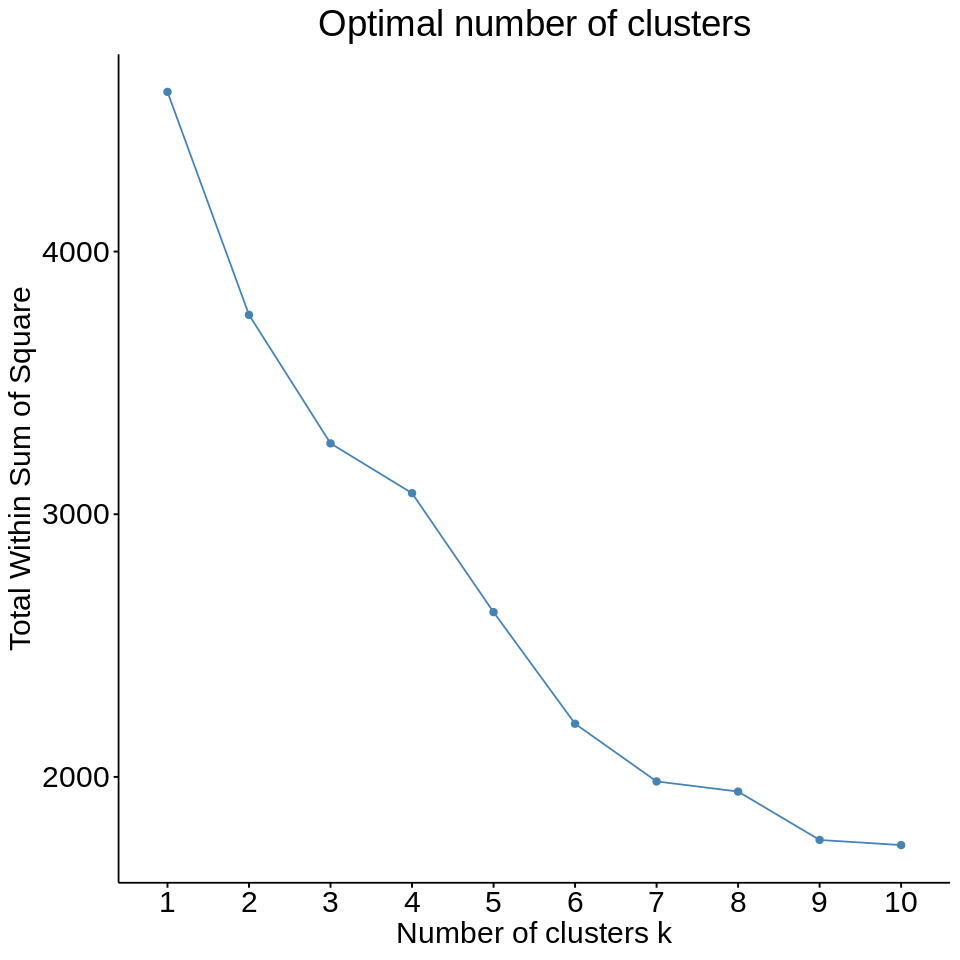

In [ ]:
# Determining Optimal clusters (k) Using Elbow method

options(repr.plot.width = 8, repr.plot.height = 8)
elbow_plot = fviz_nbclust(x = dfNorm, FUNcluster = kmeans, method = 'wss' )
elbow_plot + theme(axis.text = element_text(size=18),
              axis.title = element_text(size = 18),
              plot.title = element_text(hjust = 0.5, size = 22))

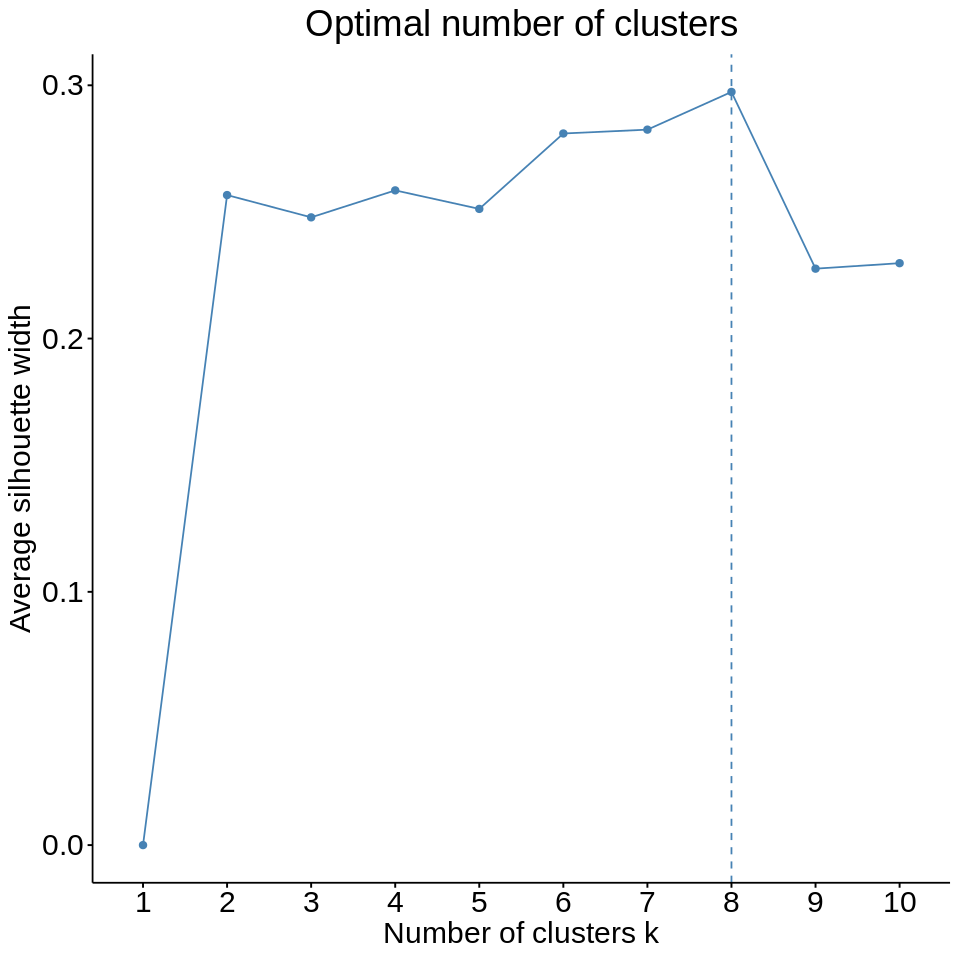

In [ ]:
# Determining Optimal clusters (k) Using Average Silhouette Method

options(repr.plot.width = 8, repr.plot.height = 8)
sil = fviz_nbclust(x = dfNorm, FUNcluster = kmeans, method = 'silhouette' )
sil + theme(axis.text = element_text(size=18),
              axis.title = element_text(size = 18),
              plot.title = element_text(hjust = 0.5, size = 22))

# According to the sillhouette method, the optimal number of k is 8

In [ ]:
# Doing k means with 8 clusters 

k8 = kmeans(dfNorm, 8)

# Checking the number of points in each cluster

k8$size

[1]  437  668 2101 1675 1725 4563   58  984

In [ ]:
# Getting the value of cluster center datapoint value(8 centers for k=8) 
# 

k8$centers

Administrative_Duration Informational_Duration ProductRelated BounceRates
1 0.0253279951            0.005893945            0.024304981    0.013995776
2 0.0005827157            0.000374490            0.003115047    0.958602102
3 0.0247237356            0.012916611            0.046294740    0.046948122
4 0.0191887002            0.011924618            0.047069334    0.095768023
5 0.0253851862            0.019443389            0.050984891    0.059612133
6 0.0279378138            0.017474540            0.055007360    0.049940657
7 0.0235793622            0.002337497            0.022303742    0.094546698
8 0.0291708704            0.008361148            0.026669261    0.007652989
  PageValues  SpecialDay  Month     OperatingSystems Browser   Region   
1 0.025117913 0.000000000 0.1217900 0.1529912        0.1147979 0.2557208
2 0.000000000 0.084431138 0.5542249 0.1668092        0.1061627 0.2805015
3 0.016055907 0.038933841 0.6135174 0.1569321        0.1161352 0.7747501
4 0.009895995 0.334328358 0.6806633 0.1779957        0.1125373 0.1571642
5 0.014899695 0.009043478 0.1288245 0.1530435        0.1080676 0.1773913
6 0.016688894 0.006092483 0.7019505 0.1542845        0.1059975 0.1245617
7 0.076367386 0.000000000 0.1896552 0.8817734        0.9942529 0.9956897
8 0.033694305 0.014634146 0.7346432 0.1380662        0.1018801 0.1666667
  TrafficType VisitorType
1 0.1348910   0.0000000  
2 0.2042231   0.4872754  
3 0.1448684   0.4490719  
4 0.4297565   0.4931343  
5 0.1142029   0.5026087  
6 0.0792761   0.5007670  
7 0.9727768   0.9051724  
8 0.1431857   0.0000000

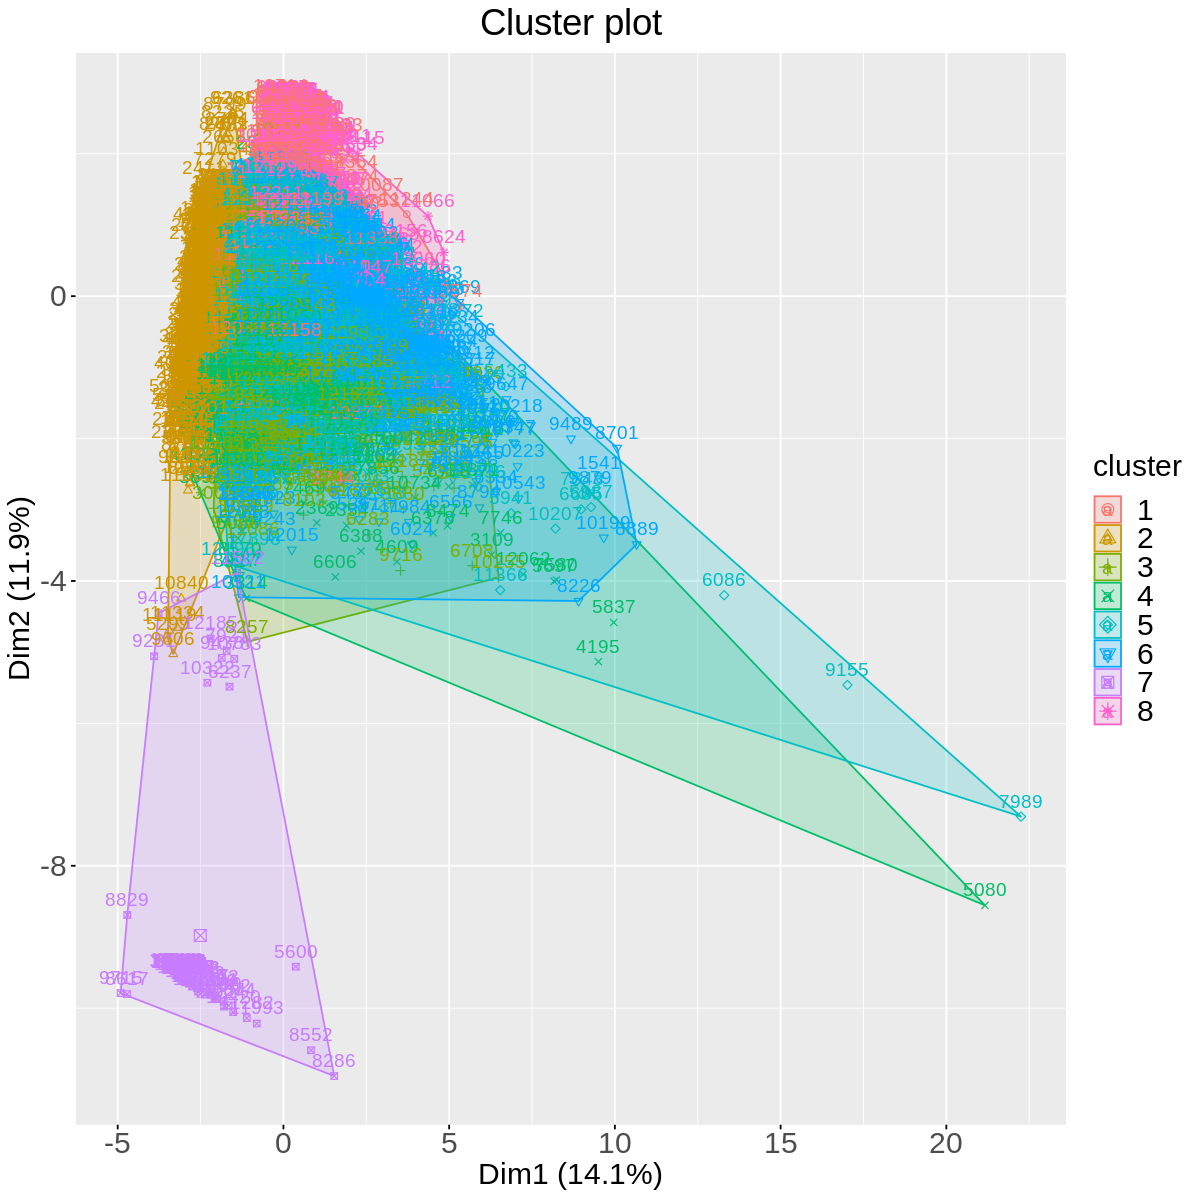

In [ ]:
# Plotting the clusters

options(repr.plot.width = 10, repr.plot.height = 10)
cluster_plot = fviz_cluster(k8, data = dfNorm)
cluster_plot + theme(axis.text = element_text(size=18),
              axis.title = element_text(size = 18),
              plot.title = element_text(hjust = 0.5, size = 22),
              legend.title = element_text(size=18),
              legend.text = element_text(size=18))

# 8. Challenge the solution

## Hierarchical clustering

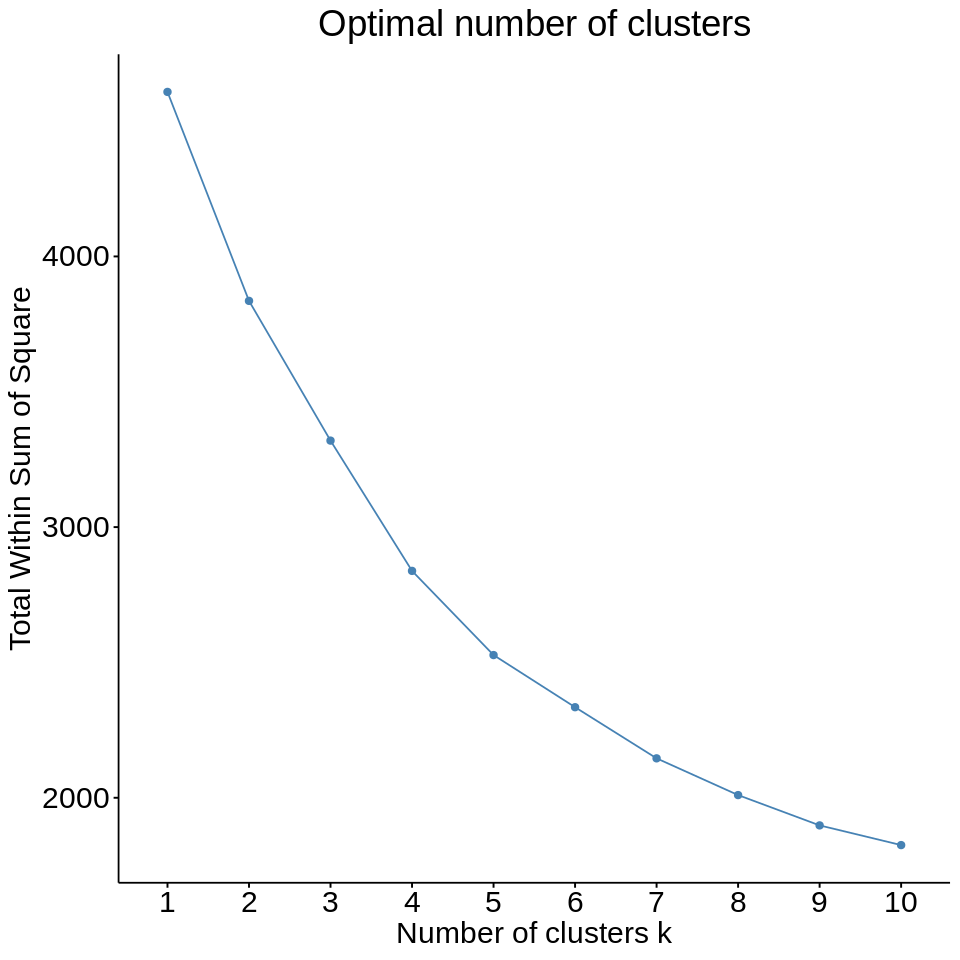

In [ ]:
# Determining Optimal clusters (k) Using Elbow method

options(repr.plot.width = 8, repr.plot.height = 8)
elbow_plot = fviz_nbclust(x = dfNorm, FUNcluster = hcut, method = 'wss' )
elbow_plot + theme(axis.text = element_text(size=18),
              axis.title = element_text(size = 18),
              plot.title = element_text(hjust = 0.5, size = 22))

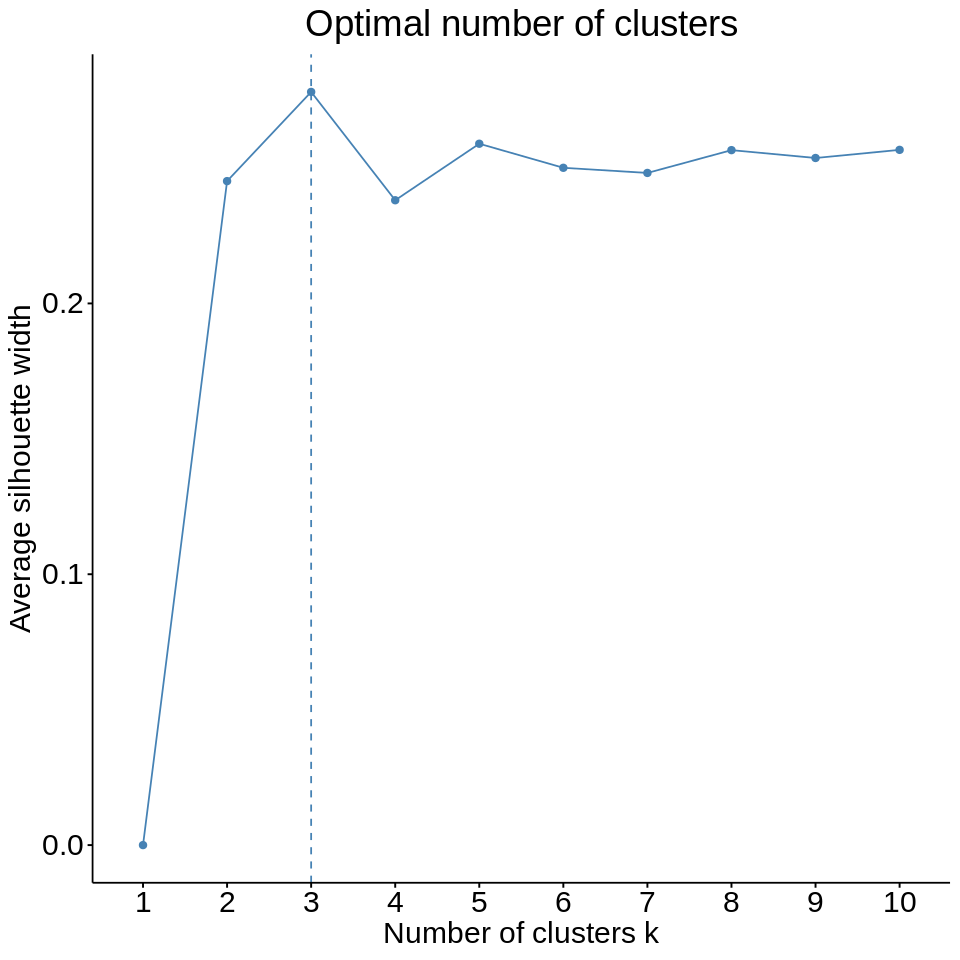

In [ ]:
# Determining Optimal clusters (k) Using Average Silhouette Method

options(repr.plot.width = 8, repr.plot.height = 8)
sil = fviz_nbclust(x = dfNorm, FUNcluster = hcut, method = 'silhouette' )
sil + theme(axis.text = element_text(size=18),
              axis.title = element_text(size = 18),
              plot.title = element_text(hjust = 0.5, size = 22))

# The Optimal number of clusters is 3

In [ ]:
# Doing heirarchical clustering using Ward's method and using euclidean distance

d <- dist(dfNorm, method = "euclidean")

res.hc <- hclust(d, method = "ward.D2" )

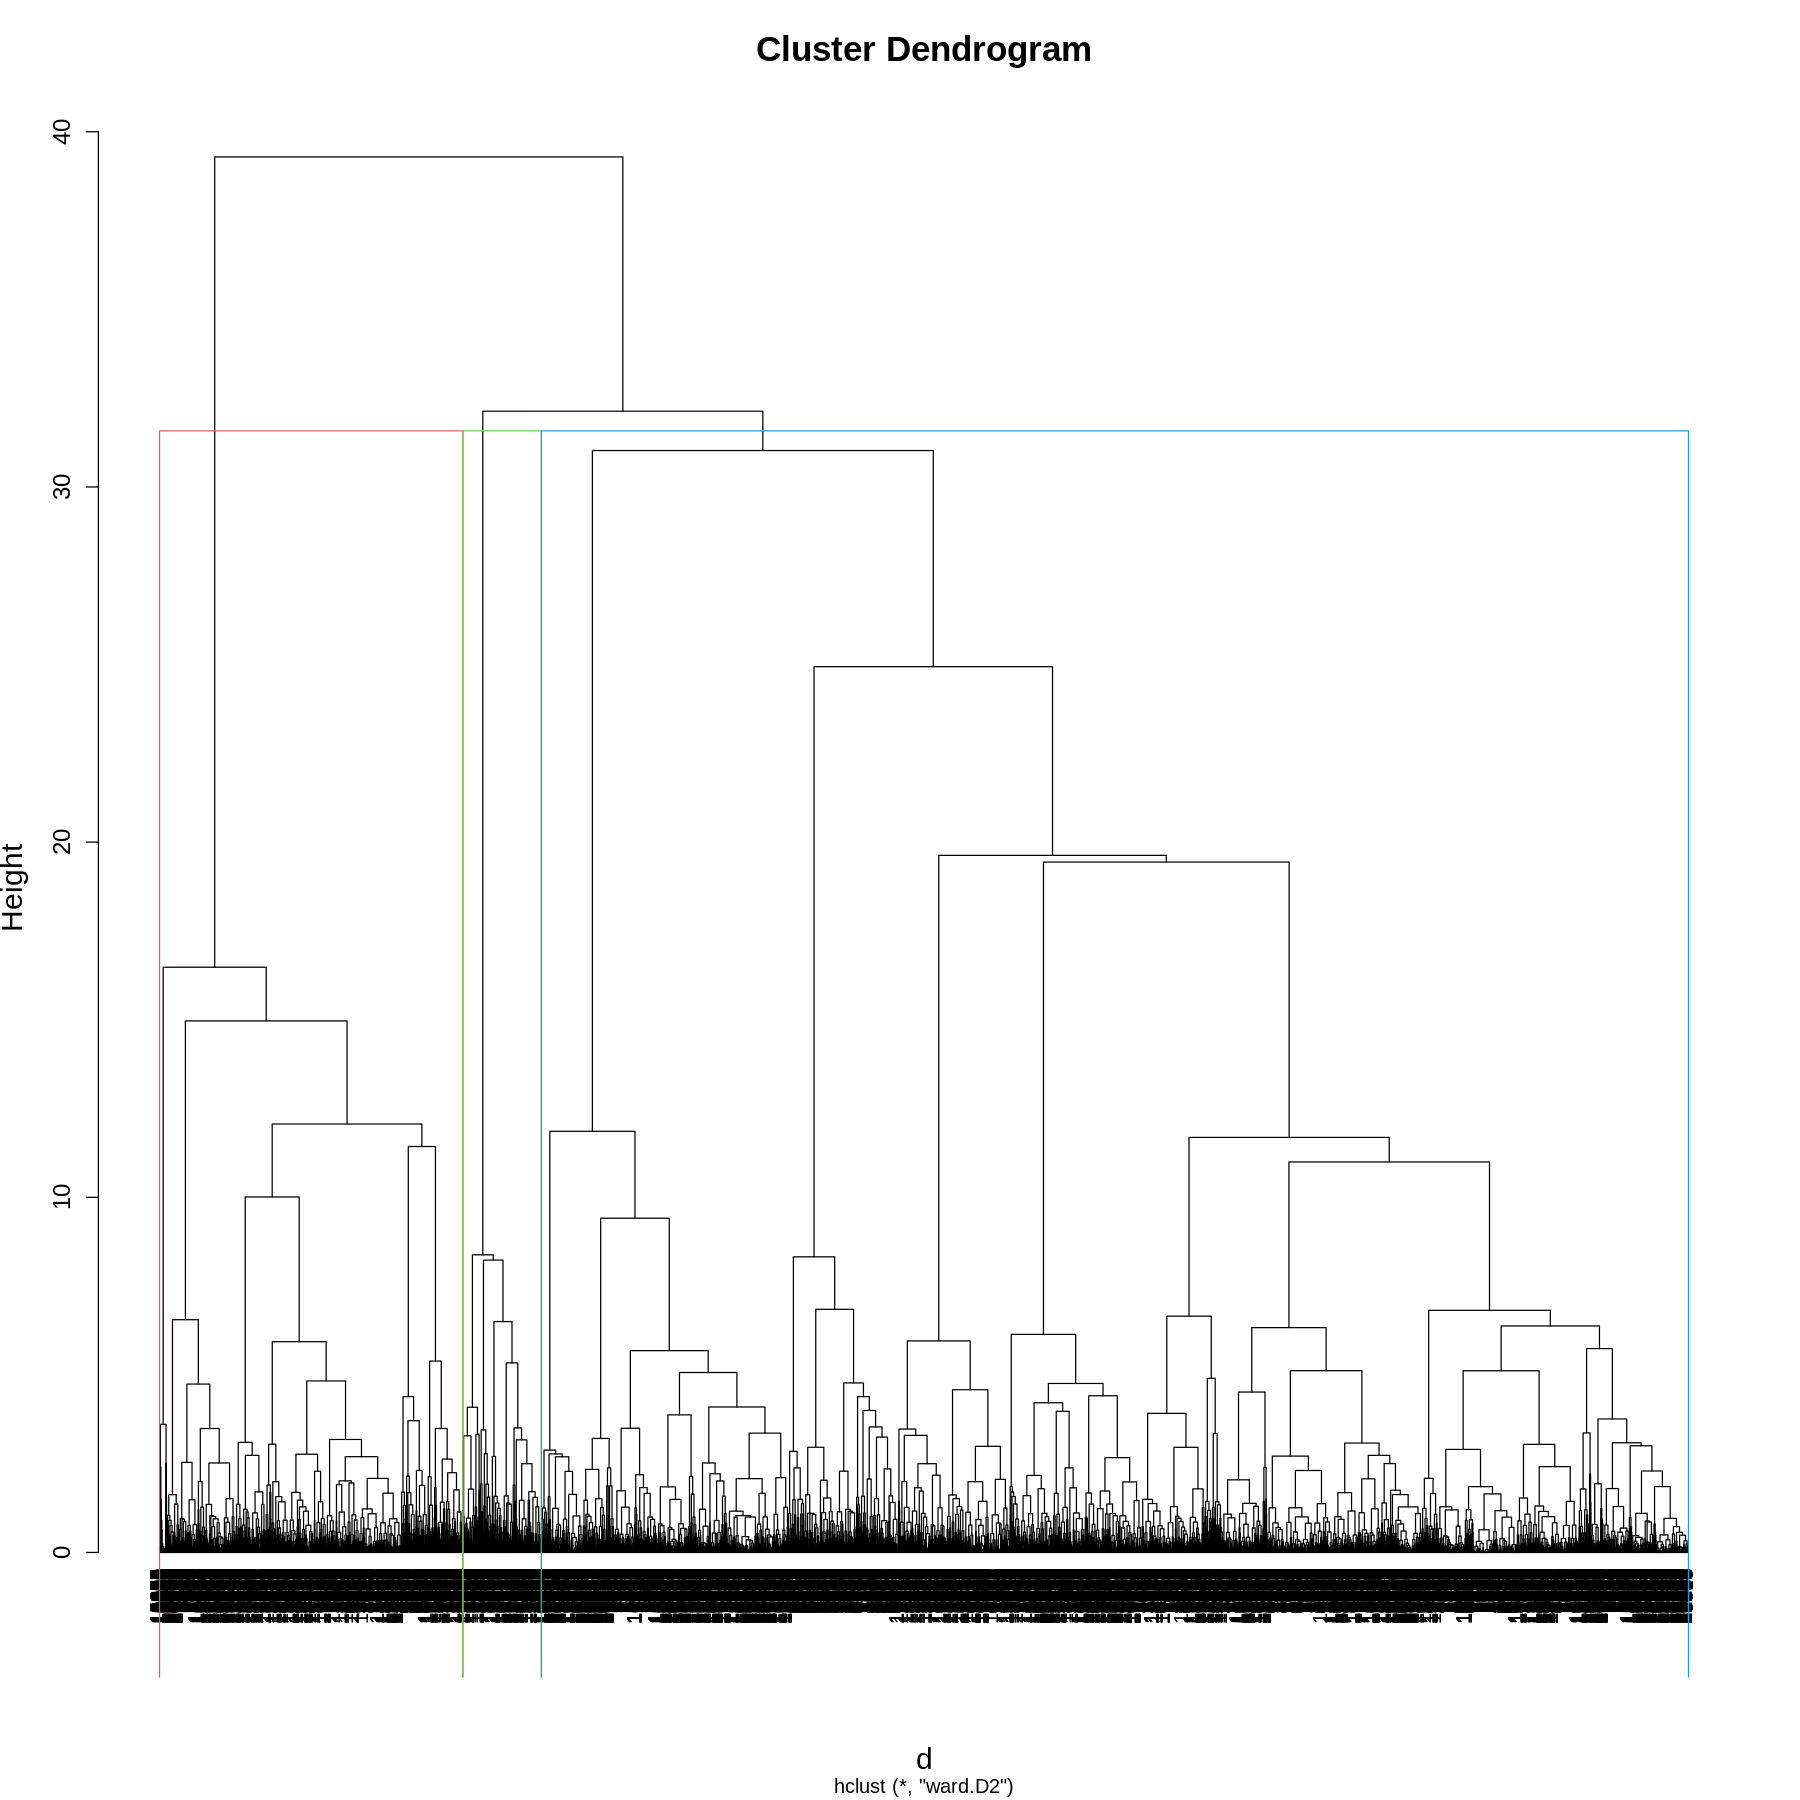

In [ ]:
# Plotting the obtained dendogram

options(repr.plot.width = 15, repr.plot.height = 15)
plot(res.hc, cex = 1, hang= -1, cex.main= 1.75, cex.lab=1.5, cex.axis=1.2)
# Creating a border around the clusters
rect.hclust(res.hc, k = 3, border = 2:5)

In [ ]:
# Doing heirarchical clustering using complete method and using euclidean distance

d <- dist(dfNorm, method = "euclidean")

res.hc1 <- hclust(d, method = "complete" )

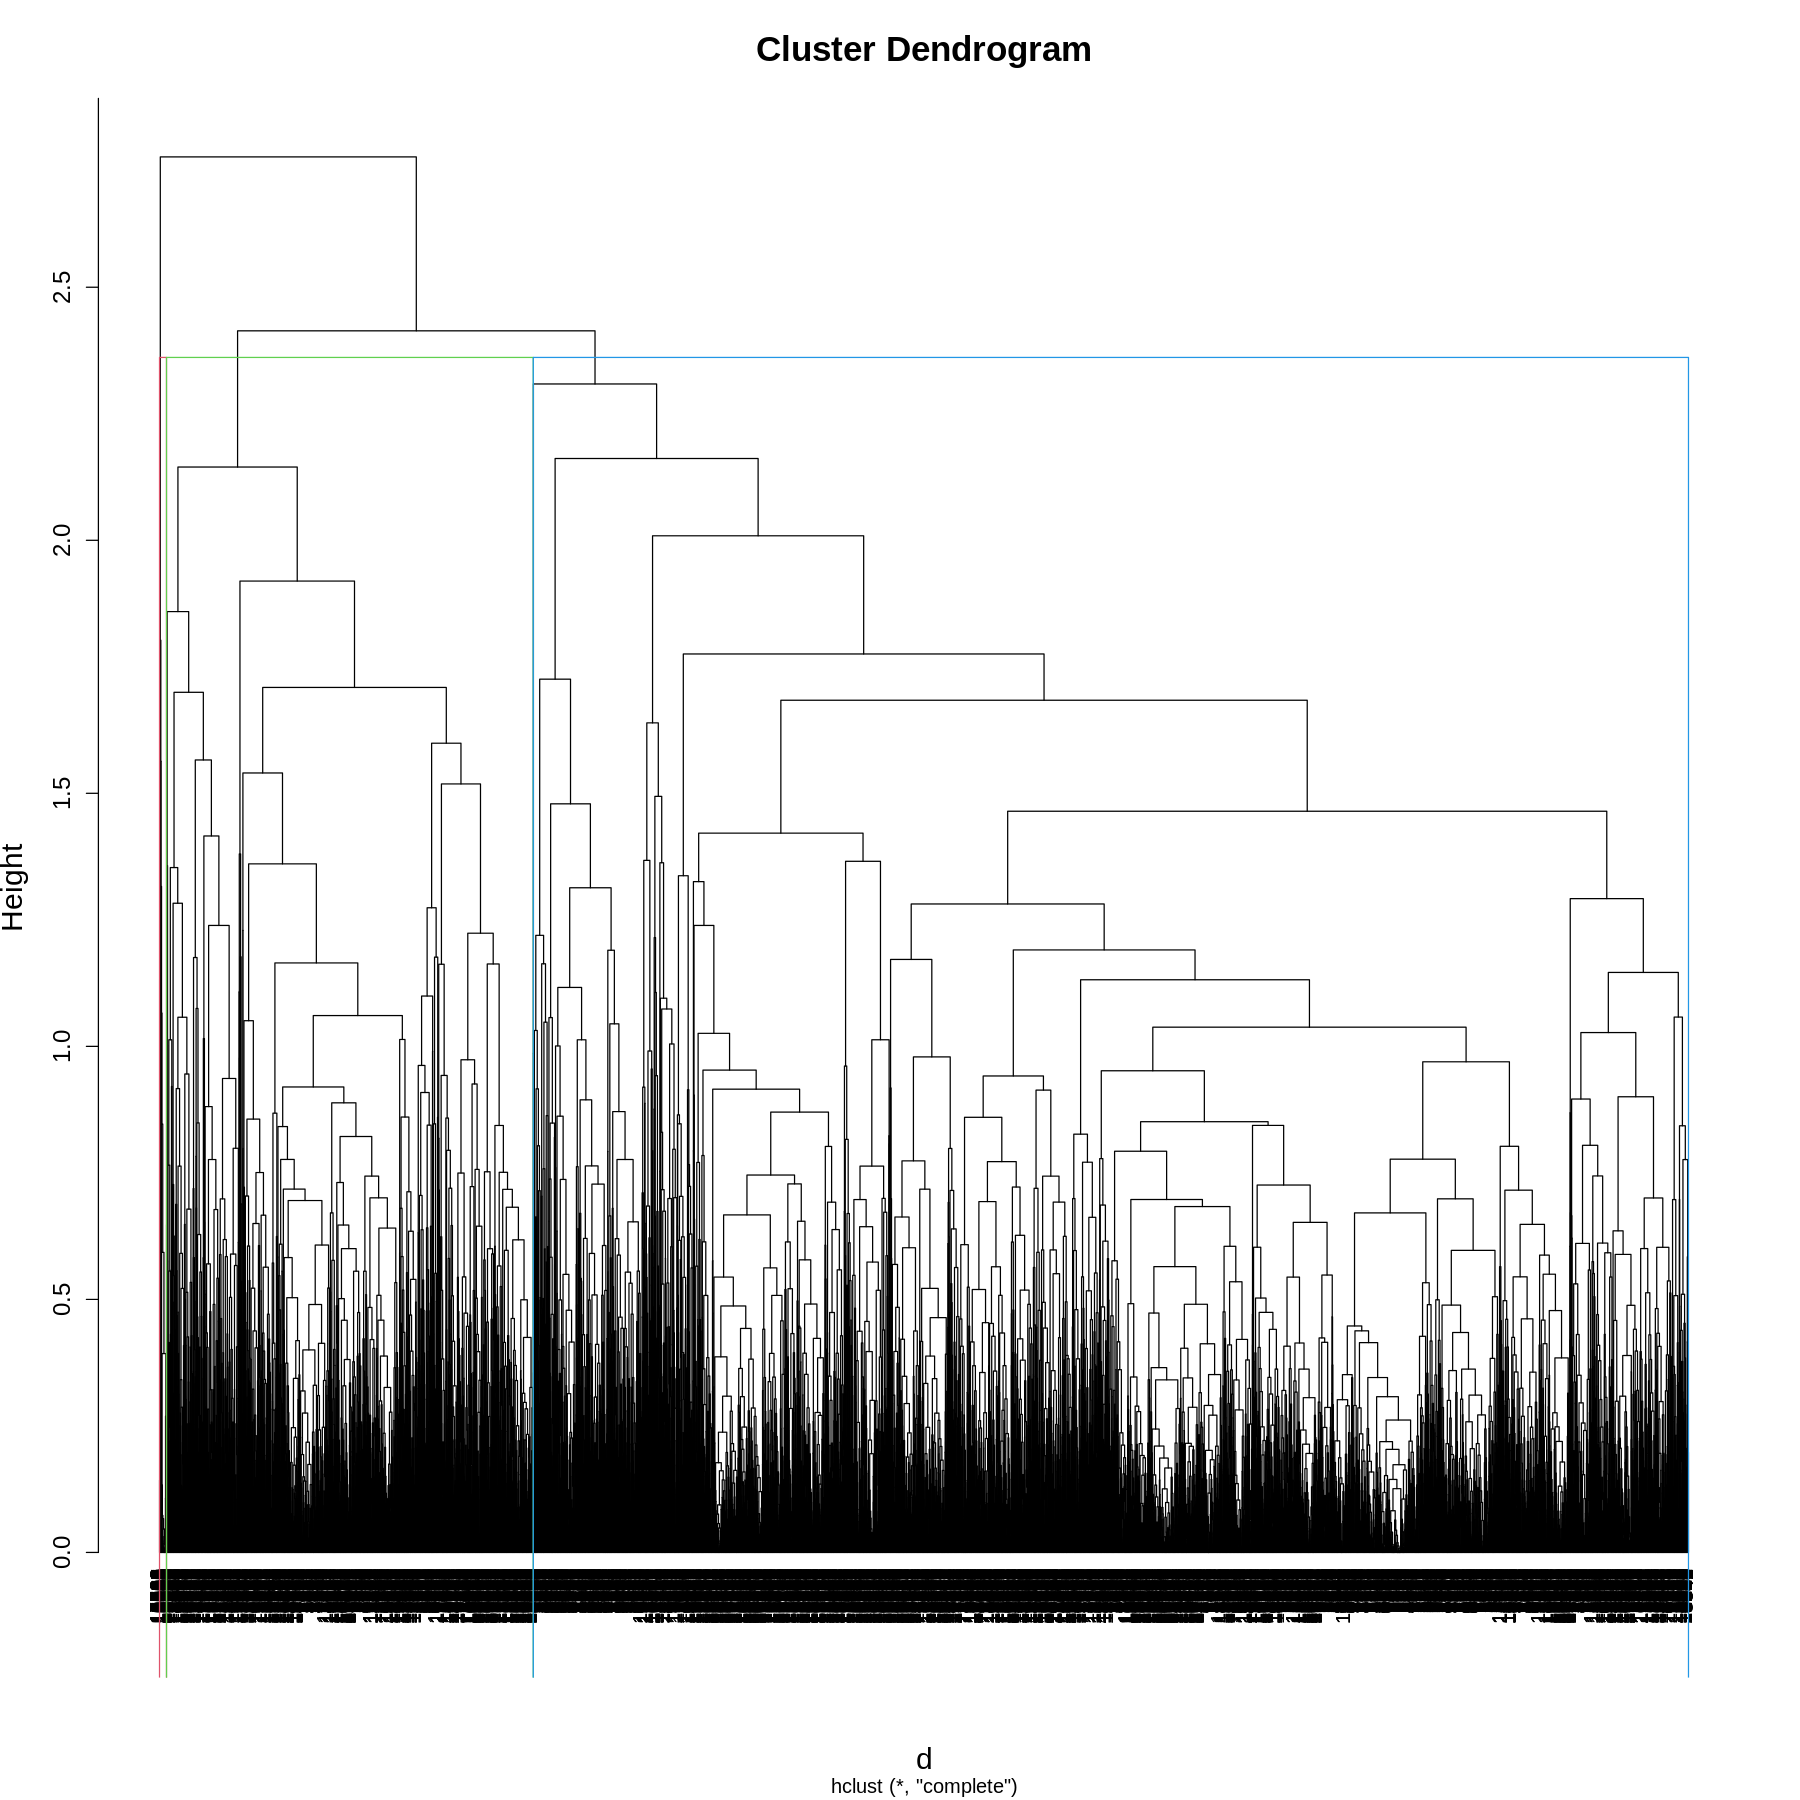

In [ ]:
# Plotting the obtained dendogram

options(repr.plot.width = 15, repr.plot.height = 15)
plot(res.hc1, cex = 1, hang= -1, cex.main= 1.75, cex.lab=1.5, cex.axis=1.2)
# Creating a border around the clusters
rect.hclust(res.hc1, k = 3, border = 2:5)

In [ ]:
# Doing heirarchical clustering using average method and using euclidean distance

d <- dist(dfNorm, method = "euclidean")

res.hc2 <- hclust(d, method = "average" )

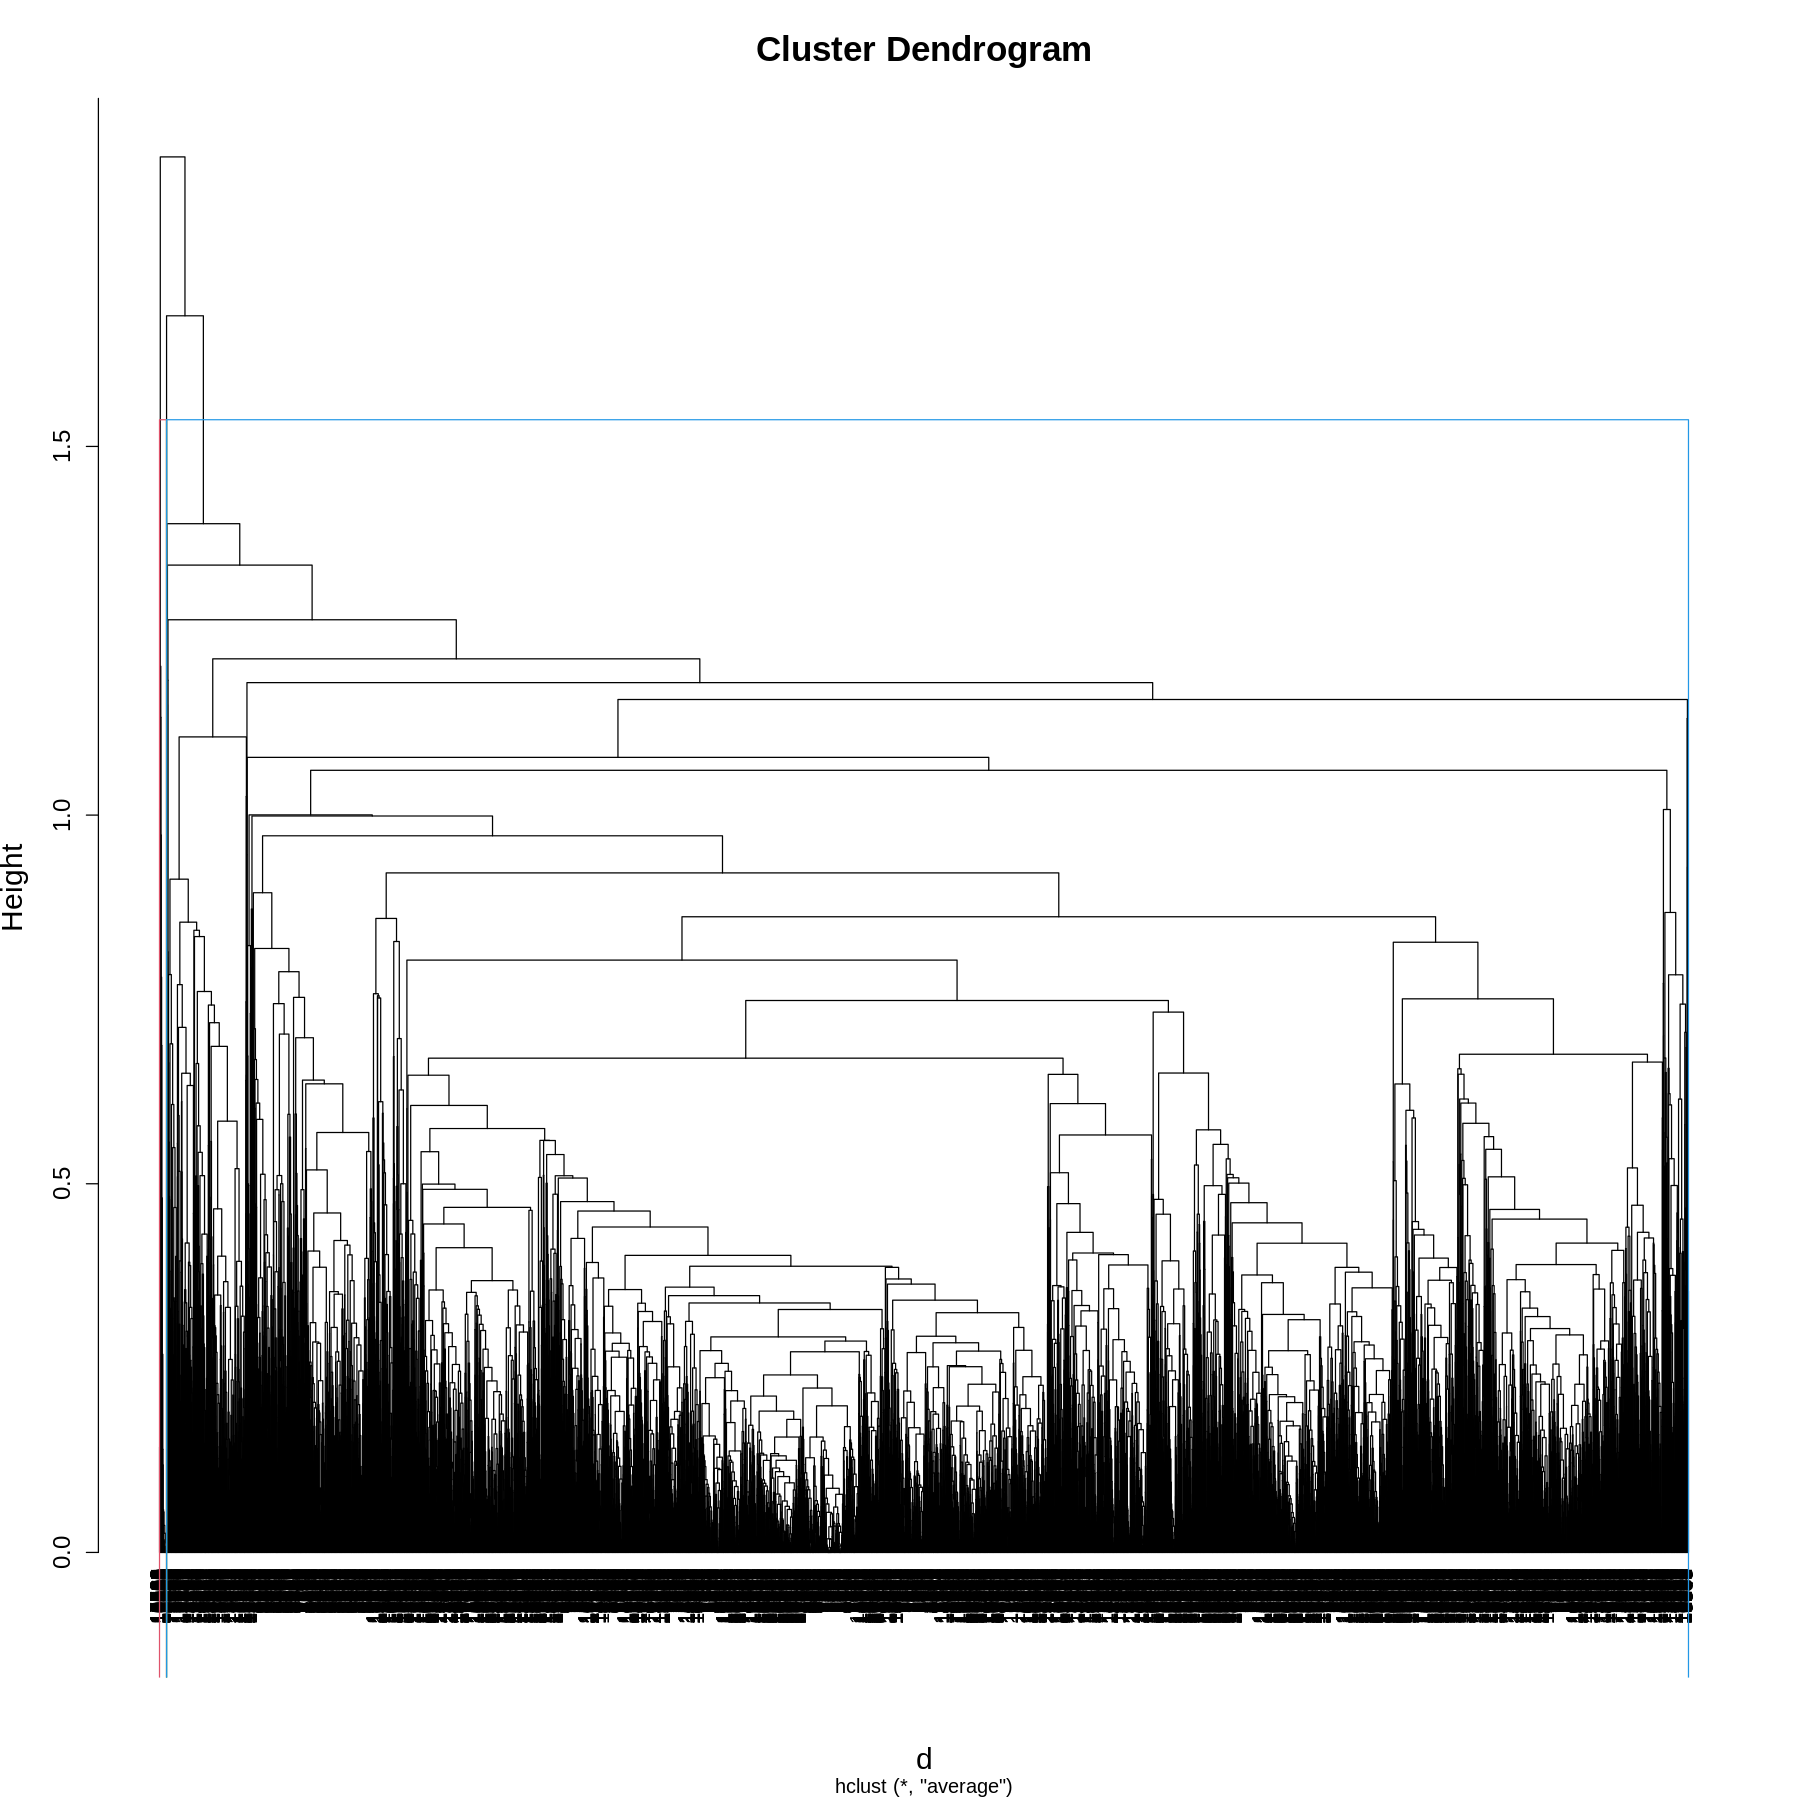

In [ ]:
# Plotting the obtained dendogram

options(repr.plot.width = 15, repr.plot.height = 15)
plot(res.hc2, cex = 1, hang= -1, cex.main= 1.75, cex.lab=1.5, cex.axis=1.2)
# Creating a border around the clusters
rect.hclust(res.hc2, k = 3, border = 2:5)

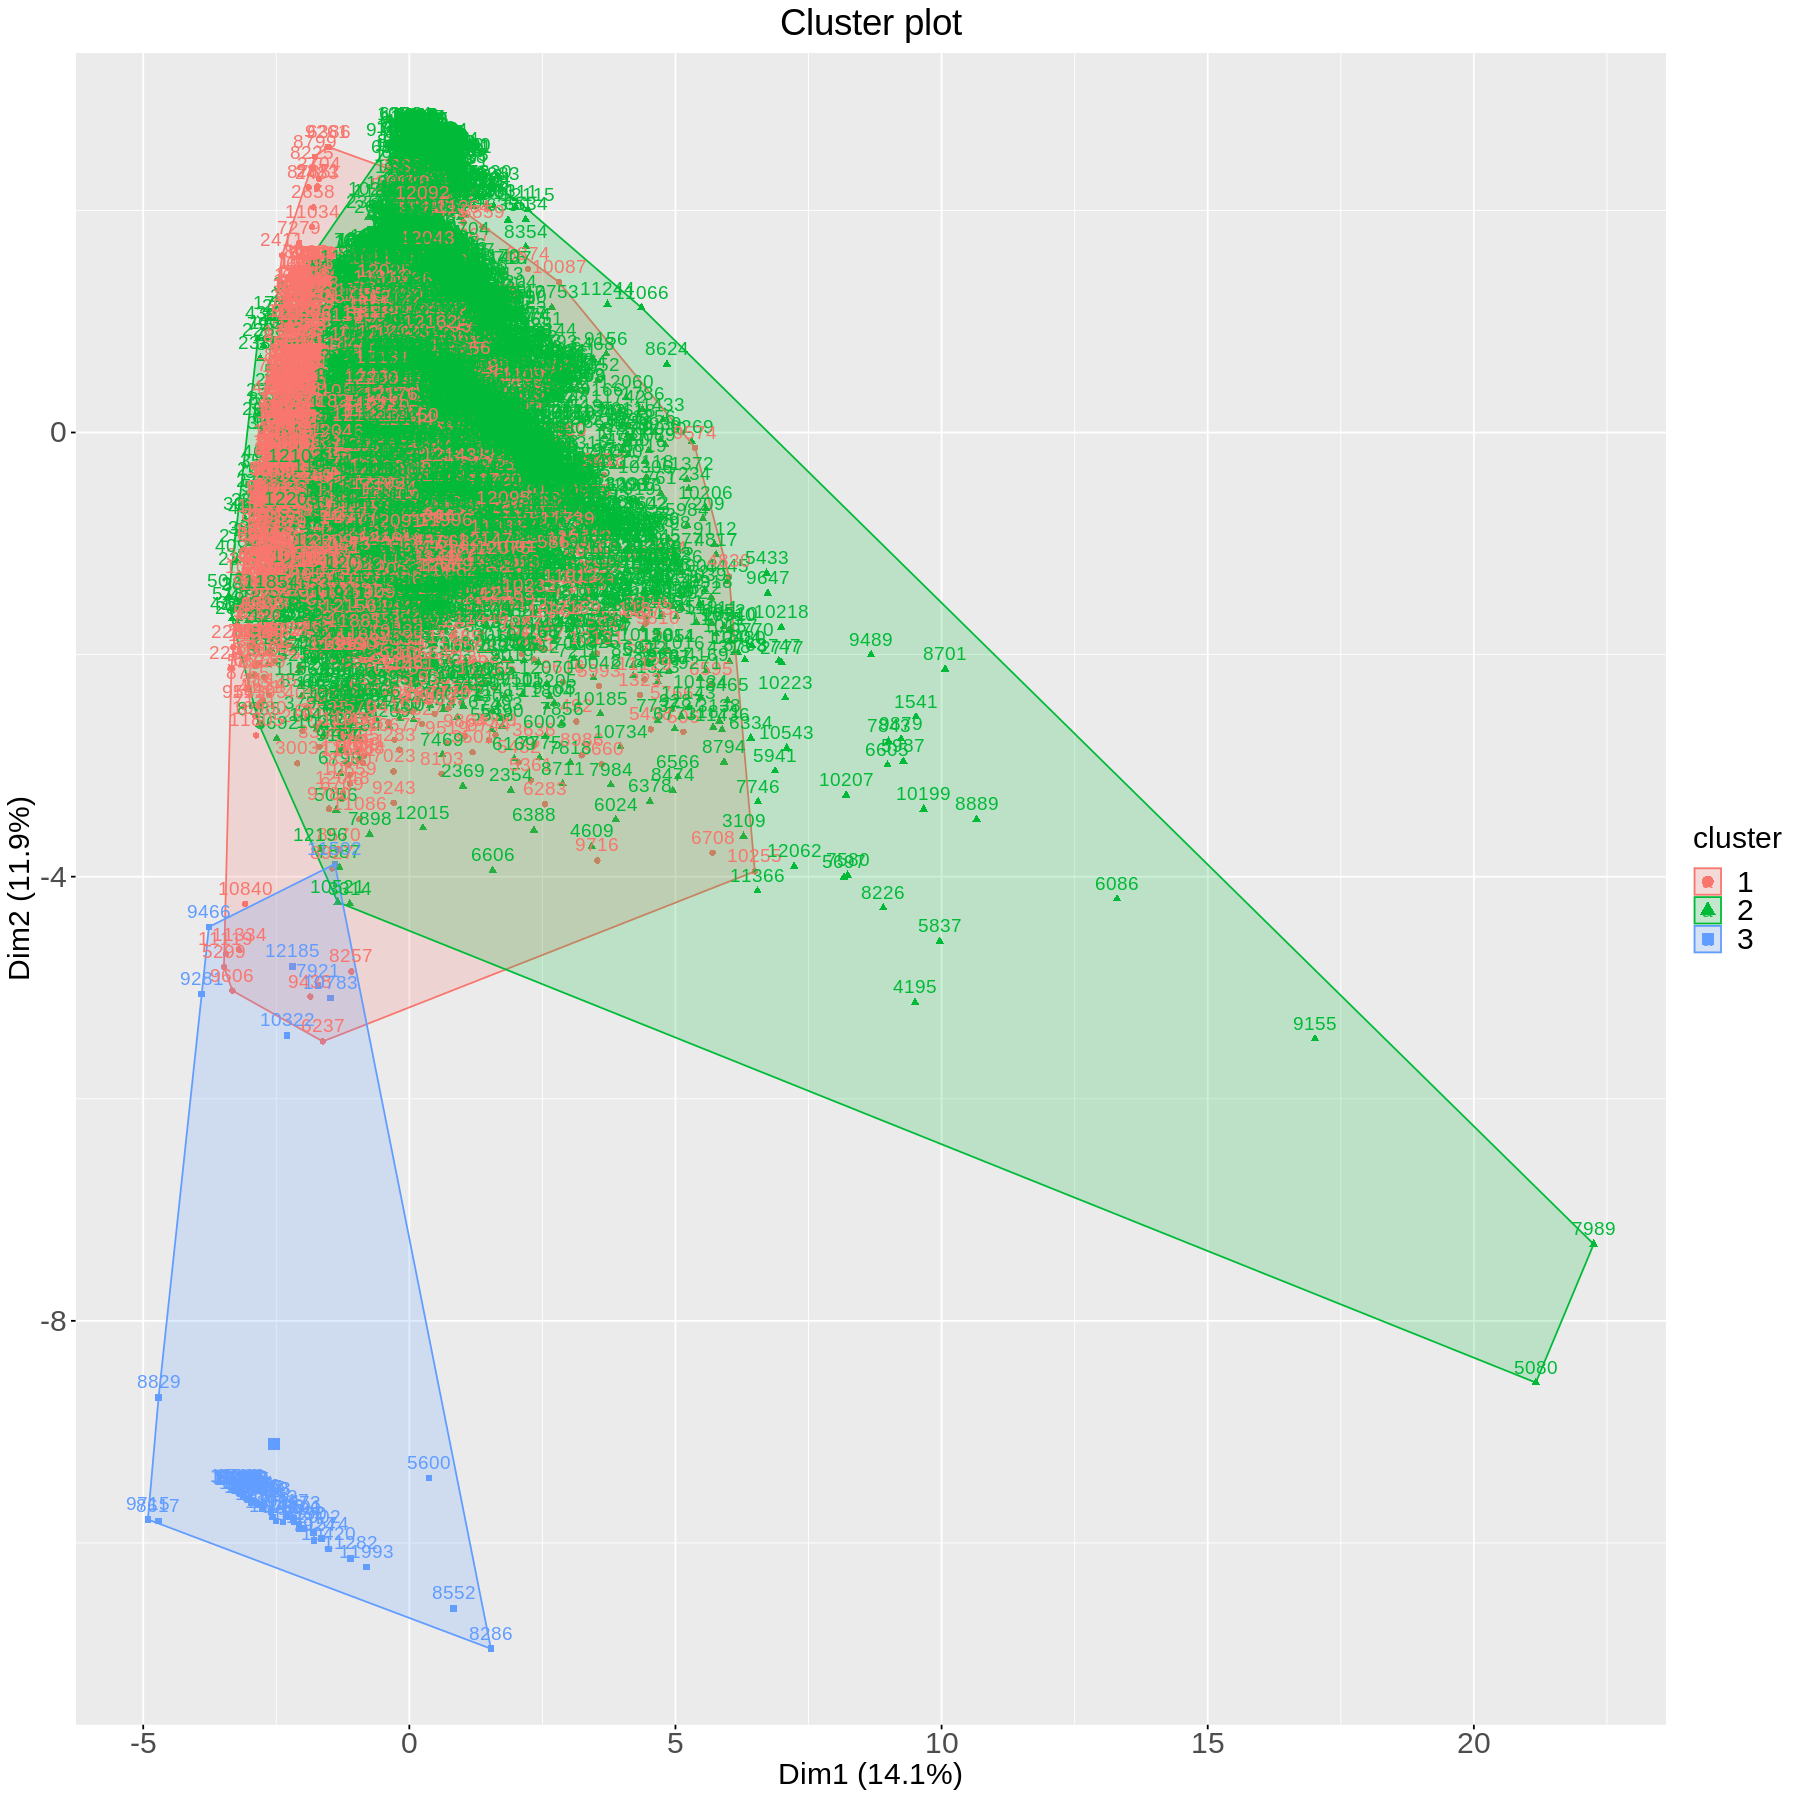

In [ ]:
# Cut tree into 3 groups using the complete method

sub_grp <- cutree(res.hc1, k = 3)

# Plotting the clusters

cluster_plot = fviz_cluster(list(data = dfNorm, cluster = sub_grp))
cluster_plot + theme(axis.text = element_text(size=18),
              axis.title = element_text(size = 18),
              plot.title = element_text(hjust = 0.5, size = 22),
              legend.title = element_text(size=18),
              legend.text = element_text(size=18))

# 9. Conclusions

The conclusions that can be made from the analysis are as follows:

- The company makes the most revenue when it is not a special day.
- The most revenue is made in November and the least revenue is made in February.
- The company makes most money from region 1 than all the other 8 regions.
- More revenue is made from returning visitors than new visitors.
- More revenue is made on weekdays than on weekends.
- New visitors are recorded to be the most in November and returning visitors are seen to be the most in May.
- The site was visited most on weekdays.
- The site was visited most when there was no special day nearing.
- Most site visits were made in the month of May.
- Most site visits were made by customers in region 1.
- The highest traffic type was type 2.
- More than 10000 of the visitors to the site were returning visitors. There were less than 2000 new visitors.
- More than 10000 site visits did not reflect an increase in revenue.
- According to kmeans clustering method, the customers can be segmented into 8 different groups.
- According to hierarchical clustering method, the customers can be segmented into 3 different groups.

# 10. Recommendations

In light of the above conclusions, the following recommendations can be made:

- The company should research on why site visits are not being made when special days are nearing. 
One way for the company to increase site visits around special days is to offer sales for their products during that time, or attractive packages that suit the theme of the special day. This should be backed up by advertisement for example on Instagram.
- The company should find creative ways to not only retain customers but also to attract new ones.
- The company should do a survey to see what their customers would like to purchase. What their tastes may be. This is so that majority of the site visits reflect an increase in revenues.
- They company should find out what they are doing right in region 1 and try and employ similar tactics in the other regions

# 11. Follow-up questions

- What are the different characteristics exhibited by the different groups?